In [1]:
import pandas as pd, numpy as np
from Testing import*

In [2]:
col_dict = {'open_price_col': 'open', 'high_price_col': 'high', 'low_price_col': 'low', 'close_price_col': 'close', 'volume_col': 'volume', 
            'time_col':'datetime', 'expiry_col':'expiry_date', 'expiry_type_col':'expiry_type', 
            'oi_col':'open_interest','date_col':'date','div_yield_col':'Div Yield %',
            'rfr_col':'MIBOR', 'returns_col':'log_returns'}

In [3]:
final_data = pd.read_csv('Preprocessed_Inputs/Nifty_Futures_01Jan2020_29Jan25.csv', parse_dates = [col_dict['date_col'], 
                                                                                             col_dict['time_col'], 
                                                                                            #  col_dict['expiry_col']
                                                                                             ])
final_data_1d = pd.read_csv('Preprocessed_Inputs/Nifty_Futures_01Jan2020_29Jan25_1D.csv',parse_dates = [col_dict['date_col'], 
                                                                                             col_dict['time_col'], 
                                                                                            #  col_dict['expiry_col']
                                                                                             ])

In [4]:
final_data['days_to_expiry'] = (pd.to_datetime(final_data['expiry_date_near']) - pd.to_datetime(final_data[col_dict['date_col']])).dt.days

final_data_1d['days_to_expiry'] = (pd.to_datetime(final_data_1d['expiry_date_near']) - pd.to_datetime(final_data_1d[col_dict['date_col']])).dt.days

In [165]:
print([col for col in final_data.columns])

['datetime', 'stock_code', 'exchange_code', 'product_type', 'expiry_date_near', 'right', 'strike_price', 'open_near', 'high_near', 'low_near', 'close_near', 'volume_near', 'open_interest_near', 'count', 'date', 'expiry_type', 'MIBOR', 'prev_MIBOR', 'IndexName', 'P/E', 'P/B', 'Div Yield %', 'open_mid', 'close_mid', 'high_mid', 'low_mid', 'volume_mid', 'open_interest_mid', 'expiry_date_mid', 'open_far', 'close_far', 'high_far', 'low_far', 'volume_far', 'open_interest_far', 'expiry_date_far', 'close', 'exchange_code_equity', 'high', 'low', 'open', 'stock_code_equity', 'volume', 'date_equity', 'returns_near_mid_far', 'log_returns_near_mid_far', 'overnight_returns_near_mid_far', 'overnight_log_returns_near_mid_far', 'intraday_returns_near_mid_far', 'intraday_log_returns_near_mid_far', 'returns_mid_far', 'log_returns_mid_far', 'overnight_returns_mid_far', 'overnight_log_returns_mid_far', 'intraday_returns_mid_far', 'intraday_log_returns_mid_far', 'returns_far', 'log_returns_far', 'overnight_

In [142]:
from copulae import GaussianCopula

copula = CopulaModel(copula=GaussianCopula())
copula_daily = CopulaModel(copula=GaussianCopula())

In [143]:

# copula = DummyCopulaModel()
# CopulaBacktester()

copula_backtester = CopulaBacktester(initial_capital=10000000,
                                     margin_rules={'NIFTY_FUT': {'initial': 0.12, 'maintenance': 0.06},
                                                   'NIFTY_EQUITY': {'initial': 0.2, 'maintenance': 0.15}},
                                     copula_model = copula,
                                     copula_model_daily= copula_daily,
                                     ohlcv_data={'min':final_data.set_index(col_dict['time_col']), 'day':final_data_1d.set_index(col_dict['time_col'])},
                                    #  ohlcv_daily_data=final_data_1d,
                                     instrument1= "near",
                                     instrument2= 'mid',
                                     returns_min = "log_returns",
                                     returns_daily= 'overnight_log_returns',
                                     backtest_start_date="2021-01-04",
                                     backtest_end_date="2021-12-31",
                                     additional_state_vars=['flag_1','flag_2','flag_1_basis','flag_2_basis',],
                                     refitting_frequency=5,
                                     MPI_threshold=1.0,
                                     )

# copula_backtester.run_backtest()
import cProfile

# Profile the run_backtest method
cProfile.run('copula_backtester.run_backtest()', 'profile_output')

Starting backtest loop...


  0%|          | 0/91864 [00:00<?, ?it/s]

PnL for step: 0 (Time: 0.00s)
Optimization terminated successfully    (Exit mode 0)
            Current function value: -70171.28303367204
            Iterations: 7
            Function evaluations: 16
            Gradient evaluations: 7
                                  Fit Summary                                   
Log. Likelihood      : 70171.28303367204
Method               : Maximum likelihood
Data Points          : 94627

Optimization Setup
--------------------------------------------------------------------------------
	bounds         : [(np.float64(-1.000001), np.float64(1.000001))]
	options        : {'maxiter': 20000, 'ftol': 1e-06, 'iprint': 1, 'disp': True, 'eps': 1.5e-08}
	method         : SLSQP

Results
--------------------------------------------------------------------------------
	x              : [0.87921399]
	fun            : -70171.28303367204
	jac            : [0.00388051]
	nit            : 7
	nfev           : 16
	njev           : 7
	status         : 0
	message     

C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_13064\996274430.py:32: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  numerator,error = quad(pdf_fixed_y, -np.inf, x_val,# full_output=1,
C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_13064\996274430.py:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain f

PnL for step: 0 (Time: 0.00s)


  0%|          | 2/91864 [00:11<148:17:13,  5.81s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 3/91864 [00:14<114:47:26,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 4/91864 [00:19<122:31:06,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 5/91864 [00:23<115:41:36,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 6/91864 [00:28<112:22:49,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 7/91864 [00:33<121:26:14,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 8/91864 [00:38<125:51:16,  4.93s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 9/91864 [00:44<128:51:19,  5.05s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 10/91864 [00:48<121:46:02,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 11/91864 [00:52<116:29:57,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 12/91864 [00:57<122:00:12,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 13/91864 [01:01<116:03:42,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 14/91864 [01:04<101:43:51,  3.99s/it]

PnL for step: 0 (Time: 0.00s)


C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_13064\996274430.py:45: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  numerator,error = quad(pdf_fixed_x, -np.inf, y_val, #full_output=1,
  0%|          | 15/91864 [01:08<104:42:16,  4.10s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 16/91864 [01:14<113:40:06,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 17/91864 [01:19<120:31:53,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 18/91864 [01:24<126:27:21,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 19/91864 [01:28<118:43:39,  4.65s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 20/91864 [01:34<123:58:23,  4.86s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 21/91864 [01:38<118:14:24,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 22/91864 [01:44<129:00:30,  5.06s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 23/91864 [01:51<146:50:45,  5.76s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 24/91864 [01:57<144:44:44,  5.67s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 25/91864 [02:04<153:34:18,  6.02s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 26/91864 [02:07<130:05:52,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 27/91864 [02:12<130:34:21,  5.12s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 28/91864 [02:17<132:30:29,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 29/91864 [02:22<133:37:24,  5.24s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 30/91864 [02:28<135:10:00,  5.30s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 31/91864 [02:33<137:30:23,  5.39s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 32/91864 [02:37<126:45:19,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 33/91864 [02:43<128:41:29,  5.05s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 34/91864 [02:45<111:07:52,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 35/91864 [02:48<99:02:48,  3.88s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 36/91864 [02:55<118:04:27,  4.63s/it]

{'near': {'action': 'long', 'qty': 2946}, 'mid': {'action': 'short', 'qty': 2946}}
PnL for step: 4712.421599998688 (Time: 0.00s)


  0%|          | 37/91864 [02:59<117:13:21,  4.60s/it]

PnL for step: -9867.921600004047 (Time: 0.00s)


C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_13064\996274430.py:32: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  numerator,error = quad(pdf_fixed_y, -np.inf, x_val,# full_output=1,
  0%|          | 38/91864 [03:04<117:32:30,  4.61s/it]

PnL for step: 1913.1324000007116 (Time: 0.00s)


  0%|          | 39/91864 [03:09<123:10:41,  4.83s/it]

PnL for step: 3389.0784000066706 (Time: 0.00s)


  0%|          | 40/91864 [03:15<128:36:27,  5.04s/it]

PnL for step: -2356.2108000020235 (Time: 0.00s)


  0%|          | 41/91864 [03:20<131:55:37,  5.17s/it]

PnL for step: -3978.8675999992884 (Time: 0.00s)


  0%|          | 42/91864 [03:25<132:25:23,  5.19s/it]

PnL for step: 4565.710799996665 (Time: 0.00s)


  0%|          | 43/91864 [03:30<131:35:07,  5.16s/it]

PnL for step: -3092.7107999966647 (Time: 0.00s)


  0%|          | 44/91864 [03:35<126:42:43,  4.97s/it]

PnL for step: -4712.421600004047 (Time: 0.00s)


  0%|          | 45/91864 [03:38<108:36:29,  4.26s/it]

PnL for step: 6775.2108000020235 (Time: 0.00s)


  0%|          | 46/91864 [03:43<114:53:30,  4.50s/it]

PnL for step: -293.4215999986882 (Time: 0.00s)


  0%|          | 47/91864 [03:48<118:26:31,  4.64s/it]

PnL for step: 736.4999999946413 (Time: 0.00s)


  0%|          | 48/91864 [03:52<120:02:19,  4.71s/it]

PnL for step: -6335.078399995953 (Time: 0.00s)


  0%|          | 49/91864 [03:57<121:19:39,  4.76s/it]

PnL for step: 7954.7891999979765 (Time: 0.00s)


  0%|          | 50/91864 [04:00<105:07:44,  4.12s/it]

PnL for step: -7954.7891999979765 (Time: 0.00s)


  0%|          | 51/91864 [04:05<110:28:47,  4.33s/it]

PnL for step: -2946.0 (Time: 0.00s)


  0%|          | 52/91864 [04:10<114:16:52,  4.48s/it]

PnL for step: -1766.4215999986882 (Time: 0.00s)


  0%|          | 53/91864 [04:14<117:15:07,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 54/91864 [04:19<118:57:43,  4.66s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 55/91864 [04:24<120:31:31,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 56/91864 [04:27<103:59:15,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 57/91864 [04:31<101:50:38,  3.99s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 58/91864 [04:35<104:00:17,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 59/91864 [04:37<91:57:44,  3.61s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 60/91864 [04:42<101:54:26,  4.00s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 61/91864 [04:47<108:36:35,  4.26s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 62/91864 [04:52<112:55:55,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 63/91864 [04:57<116:24:03,  4.56s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 64/91864 [05:02<118:50:09,  4.66s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 65/91864 [05:06<119:59:00,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 66/91864 [05:11<120:57:08,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 67/91864 [05:16<121:38:49,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 68/91864 [05:20<113:48:29,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 69/91864 [05:25<118:42:32,  4.66s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 70/91864 [05:29<111:14:19,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 71/91864 [05:34<115:34:02,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 72/91864 [05:38<117:58:44,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 73/91864 [05:43<119:37:03,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 74/91864 [05:48<120:22:36,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 75/91864 [05:53<121:39:10,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 76/91864 [05:57<113:13:00,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 77/91864 [06:01<116:00:19,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 78/91864 [06:05<109:52:14,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 79/91864 [06:10<113:36:24,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 80/91864 [06:14<108:00:14,  4.24s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 81/91864 [06:17<103:35:07,  4.06s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 82/91864 [06:22<109:29:38,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 83/91864 [06:25<96:21:58,  3.78s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 84/91864 [06:30<104:03:27,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 85/91864 [06:34<109:57:31,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 86/91864 [06:39<113:56:18,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 87/91864 [06:44<116:17:09,  4.56s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 88/91864 [06:49<118:26:49,  4.65s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 89/91864 [06:54<119:55:37,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 90/91864 [06:59<120:31:48,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 91/91864 [07:03<121:30:47,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 92/91864 [07:08<122:31:39,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 93/91864 [07:11<105:10:35,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 94/91864 [07:14<101:41:06,  3.99s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 95/91864 [07:17<90:17:34,  3.54s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 96/91864 [07:22<101:25:06,  3.98s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 97/91864 [07:25<90:41:21,  3.56s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 98/91864 [07:28<91:39:24,  3.60s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 99/91864 [07:32<92:47:45,  3.64s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 100/91864 [07:36<93:14:34,  3.66s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 101/91864 [07:39<93:21:31,  3.66s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 102/91864 [07:44<102:05:05,  4.00s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 103/91864 [07:48<99:17:50,  3.90s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 104/91864 [07:51<97:28:49,  3.82s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 105/91864 [07:56<104:33:53,  4.10s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 106/91864 [08:01<110:33:16,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_13064\996274430.py:45: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  numerator,error = quad(pdf_fixed_x, -np.inf, y_val, #full_output=1,
  0%|          | 107/91864 [08:06<114:09:26,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 108/91864 [08:08<99:12:45,  3.89s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 109/91864 [08:12<97:44:49,  3.84s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 110/91864 [08:15<87:53:05,  3.45s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 111/91864 [08:17<80:58:23,  3.18s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 112/91864 [08:20<76:43:28,  3.01s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 113/91864 [08:22<73:36:13,  2.89s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 114/91864 [08:27<88:18:34,  3.47s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 115/91864 [08:32<98:21:16,  3.86s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 116/91864 [08:35<88:08:08,  3.46s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 117/91864 [08:38<89:34:33,  3.51s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 118/91864 [08:43<99:36:32,  3.91s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 119/91864 [08:47<97:33:46,  3.83s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 120/91864 [08:52<105:45:18,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 121/91864 [08:54<93:29:51,  3.67s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 122/91864 [08:57<84:33:26,  3.32s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 123/91864 [09:01<95:37:04,  3.75s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 124/91864 [09:04<86:16:00,  3.39s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 125/91864 [09:08<88:17:59,  3.47s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 126/91864 [09:11<89:50:44,  3.53s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 127/91864 [09:16<99:15:31,  3.90s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 128/91864 [09:21<106:59:08,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 129/91864 [09:25<103:20:40,  4.06s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 130/91864 [09:28<100:11:28,  3.93s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 131/91864 [09:32<100:44:51,  3.95s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 132/91864 [09:35<89:48:11,  3.52s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 133/91864 [09:39<91:37:28,  3.60s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 134/91864 [09:44<102:05:56,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 135/91864 [09:47<100:14:21,  3.93s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 136/91864 [09:52<104:18:02,  4.09s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 137/91864 [09:55<101:19:45,  3.98s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 138/91864 [09:58<90:12:39,  3.54s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 139/91864 [10:03<99:41:26,  3.91s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 140/91864 [10:08<107:01:18,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 141/91864 [10:12<111:46:05,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 142/91864 [10:16<106:40:01,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 143/91864 [10:19<94:09:06,  3.70s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 144/91864 [10:22<93:49:02,  3.68s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 145/91864 [10:27<102:57:50,  4.04s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 146/91864 [10:31<99:46:04,  3.92s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 147/91864 [10:35<98:39:26,  3.87s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 148/91864 [10:39<106:10:39,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 149/91864 [10:44<111:09:28,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 150/91864 [10:47<97:34:04,  3.83s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 151/91864 [10:52<104:59:37,  4.12s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 152/91864 [10:57<110:54:42,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 153/91864 [11:01<114:50:20,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 154/91864 [11:06<117:43:16,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 155/91864 [11:10<110:36:45,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 156/91864 [11:13<97:01:49,  3.81s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 157/91864 [11:15<87:10:46,  3.42s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 158/91864 [11:20<97:50:54,  3.84s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 159/91864 [11:22<87:41:33,  3.44s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 160/91864 [11:25<80:57:12,  3.18s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 161/91864 [11:29<85:34:00,  3.36s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 162/91864 [11:32<88:05:27,  3.46s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 163/91864 [11:35<81:02:02,  3.18s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 164/91864 [11:40<93:26:07,  3.67s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 165/91864 [11:45<102:10:05,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 166/91864 [11:47<91:18:29,  3.58s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 167/91864 [11:52<98:03:18,  3.85s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 168/91864 [11:57<105:32:45,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 169/91864 [12:01<111:04:27,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 170/91864 [12:06<114:51:56,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 171/91864 [12:10<108:43:40,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 172/91864 [12:14<106:35:56,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 173/91864 [12:18<102:47:56,  4.04s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 174/91864 [12:23<110:20:39,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 175/91864 [12:26<105:52:03,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 176/91864 [12:30<105:04:52,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 177/91864 [12:34<104:05:51,  4.09s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 178/91864 [12:39<109:33:55,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 179/91864 [12:44<113:46:25,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 180/91864 [12:49<116:53:07,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 181/91864 [12:53<110:36:36,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 182/91864 [12:58<114:34:29,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 183/91864 [13:00<99:34:35,  3.91s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 184/91864 [13:05<106:33:49,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 185/91864 [13:09<102:39:18,  4.03s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 186/91864 [13:14<109:43:53,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 187/91864 [13:17<104:52:58,  4.12s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 188/91864 [13:22<110:28:02,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 189/91864 [13:27<114:50:19,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 190/91864 [13:32<116:55:52,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 191/91864 [13:37<118:33:27,  4.66s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 192/91864 [13:42<120:42:50,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 193/91864 [13:45<112:45:40,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 194/91864 [13:49<107:17:53,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 195/91864 [13:54<112:04:29,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 196/91864 [13:59<115:20:40,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 197/91864 [14:01<100:07:40,  3.93s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 198/91864 [14:06<106:58:40,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 199/91864 [14:09<94:47:03,  3.72s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 200/91864 [14:13<103:00:11,  4.05s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 201/91864 [14:18<103:28:04,  4.06s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 202/91864 [14:21<100:59:52,  3.97s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 203/91864 [14:24<90:09:13,  3.54s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 204/91864 [14:29<100:30:41,  3.95s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 205/91864 [14:34<113:24:51,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 206/91864 [14:40<124:50:44,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 207/91864 [14:45<126:30:22,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 208/91864 [14:49<117:25:30,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 209/91864 [14:54<119:14:30,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 210/91864 [14:59<120:17:49,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 211/91864 [15:04<121:12:54,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 212/91864 [15:09<121:40:26,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 213/91864 [15:13<122:17:27,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 214/91864 [15:18<123:25:54,  4.85s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 215/91864 [15:23<123:21:21,  4.85s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 216/91864 [15:28<123:33:30,  4.85s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 217/91864 [15:33<125:02:26,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 218/91864 [15:36<106:59:19,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 219/91864 [15:40<111:39:15,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 220/91864 [15:45<115:08:32,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 221/91864 [15:50<117:44:20,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 222/91864 [15:54<110:21:11,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 223/91864 [15:59<113:48:59,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 224/91864 [16:03<110:31:59,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 225/91864 [16:07<114:14:34,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 226/91864 [16:11<108:47:22,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 227/91864 [16:15<104:06:35,  4.09s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 228/91864 [16:17<92:02:20,  3.62s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 229/91864 [16:23<103:15:05,  4.06s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 230/91864 [16:27<109:17:41,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 231/91864 [16:32<113:24:08,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 232/91864 [16:37<116:52:59,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 233/91864 [16:42<118:52:40,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 234/91864 [16:46<111:12:19,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 235/91864 [16:49<105:56:50,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 236/91864 [16:54<111:15:31,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 237/91864 [16:59<114:26:00,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 238/91864 [17:04<117:27:54,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 239/91864 [17:09<118:49:07,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 240/91864 [17:12<111:17:26,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 241/91864 [17:16<105:28:02,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 242/91864 [17:21<110:53:35,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 243/91864 [17:26<114:31:36,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 244/91864 [17:31<117:55:40,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 245/91864 [17:35<119:36:40,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 246/91864 [17:40<120:18:13,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 247/91864 [17:45<120:47:49,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 248/91864 [17:49<112:17:33,  4.41s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 249/91864 [17:53<115:22:02,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 250/91864 [17:58<118:47:24,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 251/91864 [18:03<120:26:21,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 252/91864 [18:08<120:57:45,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 253/91864 [18:12<112:52:23,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 254/91864 [18:17<115:40:08,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 255/91864 [18:21<118:00:28,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 256/91864 [18:26<119:24:19,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 257/91864 [18:30<112:06:56,  4.41s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 258/91864 [18:35<115:10:15,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 259/91864 [18:40<117:14:13,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 260/91864 [18:45<119:12:36,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 261/91864 [18:49<120:10:53,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 262/91864 [18:54<121:06:32,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 263/91864 [18:59<121:45:16,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 264/91864 [19:03<112:53:07,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 265/91864 [19:06<107:20:52,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 266/91864 [19:11<111:42:18,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 267/91864 [19:14<97:12:03,  3.82s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 268/91864 [19:18<104:35:19,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 269/91864 [19:22<100:53:34,  3.97s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 270/91864 [19:27<107:33:32,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 271/91864 [19:32<112:04:20,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 272/91864 [19:37<115:42:39,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 273/91864 [19:40<109:31:27,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 274/91864 [19:45<113:26:11,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 275/91864 [19:50<116:11:43,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 276/91864 [19:55<117:23:36,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 277/91864 [20:00<119:04:38,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 278/91864 [20:04<121:18:42,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 279/91864 [20:09<121:34:58,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 280/91864 [20:14<122:20:04,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 281/91864 [20:19<122:33:44,  4.82s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 282/91864 [20:24<122:44:58,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 283/91864 [20:29<122:44:10,  4.82s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 284/91864 [20:33<122:45:05,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 285/91864 [20:38<122:22:34,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 286/91864 [20:43<122:10:19,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 287/91864 [20:46<104:27:55,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 288/91864 [20:50<110:18:03,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 289/91864 [20:54<105:14:05,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 290/91864 [20:58<101:32:16,  3.99s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 291/91864 [21:03<107:44:32,  4.24s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 292/91864 [21:07<111:41:02,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 293/91864 [21:11<106:44:02,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 294/91864 [21:16<111:22:55,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 295/91864 [21:19<105:50:47,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 296/91864 [21:23<102:45:57,  4.04s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 297/91864 [21:26<92:59:38,  3.66s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 298/91864 [21:31<101:45:57,  4.00s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 299/91864 [21:34<99:03:43,  3.89s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 300/91864 [21:39<105:50:08,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 301/91864 [21:44<110:25:51,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 302/91864 [21:49<113:35:45,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 303/91864 [21:51<99:10:58,  3.90s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 304/91864 [21:56<105:45:21,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 305/91864 [21:59<92:54:53,  3.65s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 306/91864 [22:01<84:05:50,  3.31s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 307/91864 [22:05<86:35:50,  3.40s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 308/91864 [22:09<96:46:35,  3.81s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 309/91864 [22:14<103:54:54,  4.09s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 310/91864 [22:19<109:21:02,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 311/91864 [22:22<96:09:20,  3.78s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 312/91864 [22:26<98:00:08,  3.85s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 313/91864 [22:30<104:54:23,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 314/91864 [22:35<109:57:31,  4.32s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 315/91864 [22:39<104:23:16,  4.10s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 316/91864 [22:42<100:47:29,  3.96s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 317/91864 [22:47<106:56:16,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 318/91864 [22:52<111:40:14,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 319/91864 [22:56<106:44:21,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 320/91864 [23:00<111:15:25,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 321/91864 [23:05<114:28:49,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 322/91864 [23:09<107:49:23,  4.24s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 323/91864 [23:14<111:48:22,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 324/91864 [23:17<105:57:04,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 325/91864 [23:22<111:17:23,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 326/91864 [23:27<117:04:14,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 327/91864 [23:32<121:11:14,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 328/91864 [23:38<123:43:08,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 329/91864 [23:42<123:02:05,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 330/91864 [23:47<122:48:52,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 331/91864 [23:50<104:52:08,  4.12s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 332/91864 [23:52<92:21:40,  3.63s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 333/91864 [23:55<84:16:59,  3.31s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 334/91864 [23:59<95:14:15,  3.75s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 335/91864 [24:04<103:08:24,  4.06s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 336/91864 [24:08<102:21:10,  4.03s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 337/91864 [24:12<99:22:13,  3.91s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 338/91864 [24:14<88:27:49,  3.48s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 339/91864 [24:18<89:45:04,  3.53s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 340/91864 [24:22<91:37:37,  3.60s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 341/91864 [24:27<101:14:05,  3.98s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 342/91864 [24:31<107:24:23,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 343/91864 [24:36<111:37:37,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 344/91864 [24:41<114:29:11,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 345/91864 [24:46<116:44:07,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 346/91864 [24:50<118:09:27,  4.65s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 347/91864 [24:55<120:08:23,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 348/91864 [25:00<118:10:36,  4.65s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 349/91864 [25:04<110:58:05,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 350/91864 [25:07<105:21:10,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 351/91864 [25:12<109:49:55,  4.32s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 352/91864 [25:17<113:08:03,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 353/91864 [25:21<109:32:06,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 354/91864 [25:24<105:27:27,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 355/91864 [25:29<110:09:56,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 356/91864 [25:34<113:25:01,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 357/91864 [25:39<115:45:39,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 358/91864 [25:43<117:25:50,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 359/91864 [25:48<118:34:42,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 360/91864 [25:52<110:47:49,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 361/91864 [25:57<114:30:15,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 362/91864 [26:02<116:32:09,  4.58s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 363/91864 [26:05<109:16:38,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 364/91864 [26:10<112:47:52,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 365/91864 [26:15<115:13:58,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 366/91864 [26:19<117:22:18,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 367/91864 [26:24<119:34:39,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 368/91864 [26:29<120:49:23,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 369/91864 [26:34<120:51:50,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 370/91864 [26:39<120:39:02,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 371/91864 [26:43<114:31:21,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 372/91864 [26:47<116:17:58,  4.58s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 373/91864 [26:52<117:39:43,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 374/91864 [26:57<118:40:48,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 375/91864 [27:02<119:54:43,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 376/91864 [27:07<120:28:12,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 377/91864 [27:11<120:36:26,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 378/91864 [27:16<120:41:05,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 379/91864 [27:20<112:17:37,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 380/91864 [27:25<115:32:16,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 381/91864 [27:28<108:33:52,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 382/91864 [27:32<104:18:44,  4.10s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 383/91864 [27:34<91:56:37,  3.62s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 384/91864 [27:39<101:09:38,  3.98s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 385/91864 [27:44<107:27:43,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 386/91864 [27:48<103:12:19,  4.06s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 387/91864 [27:51<99:40:12,  3.92s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 388/91864 [27:56<106:08:28,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 389/91864 [28:00<102:13:18,  4.02s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 390/91864 [28:04<101:48:58,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 391/91864 [28:07<99:04:10,  3.90s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 392/91864 [28:12<105:47:21,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 393/91864 [28:16<106:45:36,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 394/91864 [28:19<93:49:03,  3.69s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 395/91864 [28:23<100:20:12,  3.95s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 396/91864 [28:27<98:12:12,  3.87s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 397/91864 [28:32<104:54:21,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 398/91864 [28:36<101:28:34,  3.99s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 399/91864 [28:39<99:14:07,  3.91s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 400/91864 [28:43<97:02:10,  3.82s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 401/91864 [28:45<86:52:20,  3.42s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 402/91864 [28:50<97:45:23,  3.85s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 403/91864 [28:54<97:34:49,  3.84s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 404/91864 [28:58<96:02:27,  3.78s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 405/91864 [29:03<103:50:01,  4.09s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 406/91864 [29:06<100:37:06,  3.96s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 407/91864 [29:09<89:28:42,  3.52s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 408/91864 [29:12<90:17:46,  3.55s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 409/91864 [29:17<100:33:46,  3.96s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 410/91864 [29:22<107:14:05,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 411/91864 [29:26<106:13:42,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 412/91864 [29:30<101:56:02,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 413/91864 [29:34<106:44:14,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 414/91864 [29:38<102:32:08,  4.04s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 415/91864 [29:43<109:03:08,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 416/91864 [29:48<112:57:03,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 417/91864 [29:51<106:54:16,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 418/91864 [29:55<103:06:34,  4.06s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 419/91864 [29:59<100:47:08,  3.97s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 420/91864 [30:04<107:04:04,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 421/91864 [30:08<111:31:09,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 422/91864 [30:13<115:08:48,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 423/91864 [30:17<108:34:47,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 424/91864 [30:21<108:46:10,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 425/91864 [30:25<104:24:47,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 426/91864 [30:30<110:16:58,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 427/91864 [30:34<105:22:57,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 428/91864 [30:38<110:54:24,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 429/91864 [30:42<105:50:20,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 430/91864 [30:47<110:51:42,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 431/91864 [30:50<96:55:42,  3.82s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 432/91864 [30:54<105:34:02,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 433/91864 [30:59<110:29:04,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 434/91864 [31:03<105:07:08,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 435/91864 [31:08<109:57:46,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 436/91864 [31:11<105:49:59,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 437/91864 [31:14<93:37:45,  3.69s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 438/91864 [31:19<102:23:48,  4.03s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 439/91864 [31:22<92:58:36,  3.66s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 440/91864 [31:26<101:47:29,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 441/91864 [31:29<90:13:25,  3.55s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 442/91864 [31:34<100:31:57,  3.96s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 443/91864 [31:36<90:01:45,  3.55s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 444/91864 [31:41<99:43:01,  3.93s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 445/91864 [31:46<106:26:14,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 446/91864 [31:51<111:22:59,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 447/91864 [31:53<97:15:34,  3.83s/it] 

PnL for step: 0 (Time: 0.00s)


  0%|          | 448/91864 [31:58<105:00:57,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 449/91864 [32:03<109:52:01,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 450/91864 [32:08<113:24:18,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 451/91864 [32:12<107:59:44,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 452/91864 [32:16<112:20:17,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 453/91864 [32:20<106:49:00,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 454/91864 [32:25<111:27:48,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 455/91864 [32:30<115:07:55,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 456/91864 [32:34<108:25:02,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 457/91864 [32:37<103:36:30,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 458/91864 [32:42<108:56:08,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  0%|          | 459/91864 [32:47<112:40:07,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 460/91864 [32:51<109:20:30,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 461/91864 [32:56<116:48:15,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 462/91864 [33:00<111:19:04,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 463/91864 [33:05<114:56:11,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 464/91864 [33:08<108:00:36,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 465/91864 [33:13<112:19:07,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 466/91864 [33:18<115:28:33,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 467/91864 [33:23<118:42:33,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 468/91864 [33:26<102:34:16,  4.04s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 469/91864 [33:30<108:04:45,  4.26s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 470/91864 [33:33<94:41:24,  3.73s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 471/91864 [33:38<102:57:16,  4.06s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 472/91864 [33:42<108:30:03,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 473/91864 [33:47<113:07:44,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 474/91864 [33:52<115:38:57,  4.56s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 475/91864 [33:57<117:23:36,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 476/91864 [34:01<112:39:45,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 477/91864 [34:06<115:41:56,  4.56s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 478/91864 [34:11<117:50:42,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 479/91864 [34:13<101:50:48,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 480/91864 [34:16<90:16:02,  3.56s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 481/91864 [34:21<100:50:40,  3.97s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 482/91864 [34:26<109:37:31,  4.32s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 483/91864 [34:31<113:53:03,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 484/91864 [34:35<116:00:24,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 485/91864 [34:40<117:56:44,  4.65s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 486/91864 [34:45<119:46:56,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 487/91864 [34:50<120:07:45,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 488/91864 [34:53<112:07:48,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 489/91864 [34:57<106:10:49,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 490/91864 [35:01<102:41:29,  4.05s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 491/91864 [35:06<108:55:59,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 492/91864 [35:09<104:13:59,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 493/91864 [35:13<100:41:09,  3.97s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 494/91864 [35:17<97:58:49,  3.86s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 495/91864 [35:21<105:21:32,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 496/91864 [35:26<110:39:11,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 497/91864 [35:29<96:55:00,  3.82s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 498/91864 [35:34<104:21:17,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 499/91864 [35:38<109:21:22,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 500/91864 [35:42<104:13:12,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 501/91864 [35:47<110:09:51,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 502/91864 [35:52<113:52:28,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 503/91864 [35:57<116:40:28,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 504/91864 [36:01<118:08:49,  4.66s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 505/91864 [36:05<110:39:28,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 506/91864 [36:09<105:09:12,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 507/91864 [36:11<92:58:10,  3.66s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 508/91864 [36:16<101:44:08,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 509/91864 [36:21<108:31:12,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 510/91864 [36:25<105:53:19,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 511/91864 [36:30<110:28:30,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 512/91864 [36:33<105:26:39,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 513/91864 [36:37<101:30:26,  4.00s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 514/91864 [36:41<98:35:18,  3.89s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 515/91864 [36:44<97:05:58,  3.83s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 516/91864 [36:48<95:27:46,  3.76s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 517/91864 [36:54<111:23:27,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 518/91864 [37:00<125:11:49,  4.93s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 519/91864 [37:02<106:30:02,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 520/91864 [37:06<102:22:27,  4.03s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 521/91864 [37:11<108:40:35,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 522/91864 [37:15<103:26:25,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 523/91864 [37:19<109:09:12,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 524/91864 [37:24<113:13:47,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 525/91864 [37:29<115:37:06,  4.56s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 526/91864 [37:34<118:29:53,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 527/91864 [37:39<119:53:53,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 528/91864 [37:42<111:44:50,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 529/91864 [37:46<105:48:45,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 530/91864 [37:51<110:23:47,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 531/91864 [37:56<113:50:46,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 532/91864 [38:00<116:20:18,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 533/91864 [38:05<118:25:16,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 534/91864 [38:09<110:33:27,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 535/91864 [38:13<105:29:30,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 536/91864 [38:17<110:20:13,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 537/91864 [38:21<105:00:28,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 538/91864 [38:26<110:14:44,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 539/91864 [38:31<115:05:45,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 540/91864 [38:35<108:23:20,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 541/91864 [38:39<112:15:42,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 542/91864 [38:44<115:14:40,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 543/91864 [38:49<117:07:46,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 544/91864 [38:54<119:15:12,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 545/91864 [38:58<117:53:24,  4.65s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 546/91864 [39:03<119:02:42,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 547/91864 [39:07<111:01:08,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 548/91864 [39:10<105:33:49,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 549/91864 [39:15<110:13:56,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 550/91864 [39:20<113:31:38,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 551/91864 [39:25<116:55:21,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 552/91864 [39:30<118:23:17,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 553/91864 [39:33<110:49:41,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 554/91864 [39:38<114:08:03,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 555/91864 [39:43<117:25:05,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 556/91864 [39:48<118:42:38,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 557/91864 [39:53<119:57:54,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 558/91864 [39:58<120:27:36,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 559/91864 [40:02<114:17:56,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 560/91864 [40:06<116:26:01,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 561/91864 [40:10<109:32:22,  4.32s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 562/91864 [40:14<107:02:49,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 563/91864 [40:19<112:12:27,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 564/91864 [40:24<114:30:46,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 565/91864 [40:27<108:06:18,  4.26s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 566/91864 [40:32<111:29:32,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 567/91864 [40:36<105:29:44,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 568/91864 [40:40<110:13:47,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 569/91864 [40:45<114:03:29,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 570/91864 [40:48<98:44:25,  3.89s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 571/91864 [40:53<105:25:17,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 572/91864 [40:57<110:27:14,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 573/91864 [41:02<113:30:01,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 574/91864 [41:05<98:23:23,  3.88s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 575/91864 [41:09<105:52:46,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 576/91864 [41:14<110:20:08,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 577/91864 [41:18<104:43:55,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 578/91864 [41:23<109:51:43,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 579/91864 [41:27<113:34:57,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 580/91864 [41:32<115:31:55,  4.56s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 581/91864 [41:37<117:33:05,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 582/91864 [41:42<119:03:08,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 583/91864 [41:46<112:04:25,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 584/91864 [41:49<105:55:47,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 585/91864 [41:54<110:55:48,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 586/91864 [41:58<105:09:09,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 587/91864 [42:03<110:30:05,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 588/91864 [42:07<113:46:21,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 589/91864 [42:12<115:55:31,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 590/91864 [42:17<117:35:15,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 591/91864 [42:22<119:04:12,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 592/91864 [42:26<116:41:29,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 593/91864 [42:30<109:56:13,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 594/91864 [42:33<104:14:45,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 595/91864 [42:38<108:52:03,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 596/91864 [42:43<112:34:36,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 597/91864 [42:48<114:55:16,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 598/91864 [42:52<116:43:03,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 599/91864 [42:56<111:00:19,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 600/91864 [43:01<114:09:05,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 601/91864 [43:06<116:06:54,  4.58s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 602/91864 [43:11<117:20:38,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 603/91864 [43:15<116:16:10,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 604/91864 [43:20<117:59:25,  4.65s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 605/91864 [43:24<110:49:07,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 606/91864 [43:26<96:47:12,  3.82s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 607/91864 [43:31<104:08:35,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 608/91864 [43:35<100:25:46,  3.96s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 609/91864 [43:39<106:32:39,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 610/91864 [43:44<111:26:29,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 611/91864 [43:48<106:00:11,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 612/91864 [43:51<101:40:32,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 613/91864 [43:56<108:23:49,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 614/91864 [44:00<103:26:56,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 615/91864 [44:04<99:56:43,  3.94s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 616/91864 [44:08<106:06:15,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 617/91864 [44:11<93:45:29,  3.70s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 618/91864 [44:16<101:59:02,  4.02s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 619/91864 [44:20<107:44:45,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 620/91864 [44:23<94:10:25,  3.72s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 621/91864 [44:28<102:32:09,  4.05s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 622/91864 [44:32<101:47:04,  4.02s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 623/91864 [44:34<91:17:56,  3.60s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 624/91864 [44:39<99:54:45,  3.94s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 625/91864 [44:43<98:02:25,  3.87s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 626/91864 [44:45<87:27:58,  3.45s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 627/91864 [44:50<97:25:03,  3.84s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 628/91864 [44:54<96:42:50,  3.82s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 629/91864 [44:58<98:19:18,  3.88s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 630/91864 [45:03<105:06:20,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 631/91864 [45:07<109:58:04,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 632/91864 [45:10<96:00:13,  3.79s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 633/91864 [45:15<103:21:33,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 634/91864 [45:18<100:54:41,  3.98s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 635/91864 [45:23<106:42:26,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 636/91864 [45:28<111:02:38,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 637/91864 [45:33<114:06:39,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 638/91864 [45:35<98:53:36,  3.90s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 639/91864 [45:40<105:50:58,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 640/91864 [45:44<102:15:39,  4.04s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 641/91864 [45:47<99:22:32,  3.92s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 642/91864 [45:52<106:41:09,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 643/91864 [45:57<111:10:15,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 644/91864 [46:02<117:41:31,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 645/91864 [46:08<122:43:08,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 646/91864 [46:12<117:05:15,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 647/91864 [46:17<119:57:14,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 648/91864 [46:22<122:25:03,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 649/91864 [46:27<125:44:06,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 650/91864 [46:31<118:42:45,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 651/91864 [46:36<122:20:16,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 652/91864 [46:41<123:47:24,  4.89s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 653/91864 [46:45<114:21:22,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 654/91864 [46:50<116:34:22,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 655/91864 [46:55<118:31:19,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 656/91864 [46:58<109:23:29,  4.32s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 657/91864 [47:02<104:23:23,  4.12s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 658/91864 [47:07<110:22:01,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 659/91864 [47:10<104:49:43,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 660/91864 [47:15<109:42:32,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 661/91864 [47:20<113:35:07,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 662/91864 [47:25<116:17:01,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 663/91864 [47:30<118:40:36,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 664/91864 [47:33<110:33:15,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 665/91864 [47:38<113:41:32,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 666/91864 [47:43<115:21:09,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 667/91864 [47:47<117:28:34,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 668/91864 [47:52<119:40:53,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 669/91864 [47:56<112:27:32,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 670/91864 [48:00<107:41:45,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 671/91864 [48:05<112:01:13,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 672/91864 [48:07<97:30:02,  3.85s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 673/91864 [48:12<105:18:14,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 674/91864 [48:17<113:14:28,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 675/91864 [48:22<116:44:50,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 676/91864 [48:26<109:49:54,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 677/91864 [48:30<104:12:42,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 678/91864 [48:34<109:57:29,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 679/91864 [48:38<105:40:08,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 680/91864 [48:42<101:29:30,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 681/91864 [48:46<100:13:37,  3.96s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 682/91864 [48:49<97:51:09,  3.86s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 683/91864 [48:53<96:28:21,  3.81s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 684/91864 [48:58<104:52:27,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 685/91864 [49:03<109:58:37,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 686/91864 [49:07<106:48:45,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 687/91864 [49:12<111:14:07,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 688/91864 [49:15<105:20:02,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 689/91864 [49:20<111:16:20,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 690/91864 [49:24<105:26:35,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 691/91864 [49:29<110:22:59,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 692/91864 [49:33<113:27:58,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 693/91864 [49:38<115:52:35,  4.58s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 694/91864 [49:43<119:11:39,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 695/91864 [49:48<120:18:56,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 696/91864 [49:53<120:16:21,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 697/91864 [49:56<111:56:12,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 698/91864 [50:01<114:25:09,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 699/91864 [50:06<116:17:49,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 700/91864 [50:11<118:31:08,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 701/91864 [50:16<119:17:57,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 702/91864 [50:20<113:48:23,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 703/91864 [50:23<107:05:07,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 704/91864 [50:28<111:11:15,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 705/91864 [50:33<114:17:06,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 706/91864 [50:37<116:31:04,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 707/91864 [50:42<117:35:23,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 708/91864 [50:46<109:46:01,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 709/91864 [50:51<113:02:10,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 710/91864 [50:54<107:41:48,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 711/91864 [50:57<94:07:53,  3.72s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 712/91864 [51:00<93:33:02,  3.69s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 713/91864 [51:05<100:56:27,  3.99s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 714/91864 [51:10<107:19:22,  4.24s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 715/91864 [51:14<103:46:23,  4.10s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 716/91864 [51:17<100:16:01,  3.96s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 717/91864 [51:20<89:33:52,  3.54s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 718/91864 [51:25<99:27:36,  3.93s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 719/91864 [51:29<99:55:47,  3.95s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 720/91864 [51:32<93:52:44,  3.71s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 721/91864 [51:36<93:30:37,  3.69s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 722/91864 [51:38<84:20:41,  3.33s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 723/91864 [51:43<95:34:22,  3.78s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 724/91864 [51:48<103:02:43,  4.07s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 725/91864 [51:52<108:46:25,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 726/91864 [51:57<112:12:51,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 727/91864 [52:01<106:13:36,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 728/91864 [52:06<110:31:48,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 729/91864 [52:10<113:55:09,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 730/91864 [52:15<116:34:04,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 731/91864 [52:20<118:11:19,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 732/91864 [52:25<119:14:48,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 733/91864 [52:30<119:53:37,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 734/91864 [52:34<120:10:35,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 735/91864 [52:39<120:54:55,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 736/91864 [52:44<120:52:29,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 737/91864 [52:48<112:10:16,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 738/91864 [52:53<114:57:12,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 739/91864 [52:57<117:17:44,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 740/91864 [53:01<110:13:51,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 741/91864 [53:06<113:34:48,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 742/91864 [53:11<116:22:30,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 743/91864 [53:13<100:27:19,  3.97s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 744/91864 [53:18<106:50:55,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 745/91864 [53:23<111:44:24,  4.41s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 746/91864 [53:28<114:51:22,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 747/91864 [53:31<108:02:35,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 748/91864 [53:36<112:09:37,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 749/91864 [53:41<114:52:49,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 750/91864 [53:46<117:08:23,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 751/91864 [53:51<118:38:55,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 752/91864 [53:55<119:38:16,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 753/91864 [54:00<119:55:57,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 754/91864 [54:03<103:00:14,  4.07s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 755/91864 [54:08<108:46:31,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 756/91864 [54:12<112:44:30,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 757/91864 [54:17<115:20:53,  4.56s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 758/91864 [54:20<99:56:52,  3.95s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 759/91864 [54:22<89:02:35,  3.52s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 760/91864 [54:27<99:10:03,  3.92s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 761/91864 [54:31<97:32:23,  3.85s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 762/91864 [54:33<87:15:07,  3.45s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 763/91864 [54:37<88:37:12,  3.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 764/91864 [54:41<90:02:08,  3.56s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 765/91864 [54:45<100:03:45,  3.95s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 766/91864 [54:49<98:11:44,  3.88s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 767/91864 [54:52<87:41:49,  3.47s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 768/91864 [54:54<80:58:42,  3.20s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 769/91864 [54:58<84:34:48,  3.34s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 770/91864 [55:00<78:08:54,  3.09s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 771/91864 [55:03<74:34:19,  2.95s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 772/91864 [55:06<71:15:48,  2.82s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 773/91864 [55:08<71:16:19,  2.82s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 774/91864 [55:12<77:49:34,  3.08s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 775/91864 [55:16<82:10:23,  3.25s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 776/91864 [55:19<81:30:14,  3.22s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 777/91864 [55:24<94:01:38,  3.72s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 778/91864 [55:26<85:02:53,  3.36s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 779/91864 [55:31<95:39:47,  3.78s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 780/91864 [55:36<103:46:10,  4.10s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 781/91864 [55:40<104:17:38,  4.12s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 782/91864 [55:44<101:06:10,  4.00s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 783/91864 [55:46<89:43:58,  3.55s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 784/91864 [55:51<99:09:41,  3.92s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 785/91864 [55:56<105:40:35,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 786/91864 [56:01<109:42:11,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 787/91864 [56:03<95:48:55,  3.79s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 788/91864 [56:08<103:51:08,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 789/91864 [56:12<100:39:46,  3.98s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 790/91864 [56:16<106:45:49,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 791/91864 [56:21<111:54:38,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 792/91864 [56:26<114:52:45,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 793/91864 [56:31<116:37:10,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 794/91864 [56:36<117:44:16,  4.65s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 795/91864 [56:40<112:36:22,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 796/91864 [56:44<115:33:39,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 797/91864 [56:48<108:21:40,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 798/91864 [56:52<103:18:43,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 799/91864 [56:56<108:39:54,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 800/91864 [56:59<94:46:58,  3.75s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 801/91864 [57:03<94:15:32,  3.73s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 802/91864 [57:05<85:00:16,  3.36s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 803/91864 [57:10<96:31:00,  3.82s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 804/91864 [57:12<86:46:45,  3.43s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 805/91864 [57:16<88:08:56,  3.48s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 806/91864 [57:21<99:08:24,  3.92s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 807/91864 [57:26<106:14:21,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 808/91864 [57:28<93:07:05,  3.68s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 809/91864 [57:32<92:49:37,  3.67s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 810/91864 [57:37<101:22:41,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 811/91864 [57:41<99:04:17,  3.92s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 812/91864 [57:45<105:34:35,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 813/91864 [57:48<92:46:46,  3.67s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 814/91864 [57:50<83:56:05,  3.32s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 815/91864 [57:54<86:26:43,  3.42s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 816/91864 [57:58<88:44:28,  3.51s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 817/91864 [58:01<89:46:52,  3.55s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 818/91864 [58:05<90:37:11,  3.58s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 819/91864 [58:10<99:50:23,  3.95s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 820/91864 [58:15<111:07:47,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 821/91864 [58:20<117:27:37,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 822/91864 [58:24<110:03:38,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 823/91864 [58:29<113:58:18,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 824/91864 [58:33<108:01:00,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 825/91864 [58:37<111:48:59,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 826/91864 [58:40<97:06:39,  3.84s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 827/91864 [58:44<95:41:32,  3.78s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 828/91864 [58:48<104:03:17,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 829/91864 [58:52<100:25:54,  3.97s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 830/91864 [58:56<99:09:41,  3.92s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 831/91864 [59:01<105:46:08,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 832/91864 [59:05<110:23:50,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 833/91864 [59:10<108:19:43,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 834/91864 [59:13<103:49:50,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 835/91864 [59:17<100:14:53,  3.96s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 836/91864 [59:22<106:57:15,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 837/91864 [59:27<111:20:15,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 838/91864 [59:31<114:59:26,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 839/91864 [59:36<117:02:57,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 840/91864 [59:41<118:45:53,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 841/91864 [59:46<120:29:09,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 842/91864 [59:50<112:14:34,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 843/91864 [59:55<115:59:04,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 844/91864 [59:58<109:15:41,  4.32s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 845/91864 [1:00:03<113:02:37,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 846/91864 [1:00:07<106:57:12,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 847/91864 [1:00:11<103:12:34,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 848/91864 [1:00:14<100:20:43,  3.97s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 849/91864 [1:00:19<106:51:46,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 850/91864 [1:00:24<111:16:36,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 851/91864 [1:00:29<114:26:48,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 852/91864 [1:00:33<111:23:07,  4.41s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 853/91864 [1:00:38<114:03:22,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 854/91864 [1:00:41<107:17:51,  4.24s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 855/91864 [1:00:46<111:27:35,  4.41s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 856/91864 [1:00:50<106:42:26,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 857/91864 [1:00:55<112:02:26,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 858/91864 [1:01:00<114:54:31,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 859/91864 [1:01:04<116:46:28,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 860/91864 [1:01:09<118:21:08,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 861/91864 [1:01:14<119:36:57,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 862/91864 [1:01:19<121:03:41,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 863/91864 [1:01:24<122:47:37,  4.86s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 864/91864 [1:01:29<122:41:45,  4.85s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 865/91864 [1:01:34<122:25:24,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 866/91864 [1:01:38<122:26:12,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 867/91864 [1:01:42<113:57:50,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 868/91864 [1:01:47<116:10:43,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 869/91864 [1:01:51<108:47:06,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 870/91864 [1:01:55<112:12:17,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 871/91864 [1:02:00<115:04:23,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 872/91864 [1:02:05<118:05:18,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 873/91864 [1:02:10<119:15:36,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 874/91864 [1:02:15<120:06:38,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 875/91864 [1:02:20<120:49:50,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 876/91864 [1:02:25<121:17:29,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 877/91864 [1:02:28<112:59:11,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 878/91864 [1:02:33<115:00:16,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 879/91864 [1:02:38<116:20:03,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 880/91864 [1:02:43<118:26:26,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 881/91864 [1:02:47<118:59:39,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 882/91864 [1:02:51<111:11:29,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 883/91864 [1:02:56<116:10:19,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 884/91864 [1:03:00<110:42:12,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 885/91864 [1:03:05<114:00:36,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 886/91864 [1:03:08<107:38:09,  4.26s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 887/91864 [1:03:13<109:57:41,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 888/91864 [1:03:17<104:43:04,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 889/91864 [1:03:22<110:16:38,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 890/91864 [1:03:25<105:57:46,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 891/91864 [1:03:29<101:40:56,  4.02s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 892/91864 [1:03:33<98:50:28,  3.91s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 893/91864 [1:03:35<88:01:31,  3.48s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 894/91864 [1:03:40<97:53:46,  3.87s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 895/91864 [1:03:45<105:35:18,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 896/91864 [1:03:50<110:34:44,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 897/91864 [1:03:53<106:58:16,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 898/91864 [1:03:58<111:17:37,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 899/91864 [1:04:02<105:40:42,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 900/91864 [1:04:07<111:16:33,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 901/91864 [1:04:12<114:28:18,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 902/91864 [1:04:16<116:21:32,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 903/91864 [1:04:20<109:17:24,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 904/91864 [1:04:25<114:05:25,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 905/91864 [1:04:29<107:20:30,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 906/91864 [1:04:34<111:19:19,  4.41s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 907/91864 [1:04:38<114:14:58,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 908/91864 [1:04:41<99:26:03,  3.94s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 909/91864 [1:04:45<98:06:34,  3.88s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 910/91864 [1:04:49<104:47:31,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 911/91864 [1:04:54<109:54:59,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 912/91864 [1:04:58<104:15:32,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 913/91864 [1:05:03<109:49:58,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 914/91864 [1:05:05<95:40:48,  3.79s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 915/91864 [1:05:10<100:16:06,  3.97s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 916/91864 [1:05:12<89:24:06,  3.54s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 917/91864 [1:05:17<98:23:21,  3.89s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 918/91864 [1:05:22<106:23:27,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 919/91864 [1:05:27<110:58:27,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 920/91864 [1:05:29<96:16:30,  3.81s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 921/91864 [1:05:34<103:05:22,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 922/91864 [1:05:39<108:33:33,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 923/91864 [1:05:43<112:14:50,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 924/91864 [1:05:46<97:21:28,  3.85s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 925/91864 [1:05:51<104:14:00,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 926/91864 [1:05:55<109:00:37,  4.32s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 927/91864 [1:05:59<104:23:49,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 928/91864 [1:06:03<100:22:13,  3.97s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 929/91864 [1:06:07<106:20:53,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 930/91864 [1:06:12<111:05:26,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 931/91864 [1:06:17<113:52:44,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 932/91864 [1:06:22<118:36:05,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 933/91864 [1:06:27<119:13:22,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 934/91864 [1:06:32<119:30:08,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 935/91864 [1:06:36<119:52:37,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 936/91864 [1:06:40<111:28:48,  4.41s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 937/91864 [1:06:45<114:39:25,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 938/91864 [1:06:50<116:19:26,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 939/91864 [1:06:55<117:55:32,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 940/91864 [1:06:58<109:50:29,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 941/91864 [1:07:03<113:52:20,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 942/91864 [1:07:08<115:50:35,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 943/91864 [1:07:12<115:27:15,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 944/91864 [1:07:17<117:08:55,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 945/91864 [1:07:22<118:40:34,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 946/91864 [1:07:27<120:14:47,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 947/91864 [1:07:32<120:05:32,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 948/91864 [1:07:34<102:52:45,  4.07s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 949/91864 [1:07:38<99:32:38,  3.94s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 950/91864 [1:07:41<97:58:01,  3.88s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 951/91864 [1:07:46<104:53:21,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 952/91864 [1:07:50<101:07:09,  4.00s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 953/91864 [1:07:55<106:55:51,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 954/91864 [1:07:58<102:57:37,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 955/91864 [1:08:03<106:17:45,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 956/91864 [1:08:08<110:17:07,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 957/91864 [1:08:12<106:41:19,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 958/91864 [1:08:16<111:08:32,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 959/91864 [1:08:20<106:27:43,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 960/91864 [1:08:23<93:55:41,  3.72s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 961/91864 [1:08:25<85:07:53,  3.37s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 962/91864 [1:08:30<96:24:23,  3.82s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 963/91864 [1:08:34<94:52:29,  3.76s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 964/91864 [1:08:37<93:51:45,  3.72s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 965/91864 [1:08:41<93:07:45,  3.69s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 966/91864 [1:08:46<101:30:16,  4.02s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 967/91864 [1:08:51<107:51:50,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 968/91864 [1:08:55<111:58:22,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 969/91864 [1:09:00<114:46:28,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 970/91864 [1:09:05<116:30:28,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 971/91864 [1:09:10<117:59:06,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 972/91864 [1:09:13<110:21:02,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 973/91864 [1:09:16<96:16:12,  3.81s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 974/91864 [1:09:21<104:23:13,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 975/91864 [1:09:25<100:58:05,  4.00s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 976/91864 [1:09:28<99:14:13,  3.93s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 977/91864 [1:09:33<106:01:41,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 978/91864 [1:09:36<99:34:53,  3.94s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 979/91864 [1:09:41<106:26:19,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 980/91864 [1:09:46<106:22:36,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 981/91864 [1:09:48<93:27:24,  3.70s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 982/91864 [1:09:53<101:49:03,  4.03s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 983/91864 [1:09:58<107:45:19,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 984/91864 [1:10:01<103:43:05,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 985/91864 [1:10:05<100:16:03,  3.97s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 986/91864 [1:10:09<97:58:34,  3.88s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 987/91864 [1:10:13<104:15:53,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 988/91864 [1:10:17<101:16:56,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 989/91864 [1:10:22<107:25:02,  4.26s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 990/91864 [1:10:26<103:26:32,  4.10s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 991/91864 [1:10:28<91:15:03,  3.61s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 992/91864 [1:10:31<83:32:04,  3.31s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 993/91864 [1:10:33<77:27:59,  3.07s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 994/91864 [1:10:38<90:24:42,  3.58s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 995/91864 [1:10:41<82:13:59,  3.26s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 996/91864 [1:10:43<77:06:25,  3.05s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 997/91864 [1:10:47<81:30:47,  3.23s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 998/91864 [1:10:50<84:45:52,  3.36s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 999/91864 [1:10:54<87:23:35,  3.46s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1000/91864 [1:10:58<89:12:48,  3.53s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1001/91864 [1:11:03<99:23:04,  3.94s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1002/91864 [1:11:05<88:32:36,  3.51s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1003/91864 [1:11:10<98:36:21,  3.91s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1004/91864 [1:11:14<96:57:30,  3.84s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1005/91864 [1:11:19<105:16:59,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1006/91864 [1:11:24<110:06:42,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1007/91864 [1:11:27<105:10:27,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1008/91864 [1:11:32<110:11:11,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1009/91864 [1:11:37<113:37:53,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1010/91864 [1:11:40<99:06:18,  3.93s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 1011/91864 [1:11:44<105:40:27,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1012/91864 [1:11:49<110:22:22,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1013/91864 [1:11:52<96:18:38,  3.82s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 1014/91864 [1:11:56<100:00:25,  3.96s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1015/91864 [1:12:00<97:43:41,  3.87s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 1016/91864 [1:12:03<96:41:46,  3.83s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1017/91864 [1:12:06<86:43:58,  3.44s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1018/91864 [1:12:09<88:21:32,  3.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1019/91864 [1:12:12<81:24:22,  3.23s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1020/91864 [1:12:15<76:10:50,  3.02s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1021/91864 [1:12:17<72:10:05,  2.86s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1022/91864 [1:12:21<78:29:04,  3.11s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1023/91864 [1:12:23<74:19:18,  2.95s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1024/91864 [1:12:26<71:24:33,  2.83s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1025/91864 [1:12:30<77:41:43,  3.08s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1026/91864 [1:12:32<74:06:43,  2.94s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1027/91864 [1:12:37<88:26:12,  3.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1028/91864 [1:12:40<80:45:47,  3.20s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1029/91864 [1:12:44<92:50:13,  3.68s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1030/91864 [1:12:48<93:08:22,  3.69s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1031/91864 [1:12:52<92:53:01,  3.68s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1032/91864 [1:12:57<102:31:12,  4.06s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1033/91864 [1:12:59<90:37:56,  3.59s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 1034/91864 [1:13:04<100:27:59,  3.98s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1035/91864 [1:13:08<97:59:04,  3.88s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 1036/91864 [1:13:10<87:35:47,  3.47s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1037/91864 [1:13:13<80:31:30,  3.19s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1038/91864 [1:13:15<75:19:25,  2.99s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1039/91864 [1:13:20<90:28:17,  3.59s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1040/91864 [1:13:24<90:57:01,  3.61s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1041/91864 [1:13:26<82:58:31,  3.29s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1042/91864 [1:13:30<86:32:42,  3.43s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1043/91864 [1:13:33<79:40:18,  3.16s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1044/91864 [1:13:36<83:25:26,  3.31s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1045/91864 [1:13:39<77:34:19,  3.07s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1046/91864 [1:13:43<82:09:57,  3.26s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1047/91864 [1:13:45<77:07:17,  3.06s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1048/91864 [1:13:48<74:26:10,  2.95s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1049/91864 [1:13:52<83:23:16,  3.31s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1050/91864 [1:47:14<15212:33:48, 603.05s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1051/91864 [1:47:19<10683:23:07, 423.51s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1052/91864 [1:47:25<7521:38:31, 298.18s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 1053/91864 [1:47:29<5294:24:26, 209.89s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1054/91864 [1:47:32<3727:53:06, 147.79s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1055/91864 [1:47:34<2630:02:56, 104.26s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1056/91864 [1:47:38<1870:06:12, 74.14s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 1057/91864 [1:47:41<1328:47:27, 52.68s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1058/91864 [1:47:47<975:14:47, 38.66s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 1059/91864 [1:47:52<721:25:02, 28.60s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1060/91864 [1:47:54<525:03:38, 20.82s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1061/91864 [1:47:57<388:26:00, 15.40s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1062/91864 [1:48:04<324:37:50, 12.87s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1063/91864 [1:48:09<267:15:03, 10.60s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1064/91864 [1:48:16<234:42:03,  9.31s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1065/91864 [1:48:20<198:24:00,  7.87s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1066/91864 [1:48:23<162:45:15,  6.45s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1067/91864 [1:48:29<157:03:24,  6.23s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1068/91864 [1:48:32<131:49:51,  5.23s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1069/91864 [1:48:39<143:24:58,  5.69s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1070/91864 [1:48:43<132:23:24,  5.25s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1071/91864 [1:48:49<136:33:41,  5.41s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1072/91864 [1:48:53<130:11:53,  5.16s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1073/91864 [1:48:58<123:57:17,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1074/91864 [1:49:02<118:41:01,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1075/91864 [1:49:06<114:15:35,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1076/91864 [1:49:11<117:22:58,  4.65s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1077/91864 [1:49:16<123:41:10,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1078/91864 [1:49:21<124:24:07,  4.93s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1079/91864 [1:49:26<120:32:20,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1080/91864 [1:49:29<107:28:29,  4.26s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1081/91864 [1:49:33<109:32:39,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1082/91864 [1:49:39<115:24:04,  4.58s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1083/91864 [1:49:42<103:28:56,  4.10s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1084/91864 [1:49:46<107:58:43,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1085/91864 [1:49:52<121:16:00,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1086/91864 [1:49:58<125:39:12,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1087/91864 [1:50:01<111:15:40,  4.41s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1088/91864 [1:50:04<101:32:02,  4.03s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1089/91864 [1:50:07<92:28:07,  3.67s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 1090/91864 [1:50:13<108:48:32,  4.32s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1091/91864 [1:50:18<115:02:50,  4.56s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1092/91864 [1:50:23<119:16:44,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1093/91864 [1:50:28<121:02:50,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1094/91864 [1:50:30<104:40:05,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1095/91864 [1:50:35<111:20:58,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1096/91864 [1:50:39<107:49:37,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1097/91864 [1:50:44<113:42:43,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1098/91864 [1:50:48<108:26:04,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1099/91864 [1:50:52<104:49:28,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1100/91864 [1:50:56<102:46:35,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1101/91864 [1:51:01<109:38:12,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1102/91864 [1:51:06<115:15:28,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1103/91864 [1:51:11<119:02:41,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1104/91864 [1:51:15<113:26:48,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1105/91864 [1:51:19<110:06:12,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1106/91864 [1:51:22<96:59:28,  3.85s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 1107/91864 [1:51:26<96:56:17,  3.85s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1108/91864 [1:51:28<88:21:36,  3.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1109/91864 [1:51:34<100:45:16,  4.00s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1110/91864 [1:51:36<90:20:55,  3.58s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 1111/91864 [1:51:41<101:33:59,  4.03s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1112/91864 [1:51:46<109:43:33,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1113/91864 [1:51:51<115:40:20,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1114/91864 [1:51:54<100:46:00,  4.00s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1115/91864 [1:51:57<90:24:02,  3.59s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|          | 1116/91864 [1:52:01<95:18:37,  3.78s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1117/91864 [1:52:06<104:43:59,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1118/91864 [1:52:11<109:05:07,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1119/91864 [1:52:16<115:04:44,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1120/91864 [1:52:21<119:18:21,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1121/91864 [1:52:26<121:43:51,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1122/91864 [1:52:31<123:16:41,  4.89s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1123/91864 [1:52:35<115:34:01,  4.58s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1124/91864 [1:52:40<120:23:18,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1125/91864 [1:52:45<122:17:16,  4.85s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1126/91864 [1:52:50<123:27:35,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1127/91864 [1:52:54<115:00:56,  4.56s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1128/91864 [1:52:59<118:54:59,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1129/91864 [1:53:02<102:50:48,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1130/91864 [1:53:07<110:06:18,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1131/91864 [1:53:11<106:19:02,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1132/91864 [1:53:16<112:54:55,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1133/91864 [1:53:21<117:19:46,  4.66s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1134/91864 [1:53:23<101:56:22,  4.04s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1135/91864 [1:53:27<100:17:38,  3.98s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1136/91864 [1:53:31<101:26:01,  4.02s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1137/91864 [1:53:47<191:03:16,  7.58s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1138/91864 [1:54:01<236:34:01,  9.39s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1139/91864 [1:54:08<223:17:04,  8.86s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1140/91864 [1:54:12<186:15:29,  7.39s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1141/91864 [1:54:18<172:41:35,  6.85s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1142/91864 [1:54:23<158:59:35,  6.31s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1143/91864 [1:54:28<152:38:13,  6.06s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1144/91864 [1:54:33<145:09:59,  5.76s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1145/91864 [1:54:37<130:06:08,  5.16s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1146/91864 [1:54:41<121:52:01,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1147/91864 [1:54:46<123:48:02,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  1%|          | 1148/91864 [1:54:50<115:31:02,  4.58s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1149/91864 [1:54:55<117:30:42,  4.66s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1150/91864 [1:54:58<105:02:40,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1151/91864 [1:55:03<111:42:38,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1152/91864 [1:55:07<106:52:37,  4.24s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1153/91864 [1:55:12<113:20:10,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1154/91864 [1:55:17<117:58:39,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1155/91864 [1:55:22<120:28:39,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1156/91864 [1:55:27<123:39:18,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1157/91864 [1:55:33<126:22:16,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1158/91864 [1:55:38<131:17:20,  5.21s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1159/91864 [1:55:44<131:44:21,  5.23s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1160/91864 [1:55:49<132:21:00,  5.25s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1161/91864 [1:55:54<134:02:19,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1162/91864 [1:55:59<127:18:57,  5.05s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1163/91864 [1:56:04<126:50:58,  5.03s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1164/91864 [1:56:09<126:53:19,  5.04s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1165/91864 [1:56:15<133:45:31,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1166/91864 [1:56:20<133:49:04,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1167/91864 [1:56:25<133:50:35,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1168/91864 [1:56:31<138:30:35,  5.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1169/91864 [1:56:36<132:35:16,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1170/91864 [1:56:42<137:15:36,  5.45s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1171/91864 [1:56:47<135:35:19,  5.38s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1172/91864 [1:56:51<123:59:36,  4.92s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1173/91864 [1:56:56<124:13:59,  4.93s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1174/91864 [1:57:01<124:53:49,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1175/91864 [1:57:05<116:22:20,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1176/91864 [1:57:10<121:01:37,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1177/91864 [1:57:13<104:55:26,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1178/91864 [1:57:18<111:48:51,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1179/91864 [1:57:22<108:34:22,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1180/91864 [1:57:27<113:55:16,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1181/91864 [1:57:32<118:25:19,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1182/91864 [1:57:37<119:35:29,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1183/91864 [1:57:40<108:00:17,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1184/91864 [1:57:45<111:53:57,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1185/91864 [1:57:49<113:00:16,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1186/91864 [1:57:56<132:08:54,  5.25s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1187/91864 [1:58:03<142:12:46,  5.65s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1188/91864 [1:58:08<140:20:38,  5.57s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1189/91864 [1:58:13<135:58:30,  5.40s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1190/91864 [1:58:21<149:30:51,  5.94s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1191/91864 [1:58:27<155:57:34,  6.19s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1192/91864 [1:58:34<161:35:57,  6.42s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1193/91864 [1:58:40<159:21:41,  6.33s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1194/91864 [1:58:43<132:31:02,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1195/91864 [1:58:47<123:38:28,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1196/91864 [1:58:52<120:56:15,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1197/91864 [1:58:56<115:42:15,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1198/91864 [1:59:01<120:14:12,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1199/91864 [1:59:04<105:21:01,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1200/91864 [1:59:09<111:46:46,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1201/91864 [1:59:13<107:05:28,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1202/91864 [1:59:17<104:48:40,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1203/91864 [1:59:19<93:23:36,  3.71s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1204/91864 [1:59:23<95:41:49,  3.80s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1205/91864 [1:59:27<96:33:44,  3.83s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1206/91864 [1:59:33<106:34:50,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1207/91864 [1:59:36<104:07:07,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1208/91864 [1:59:40<102:16:53,  4.06s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1209/91864 [1:59:46<111:01:43,  4.41s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1210/91864 [1:59:51<116:47:30,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1211/91864 [1:59:56<120:20:27,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1212/91864 [2:00:01<123:50:34,  4.92s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1213/91864 [2:00:04<106:19:11,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1214/91864 [2:00:09<113:20:58,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1215/91864 [2:00:15<124:03:53,  4.93s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1216/91864 [2:00:19<116:19:48,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1217/91864 [2:00:21<100:55:04,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1218/91864 [2:00:25<100:26:45,  3.99s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1219/91864 [2:00:30<108:34:30,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1220/91864 [2:00:34<105:20:41,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1221/91864 [2:00:38<102:41:34,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1222/91864 [2:00:42<101:03:23,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1223/91864 [2:00:47<107:46:02,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1224/91864 [2:00:52<112:51:17,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1225/91864 [2:00:56<109:06:18,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1226/91864 [2:01:00<106:32:14,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1227/91864 [2:01:05<111:51:19,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1228/91864 [2:01:10<115:59:33,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1229/91864 [2:01:13<110:24:51,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1230/91864 [2:01:16<96:49:55,  3.85s/it] 

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1231/91864 [2:01:20<96:08:28,  3.82s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1232/91864 [2:01:24<98:16:12,  3.90s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1233/91864 [2:01:29<106:34:16,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1234/91864 [2:01:33<102:46:17,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1235/91864 [2:01:36<100:01:59,  3.97s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1236/91864 [2:01:41<107:24:37,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1237/91864 [2:01:46<113:48:57,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1238/91864 [2:01:52<118:34:32,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1239/91864 [2:01:55<111:10:23,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1240/91864 [2:01:59<105:54:38,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1241/91864 [2:02:05<117:33:29,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1242/91864 [2:02:13<145:59:35,  5.80s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1243/91864 [2:02:17<127:51:06,  5.08s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1244/91864 [2:02:21<125:06:57,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1245/91864 [2:02:27<134:02:20,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1246/91864 [2:02:33<132:31:37,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1247/91864 [2:02:38<132:31:25,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1248/91864 [2:02:43<132:24:45,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1249/91864 [2:02:47<122:47:59,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1250/91864 [2:02:52<124:53:39,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1251/91864 [2:02:57<126:19:41,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1252/91864 [2:03:01<118:58:10,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1253/91864 [2:03:05<112:45:38,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1254/91864 [2:03:10<117:26:47,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1255/91864 [2:03:16<121:44:26,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1256/91864 [2:03:21<124:47:38,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1257/91864 [2:03:26<128:14:31,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1258/91864 [2:03:31<125:55:02,  5.00s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1259/91864 [2:03:37<129:49:28,  5.16s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1260/91864 [2:03:42<130:45:26,  5.20s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1261/91864 [2:03:47<130:36:13,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1262/91864 [2:03:52<131:40:57,  5.23s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1263/91864 [2:03:58<132:15:31,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1264/91864 [2:04:02<126:13:49,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1265/91864 [2:04:07<127:16:46,  5.06s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1266/91864 [2:04:13<129:25:49,  5.14s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1267/91864 [2:04:18<128:35:30,  5.11s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1268/91864 [2:04:23<131:06:59,  5.21s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1269/91864 [2:04:28<132:05:02,  5.25s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1270/91864 [2:04:35<139:35:42,  5.55s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1271/91864 [2:04:40<134:30:31,  5.35s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1272/91864 [2:04:43<118:18:30,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1273/91864 [2:04:50<135:11:03,  5.37s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1274/91864 [2:04:56<140:34:35,  5.59s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1275/91864 [2:05:02<143:52:45,  5.72s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1276/91864 [2:05:08<144:18:38,  5.73s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1277/91864 [2:05:14<146:23:33,  5.82s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1278/91864 [2:05:18<137:20:35,  5.46s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1279/91864 [2:05:23<130:41:52,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1280/91864 [2:05:27<125:40:32,  4.99s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1281/91864 [2:05:33<130:06:52,  5.17s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1282/91864 [2:05:37<123:35:40,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1283/91864 [2:05:43<130:02:37,  5.17s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1284/91864 [2:05:49<133:57:16,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1285/91864 [2:05:54<135:42:27,  5.39s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1286/91864 [2:06:00<138:08:19,  5.49s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1287/91864 [2:06:06<138:23:32,  5.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1288/91864 [2:06:11<140:13:11,  5.57s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1289/91864 [2:06:17<138:36:23,  5.51s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1290/91864 [2:06:22<140:37:39,  5.59s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1291/91864 [2:06:28<142:27:54,  5.66s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1292/91864 [2:06:33<133:38:16,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1293/91864 [2:06:37<128:28:51,  5.11s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1294/91864 [2:06:42<123:40:35,  4.92s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1295/91864 [2:06:46<120:41:43,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1296/91864 [2:06:52<129:57:37,  5.17s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1297/91864 [2:06:58<135:56:46,  5.40s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1298/91864 [2:07:04<138:57:38,  5.52s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1299/91864 [2:07:09<131:19:08,  5.22s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1300/91864 [2:07:15<138:08:18,  5.49s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1301/91864 [2:07:19<130:33:07,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1302/91864 [2:07:24<127:31:04,  5.07s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1303/91864 [2:07:30<133:23:02,  5.30s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1304/91864 [2:07:36<138:06:00,  5.49s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1305/91864 [2:07:41<134:12:24,  5.34s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1306/91864 [2:07:47<138:23:08,  5.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1307/91864 [2:07:53<141:22:57,  5.62s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1308/91864 [2:07:57<133:32:26,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1309/91864 [2:08:03<138:10:15,  5.49s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1310/91864 [2:08:09<141:03:49,  5.61s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1311/91864 [2:08:15<145:08:29,  5.77s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1312/91864 [2:08:21<147:28:31,  5.86s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1313/91864 [2:08:27<148:07:46,  5.89s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1314/91864 [2:08:33<148:20:31,  5.90s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1315/91864 [2:08:39<146:53:46,  5.84s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1316/91864 [2:08:43<137:23:44,  5.46s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1317/91864 [2:08:49<141:15:42,  5.62s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1318/91864 [2:08:54<133:04:44,  5.29s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1319/91864 [2:09:00<137:41:01,  5.47s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1320/91864 [2:09:04<130:19:49,  5.18s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1321/91864 [2:09:10<135:46:18,  5.40s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1322/91864 [2:09:16<139:45:23,  5.56s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1323/91864 [2:09:19<122:21:35,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1324/91864 [2:09:24<119:19:24,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1325/91864 [2:09:30<127:50:37,  5.08s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1326/91864 [2:09:36<133:35:32,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1327/91864 [2:09:41<138:07:00,  5.49s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1328/91864 [2:09:47<142:02:41,  5.65s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1329/91864 [2:09:51<122:39:28,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1330/91864 [2:09:56<129:43:48,  5.16s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1331/91864 [2:10:02<135:59:34,  5.41s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1332/91864 [2:10:08<139:18:47,  5.54s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1333/91864 [2:10:14<143:23:54,  5.70s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1334/91864 [2:10:21<148:19:41,  5.90s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1335/91864 [2:10:27<148:40:08,  5.91s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1336/91864 [2:10:32<147:49:45,  5.88s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1337/91864 [2:10:38<148:27:39,  5.90s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1338/91864 [2:10:43<138:21:40,  5.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1339/91864 [2:10:49<141:40:33,  5.63s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1340/91864 [2:10:55<143:44:47,  5.72s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1341/91864 [2:11:01<147:03:22,  5.85s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1342/91864 [2:11:07<147:59:29,  5.89s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1343/91864 [2:11:13<148:05:15,  5.89s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1344/91864 [2:11:19<150:10:40,  5.97s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1345/91864 [2:11:25<149:31:04,  5.95s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1346/91864 [2:11:29<138:10:54,  5.50s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1347/91864 [2:11:35<141:42:16,  5.64s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1348/91864 [2:11:38<122:40:45,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1349/91864 [2:11:44<131:03:16,  5.21s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1350/91864 [2:11:50<136:07:13,  5.41s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1351/91864 [2:11:56<141:09:00,  5.61s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1352/91864 [2:12:02<142:15:08,  5.66s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1353/91864 [2:12:07<133:54:09,  5.33s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1354/91864 [2:12:11<126:47:56,  5.04s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1355/91864 [2:12:17<134:38:35,  5.36s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1356/91864 [2:12:23<139:08:40,  5.53s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1357/91864 [2:12:29<140:59:45,  5.61s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1358/91864 [2:12:35<143:52:35,  5.72s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1359/91864 [2:12:39<134:56:59,  5.37s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1360/91864 [2:12:45<138:36:30,  5.51s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1361/91864 [2:12:51<141:43:11,  5.64s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1362/91864 [2:12:55<131:52:49,  5.25s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1363/91864 [2:13:00<129:30:46,  5.15s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1364/91864 [2:13:06<133:55:34,  5.33s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1365/91864 [2:13:11<128:15:10,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1366/91864 [2:13:15<124:31:06,  4.95s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1367/91864 [2:13:20<125:57:18,  5.01s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1368/91864 [2:13:24<112:56:20,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1369/91864 [2:13:30<123:08:57,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1370/91864 [2:13:35<130:23:21,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1371/91864 [2:13:41<135:21:48,  5.39s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1372/91864 [2:13:47<140:33:53,  5.59s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1373/91864 [2:13:53<142:31:21,  5.67s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1374/91864 [2:13:59<143:57:27,  5.73s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1375/91864 [2:14:04<135:35:51,  5.39s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1376/91864 [2:14:09<138:38:30,  5.52s/it]

PnL for step: 0 (Time: 0.00s)


  1%|▏         | 1377/91864 [2:14:15<141:14:16,  5.62s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1378/91864 [2:14:21<143:47:47,  5.72s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1379/91864 [2:14:27<146:01:16,  5.81s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1380/91864 [2:14:32<136:39:40,  5.44s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1381/91864 [2:14:38<139:17:05,  5.54s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1382/91864 [2:14:44<143:52:14,  5.72s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1383/91864 [2:14:50<144:53:04,  5.76s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1384/91864 [2:14:56<146:15:40,  5.82s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1385/91864 [2:15:01<146:43:08,  5.84s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1386/91864 [2:15:06<136:59:25,  5.45s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1387/91864 [2:15:09<118:28:30,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1388/91864 [2:15:12<107:07:18,  4.26s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1389/91864 [2:15:17<109:06:24,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1390/91864 [2:15:20<100:04:25,  3.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1391/91864 [2:15:23<95:21:25,  3.79s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1392/91864 [2:15:29<110:59:14,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1393/91864 [2:15:32<100:38:30,  4.00s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1394/91864 [2:15:38<114:48:02,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1395/91864 [2:15:41<103:22:05,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1396/91864 [2:15:46<105:55:38,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1397/91864 [2:15:50<107:44:28,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1398/91864 [2:15:54<108:57:47,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1399/91864 [2:15:59<109:14:49,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1400/91864 [2:16:03<110:37:18,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1401/91864 [2:16:08<115:32:29,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1402/91864 [2:16:12<104:06:22,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1403/91864 [2:16:16<109:23:38,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1404/91864 [2:16:21<114:07:00,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1405/91864 [2:16:26<114:03:58,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1406/91864 [2:16:30<112:31:48,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1407/91864 [2:16:35<111:23:39,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1408/91864 [2:16:38<101:51:53,  4.05s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1409/91864 [2:16:44<116:25:33,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1410/91864 [2:16:49<124:41:41,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1411/91864 [2:16:55<132:14:40,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1412/91864 [2:17:01<136:18:22,  5.43s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1413/91864 [2:17:04<117:45:35,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1414/91864 [2:17:09<118:52:59,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1415/91864 [2:17:14<119:12:58,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1416/91864 [2:17:19<120:46:03,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1417/91864 [2:17:25<130:31:51,  5.20s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1418/91864 [2:17:29<124:29:40,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1419/91864 [2:17:35<131:19:47,  5.23s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1420/91864 [2:17:41<137:24:45,  5.47s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1421/91864 [2:17:47<141:14:33,  5.62s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1422/91864 [2:17:52<133:47:24,  5.33s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1423/91864 [2:17:58<137:58:53,  5.49s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1424/91864 [2:18:01<118:58:12,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1425/91864 [2:18:04<112:28:52,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1426/91864 [2:18:10<122:44:55,  4.89s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1427/91864 [2:18:15<119:45:17,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1428/91864 [2:18:19<117:35:46,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1429/91864 [2:18:25<126:37:19,  5.04s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1430/91864 [2:18:31<132:29:38,  5.27s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1431/91864 [2:18:35<125:46:39,  5.01s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1432/91864 [2:18:40<122:34:11,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1433/91864 [2:18:46<128:21:44,  5.11s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1434/91864 [2:18:51<134:16:23,  5.35s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1435/91864 [2:18:56<128:21:02,  5.11s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1436/91864 [2:19:00<123:11:35,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1437/91864 [2:19:05<120:02:33,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1438/91864 [2:19:10<121:29:47,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1439/91864 [2:19:16<130:19:53,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1440/91864 [2:19:22<137:19:09,  5.47s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1441/91864 [2:19:28<141:33:32,  5.64s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1442/91864 [2:19:34<143:40:39,  5.72s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1443/91864 [2:19:40<147:21:26,  5.87s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1444/91864 [2:19:45<137:28:52,  5.47s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1445/91864 [2:19:48<119:11:48,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1446/91864 [2:19:54<127:13:03,  5.07s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1447/91864 [2:20:00<133:34:25,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1448/91864 [2:20:05<137:50:50,  5.49s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1449/91864 [2:20:11<140:04:52,  5.58s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1450/91864 [2:20:15<124:41:06,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1451/91864 [2:20:21<131:50:34,  5.25s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1452/91864 [2:20:26<135:46:53,  5.41s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1453/91864 [2:20:31<128:44:37,  5.13s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1454/91864 [2:20:37<133:24:33,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1455/91864 [2:20:41<127:09:29,  5.06s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1456/91864 [2:20:47<132:33:55,  5.28s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1457/91864 [2:20:53<136:41:38,  5.44s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1458/91864 [2:20:58<138:43:41,  5.52s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1459/91864 [2:21:03<130:53:38,  5.21s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1460/91864 [2:21:07<125:08:55,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1461/91864 [2:21:12<121:05:56,  4.82s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1462/91864 [2:21:18<129:52:02,  5.17s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1463/91864 [2:21:24<135:23:37,  5.39s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1464/91864 [2:21:28<126:12:35,  5.03s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1465/91864 [2:21:32<122:00:00,  4.86s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1466/91864 [2:21:38<127:10:38,  5.06s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1467/91864 [2:21:44<132:31:57,  5.28s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1468/91864 [2:21:49<136:16:57,  5.43s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1469/91864 [2:21:54<128:06:34,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1470/91864 [2:22:00<134:18:38,  5.35s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1471/91864 [2:22:04<127:41:00,  5.09s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1472/91864 [2:22:09<123:12:03,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1473/91864 [2:22:12<109:00:26,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1474/91864 [2:22:15<99:55:42,  3.98s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1475/91864 [2:22:19<103:44:45,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1476/91864 [2:22:24<105:51:10,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1477/91864 [2:22:27<98:36:33,  3.93s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1478/91864 [2:22:33<112:27:11,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1479/91864 [2:22:36<101:08:46,  4.03s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1480/91864 [2:22:42<115:51:21,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1481/91864 [2:22:45<103:42:14,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1482/91864 [2:22:49<105:26:42,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1483/91864 [2:22:55<118:40:42,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1484/91864 [2:23:01<127:01:52,  5.06s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1485/91864 [2:23:04<112:38:57,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1486/91864 [2:23:08<112:36:05,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1487/91864 [2:23:13<111:47:53,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1488/91864 [2:23:19<122:18:15,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1489/91864 [2:23:22<108:59:34,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1490/91864 [2:23:26<109:26:37,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1491/91864 [2:23:32<120:31:09,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1492/91864 [2:23:38<130:48:59,  5.21s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1493/91864 [2:23:44<135:18:20,  5.39s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1494/91864 [2:23:50<139:24:48,  5.55s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1495/91864 [2:23:56<144:59:59,  5.78s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1496/91864 [2:24:01<133:32:58,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1497/91864 [2:24:07<139:45:39,  5.57s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1498/91864 [2:24:11<132:06:53,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1499/91864 [2:24:17<136:41:56,  5.45s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1500/91864 [2:24:22<134:16:05,  5.35s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1501/91864 [2:24:28<140:14:07,  5.59s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1502/91864 [2:24:34<141:00:43,  5.62s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1503/91864 [2:24:40<143:58:46,  5.74s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1504/91864 [2:24:46<147:04:07,  5.86s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1505/91864 [2:24:51<141:50:15,  5.65s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1506/91864 [2:24:54<122:34:57,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1507/91864 [2:24:58<109:53:23,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1508/91864 [2:25:03<120:51:01,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1509/91864 [2:25:08<118:09:05,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1510/91864 [2:25:14<127:02:28,  5.06s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1511/91864 [2:25:20<133:13:41,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1512/91864 [2:25:26<137:34:11,  5.48s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1513/91864 [2:25:29<119:56:59,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1514/91864 [2:25:35<128:26:02,  5.12s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1515/91864 [2:25:41<134:23:41,  5.36s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1516/91864 [2:25:47<139:10:46,  5.55s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1517/91864 [2:25:52<142:10:23,  5.67s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1518/91864 [2:25:58<144:00:59,  5.74s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1519/91864 [2:26:03<137:08:28,  5.46s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1520/91864 [2:26:06<118:38:45,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1521/91864 [2:26:13<130:14:11,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1522/91864 [2:26:18<135:41:18,  5.41s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1523/91864 [2:26:24<139:11:16,  5.55s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1524/91864 [2:26:30<143:18:43,  5.71s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1525/91864 [2:26:36<142:55:43,  5.70s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1526/91864 [2:26:43<150:41:28,  6.01s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1527/91864 [2:26:49<149:16:31,  5.95s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1528/91864 [2:26:55<151:00:52,  6.02s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1529/91864 [2:26:59<139:37:05,  5.56s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1530/91864 [2:27:05<143:42:13,  5.73s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1531/91864 [2:27:10<136:21:33,  5.43s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1532/91864 [2:27:16<139:02:16,  5.54s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1533/91864 [2:27:22<142:04:42,  5.66s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1534/91864 [2:27:28<146:35:25,  5.84s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1535/91864 [2:27:34<146:32:29,  5.84s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1536/91864 [2:27:39<136:48:58,  5.45s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1537/91864 [2:27:44<140:39:17,  5.61s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1538/91864 [2:27:51<144:28:08,  5.76s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1539/91864 [2:27:55<135:07:48,  5.39s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1540/91864 [2:28:01<140:13:29,  5.59s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1541/91864 [2:28:06<131:59:28,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1542/91864 [2:28:11<134:53:56,  5.38s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1543/91864 [2:28:16<130:59:39,  5.22s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1544/91864 [2:28:22<134:09:00,  5.35s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1545/91864 [2:28:26<128:16:15,  5.11s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1546/91864 [2:28:31<123:44:49,  4.93s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1547/91864 [2:28:37<130:04:31,  5.18s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1548/91864 [2:28:42<134:31:16,  5.36s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1549/91864 [2:28:48<138:59:58,  5.54s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1550/91864 [2:28:54<141:59:02,  5.66s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1551/91864 [2:29:00<144:46:06,  5.77s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1552/91864 [2:29:07<149:19:10,  5.95s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1553/91864 [2:29:13<148:31:35,  5.92s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1554/91864 [2:29:18<148:01:53,  5.90s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1555/91864 [2:29:25<149:27:29,  5.96s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1556/91864 [2:29:30<148:28:52,  5.92s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1557/91864 [2:29:36<147:40:48,  5.89s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1558/91864 [2:29:42<149:08:46,  5.95s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1559/91864 [2:29:48<149:14:14,  5.95s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1560/91864 [2:29:54<148:47:06,  5.93s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1561/91864 [2:29:57<127:31:46,  5.08s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1562/91864 [2:30:02<122:07:01,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1563/91864 [2:30:07<129:31:41,  5.16s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1564/91864 [2:30:13<135:40:30,  5.41s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1565/91864 [2:30:19<139:19:38,  5.55s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1566/91864 [2:30:24<131:01:06,  5.22s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1567/91864 [2:30:29<133:57:13,  5.34s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1568/91864 [2:30:34<129:20:01,  5.16s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1569/91864 [2:30:40<134:18:23,  5.35s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1570/91864 [2:30:46<138:24:51,  5.52s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1571/91864 [2:30:52<142:06:21,  5.67s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1572/91864 [2:30:55<122:18:53,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1573/91864 [2:31:01<131:27:38,  5.24s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1574/91864 [2:31:06<127:13:52,  5.07s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1575/91864 [2:31:12<134:47:55,  5.37s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1576/91864 [2:31:18<138:28:47,  5.52s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1577/91864 [2:31:23<136:51:22,  5.46s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1578/91864 [2:31:26<119:11:42,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1579/91864 [2:31:31<119:30:13,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1580/91864 [2:31:36<119:52:26,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1581/91864 [2:31:41<127:35:10,  5.09s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1582/91864 [2:31:47<134:24:31,  5.36s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1583/91864 [2:31:52<127:05:34,  5.07s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1584/91864 [2:31:58<135:40:03,  5.41s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1585/91864 [2:32:04<139:25:40,  5.56s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1586/91864 [2:32:10<143:40:57,  5.73s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1587/91864 [2:32:15<138:56:12,  5.54s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1588/91864 [2:32:18<121:50:50,  4.86s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1589/91864 [2:32:21<107:37:24,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1590/91864 [2:32:28<121:37:48,  4.85s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1591/91864 [2:32:33<127:52:52,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1592/91864 [2:32:39<132:18:52,  5.28s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1593/91864 [2:32:43<126:34:02,  5.05s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1594/91864 [2:32:48<122:05:00,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1595/91864 [2:32:54<130:44:11,  5.21s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1596/91864 [2:32:57<114:35:07,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1597/91864 [2:33:03<124:37:50,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1598/91864 [2:33:09<132:30:00,  5.28s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1599/91864 [2:33:14<127:57:32,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1600/91864 [2:33:20<134:42:14,  5.37s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1601/91864 [2:33:25<137:51:45,  5.50s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1602/91864 [2:33:30<129:21:11,  5.16s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1603/91864 [2:33:36<135:39:23,  5.41s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1604/91864 [2:33:42<140:10:49,  5.59s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1605/91864 [2:33:48<142:13:30,  5.67s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1606/91864 [2:33:52<133:21:20,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1607/91864 [2:33:58<137:36:32,  5.49s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1608/91864 [2:34:02<130:11:20,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1609/91864 [2:34:08<136:21:23,  5.44s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1610/91864 [2:34:14<140:22:29,  5.60s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1611/91864 [2:34:18<121:39:25,  4.85s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1612/91864 [2:34:24<130:52:17,  5.22s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1613/91864 [2:34:30<136:12:03,  5.43s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1614/91864 [2:34:36<145:37:01,  5.81s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1615/91864 [2:34:41<134:57:28,  5.38s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1616/91864 [2:34:46<133:23:34,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1617/91864 [2:34:51<132:31:07,  5.29s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1618/91864 [2:34:56<130:27:13,  5.20s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1619/91864 [2:34:59<110:55:22,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1620/91864 [2:35:04<116:55:12,  4.66s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1621/91864 [2:35:09<120:08:32,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1622/91864 [2:35:14<123:45:12,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1623/91864 [2:35:19<125:34:38,  5.01s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1624/91864 [2:35:23<118:16:24,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1625/91864 [2:35:29<122:17:17,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1626/91864 [2:35:34<125:34:30,  5.01s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1627/91864 [2:35:39<126:45:45,  5.06s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1628/91864 [2:35:44<127:52:03,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1629/91864 [2:35:50<128:31:38,  5.13s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1630/91864 [2:35:54<121:43:33,  4.86s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1631/91864 [2:35:58<114:36:26,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1632/91864 [2:36:00<100:37:06,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1633/91864 [2:36:05<108:28:46,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1634/91864 [2:36:11<114:44:58,  4.58s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1635/91864 [2:36:16<118:12:58,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1636/91864 [2:36:21<121:42:02,  4.86s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1637/91864 [2:36:26<124:30:16,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1638/91864 [2:36:31<125:29:08,  5.01s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1639/91864 [2:36:36<126:43:19,  5.06s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1640/91864 [2:36:42<128:35:44,  5.13s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1641/91864 [2:36:44<110:06:11,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1642/91864 [2:36:49<109:53:00,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1643/91864 [2:36:53<108:56:13,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1644/91864 [2:36:58<114:28:21,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1645/91864 [2:37:03<120:13:30,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1646/91864 [2:37:09<125:32:08,  5.01s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1647/91864 [2:37:14<128:07:49,  5.11s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1648/91864 [2:37:19<128:55:29,  5.14s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1649/91864 [2:37:25<130:02:12,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1650/91864 [2:37:30<129:51:37,  5.18s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1651/91864 [2:37:35<128:51:09,  5.14s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1652/91864 [2:37:40<131:20:47,  5.24s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1653/91864 [2:37:44<121:16:59,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1654/91864 [2:37:49<122:43:56,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1655/91864 [2:37:52<106:36:49,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1656/91864 [2:37:58<116:30:15,  4.65s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1657/91864 [2:38:02<114:31:47,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1658/91864 [2:38:08<124:01:08,  4.95s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1659/91864 [2:38:14<131:52:01,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1660/91864 [2:38:19<131:43:47,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1661/91864 [2:38:24<131:02:12,  5.23s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1662/91864 [2:38:30<131:27:18,  5.25s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1663/91864 [2:38:35<129:18:13,  5.16s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1664/91864 [2:38:38<119:45:17,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1665/91864 [2:38:44<123:22:43,  4.92s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1666/91864 [2:38:48<118:38:57,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1667/91864 [2:38:53<123:28:47,  4.93s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1668/91864 [2:38:59<126:15:13,  5.04s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1669/91864 [2:39:04<125:49:05,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1670/91864 [2:39:09<127:05:44,  5.07s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1671/91864 [2:39:14<126:32:56,  5.05s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1672/91864 [2:39:18<117:21:30,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1673/91864 [2:39:21<103:16:30,  4.12s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1674/91864 [2:39:24<102:07:22,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1675/91864 [2:39:30<110:57:27,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1676/91864 [2:39:35<116:33:31,  4.65s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1677/91864 [2:39:40<122:09:33,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1678/91864 [2:39:45<124:02:28,  4.95s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1679/91864 [2:39:51<130:35:35,  5.21s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1680/91864 [2:39:55<121:55:33,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1681/91864 [2:40:01<124:50:10,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1682/91864 [2:40:05<117:29:29,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1683/91864 [2:40:10<119:46:29,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1684/91864 [2:40:14<114:28:58,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1685/91864 [2:40:18<110:17:26,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1686/91864 [2:40:21<106:05:21,  4.24s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1687/91864 [2:40:27<114:52:33,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1688/91864 [2:40:32<120:04:55,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1689/91864 [2:40:37<121:41:38,  4.86s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1690/91864 [2:40:43<131:37:58,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1691/91864 [2:40:47<122:56:29,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1692/91864 [2:40:51<115:42:53,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1693/91864 [2:40:57<121:27:34,  4.85s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1694/91864 [2:41:02<122:29:32,  4.89s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1695/91864 [2:41:06<113:49:01,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1696/91864 [2:41:11<118:47:06,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1697/91864 [2:41:16<120:20:57,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1698/91864 [2:41:21<123:05:40,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1699/91864 [2:41:25<114:23:31,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1700/91864 [2:41:30<117:17:29,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1701/91864 [2:41:34<119:12:50,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1702/91864 [2:41:39<120:11:36,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1703/91864 [2:41:44<118:02:14,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1704/91864 [2:41:47<102:31:44,  4.09s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1705/91864 [2:41:51<108:24:31,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1706/91864 [2:41:57<117:31:51,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1707/91864 [2:42:04<135:59:13,  5.43s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1708/91864 [2:42:10<141:14:17,  5.64s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1709/91864 [2:42:15<131:50:25,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1710/91864 [2:42:21<138:00:18,  5.51s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1711/91864 [2:42:27<141:24:14,  5.65s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1712/91864 [2:42:30<124:54:53,  4.99s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1713/91864 [2:42:36<130:03:46,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1714/91864 [2:42:40<121:55:33,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1715/91864 [2:42:43<108:17:42,  4.32s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1716/91864 [2:42:48<114:05:42,  4.56s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1717/91864 [2:42:53<120:02:41,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1718/91864 [2:42:59<122:19:46,  4.89s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1719/91864 [2:43:04<124:37:11,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1720/91864 [2:43:09<127:44:45,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1721/91864 [2:43:14<129:33:18,  5.17s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1722/91864 [2:43:20<129:25:38,  5.17s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1723/91864 [2:43:26<135:48:47,  5.42s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1724/91864 [2:43:31<137:17:30,  5.48s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1725/91864 [2:43:36<133:33:09,  5.33s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1726/91864 [2:43:41<131:15:08,  5.24s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1727/91864 [2:43:46<131:11:28,  5.24s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1728/91864 [2:43:51<121:59:38,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1729/91864 [2:43:55<115:39:35,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1730/91864 [2:43:59<112:06:00,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1731/91864 [2:44:04<117:11:36,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1732/91864 [2:44:09<121:37:16,  4.86s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1733/91864 [2:44:14<124:06:24,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1734/91864 [2:44:20<126:08:22,  5.04s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1735/91864 [2:44:22<109:52:28,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1736/91864 [2:44:28<117:35:17,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1737/91864 [2:44:33<120:26:47,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1738/91864 [2:44:37<113:11:28,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1739/91864 [2:44:40<101:59:08,  4.07s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1740/91864 [2:44:45<109:13:54,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1741/91864 [2:44:50<118:49:15,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1742/91864 [2:44:57<128:52:37,  5.15s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1743/91864 [2:45:02<134:41:10,  5.38s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1744/91864 [2:45:08<137:45:28,  5.50s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1745/91864 [2:45:14<137:26:34,  5.49s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1746/91864 [2:45:17<123:46:00,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1747/91864 [2:45:21<115:11:27,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1748/91864 [2:45:26<120:14:47,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1749/91864 [2:45:31<121:52:49,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1750/91864 [2:45:36<122:06:53,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1751/91864 [2:45:42<124:54:09,  4.99s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1752/91864 [2:45:47<125:35:09,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1753/91864 [2:45:50<115:48:52,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1754/91864 [2:45:55<118:56:12,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1755/91864 [2:46:00<119:58:13,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1756/91864 [2:46:04<112:23:23,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1757/91864 [2:46:08<107:57:31,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1758/91864 [2:46:13<114:47:00,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1759/91864 [2:46:17<109:49:34,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1760/91864 [2:46:22<115:56:27,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1761/91864 [2:46:26<111:39:50,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1762/91864 [2:46:32<117:49:27,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1763/91864 [2:46:36<111:30:35,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1764/91864 [2:46:39<107:07:28,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1765/91864 [2:46:45<113:47:13,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1766/91864 [2:46:48<108:38:52,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1767/91864 [2:46:54<115:25:29,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1768/91864 [2:46:57<101:33:40,  4.06s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1769/91864 [2:47:02<109:45:08,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1770/91864 [2:47:04<96:25:08,  3.85s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1771/91864 [2:47:10<108:19:59,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1772/91864 [2:47:15<118:30:33,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1773/91864 [2:47:20<114:55:08,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1774/91864 [2:47:25<119:53:22,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1775/91864 [2:47:29<113:44:07,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1776/91864 [2:47:34<118:39:34,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1777/91864 [2:47:38<115:18:13,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1778/91864 [2:47:42<109:50:37,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1779/91864 [2:47:46<105:23:50,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1780/91864 [2:47:50<103:21:27,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1781/91864 [2:47:55<110:54:45,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1782/91864 [2:48:01<118:28:27,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1783/91864 [2:48:06<121:30:54,  4.86s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1784/91864 [2:48:11<124:12:14,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1785/91864 [2:48:17<128:58:03,  5.15s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1786/91864 [2:48:22<130:23:06,  5.21s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1787/91864 [2:48:28<139:13:08,  5.56s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1788/91864 [2:48:34<142:39:42,  5.70s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1789/91864 [2:48:37<123:30:14,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1790/91864 [2:48:45<140:05:22,  5.60s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1791/91864 [2:48:50<140:52:43,  5.63s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1792/91864 [2:48:55<131:00:06,  5.24s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1793/91864 [2:48:59<124:31:37,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1794/91864 [2:49:03<120:11:26,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1795/91864 [2:49:09<127:26:41,  5.09s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1796/91864 [2:49:15<132:41:54,  5.30s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1797/91864 [2:49:20<127:16:10,  5.09s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1798/91864 [2:49:25<132:08:06,  5.28s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1799/91864 [2:49:31<134:29:23,  5.38s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1800/91864 [2:49:34<116:57:46,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1801/91864 [2:49:40<125:57:13,  5.03s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1802/91864 [2:49:45<130:28:26,  5.22s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1803/91864 [2:49:51<134:31:17,  5.38s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1804/91864 [2:49:55<126:38:13,  5.06s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1805/91864 [2:49:58<110:56:24,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1806/91864 [2:50:02<102:48:31,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1807/91864 [2:50:07<108:00:23,  4.32s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1808/91864 [2:50:13<124:33:13,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1809/91864 [2:50:19<131:37:49,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1810/91864 [2:50:23<119:05:02,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1811/91864 [2:50:29<127:42:52,  5.11s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1812/91864 [2:50:35<136:59:04,  5.48s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1813/91864 [2:50:39<129:42:03,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1814/91864 [2:50:42<113:55:52,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1815/91864 [2:50:47<115:59:48,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1816/91864 [2:50:53<120:36:41,  4.82s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1817/91864 [2:50:59<130:14:13,  5.21s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1818/91864 [2:51:05<137:48:32,  5.51s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1819/91864 [2:51:09<126:29:29,  5.06s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1820/91864 [2:51:14<124:16:54,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1821/91864 [2:51:17<115:57:06,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1822/91864 [2:51:21<111:05:59,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1823/91864 [2:51:27<121:43:09,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1824/91864 [2:51:33<130:07:52,  5.20s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1825/91864 [2:51:38<125:33:10,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1826/91864 [2:51:48<163:25:28,  6.53s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1827/91864 [2:51:54<162:22:40,  6.49s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1828/91864 [2:51:59<144:48:22,  5.79s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1829/91864 [2:52:02<130:38:47,  5.22s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1830/91864 [2:52:05<113:22:35,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1831/91864 [2:52:11<119:42:36,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1832/91864 [2:52:14<104:59:41,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1833/91864 [2:52:19<113:27:51,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1834/91864 [2:52:22<100:48:53,  4.03s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1835/91864 [2:52:25<92:24:42,  3.70s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1836/91864 [2:52:30<106:12:01,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1837/91864 [2:52:33<94:53:21,  3.79s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1838/91864 [2:52:38<106:25:28,  4.26s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1839/91864 [2:52:42<105:17:23,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1840/91864 [2:52:47<111:25:26,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1841/91864 [2:52:53<116:52:04,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1842/91864 [2:52:58<120:48:34,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1843/91864 [2:53:02<113:21:55,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1844/91864 [2:53:04<99:47:51,  3.99s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1845/91864 [2:53:09<102:26:13,  4.10s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1846/91864 [2:53:11<92:16:00,  3.69s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1847/91864 [2:53:17<104:15:50,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1848/91864 [2:53:21<102:11:48,  4.09s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1849/91864 [2:53:24<100:35:38,  4.02s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1850/91864 [2:53:30<110:13:12,  4.41s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1851/91864 [2:53:35<112:39:37,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1852/91864 [2:53:40<117:24:55,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1853/91864 [2:53:42<103:04:13,  4.12s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1854/91864 [2:53:48<111:01:09,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1855/91864 [2:53:51<106:30:16,  4.26s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1856/91864 [2:53:57<112:59:29,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1857/91864 [2:54:02<117:43:13,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1858/91864 [2:54:07<120:48:47,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1859/91864 [2:54:12<124:32:09,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1860/91864 [2:54:17<125:29:46,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1861/91864 [2:54:22<126:43:59,  5.07s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1862/91864 [2:54:28<127:54:49,  5.12s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1863/91864 [2:54:33<127:43:51,  5.11s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1864/91864 [2:54:37<119:08:27,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1865/91864 [2:54:41<113:37:54,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1866/91864 [2:54:46<118:07:19,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1867/91864 [2:54:50<112:03:27,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1868/91864 [2:54:55<116:57:02,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1869/91864 [2:54:59<111:08:44,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1870/91864 [2:55:04<116:03:21,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1871/91864 [2:55:09<121:36:15,  4.86s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1872/91864 [2:55:13<115:16:21,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1873/91864 [2:55:19<119:00:03,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1874/91864 [2:55:24<122:40:07,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1875/91864 [2:55:28<117:36:30,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1876/91864 [2:55:33<120:23:30,  4.82s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1877/91864 [2:55:38<122:23:44,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1878/91864 [2:55:43<124:58:49,  5.00s/it]

PnL for step: 0 (Time: 0.00s)
Optimization terminated successfully    (Exit mode 0)
            Current function value: -71099.4821754668
            Iterations: 6
            Function evaluations: 15
            Gradient evaluations: 6
                                  Fit Summary                                   
Log. Likelihood      : 71099.4821754668
Method               : Maximum likelihood
Data Points          : 96505

Optimization Setup
--------------------------------------------------------------------------------
	bounds         : [(np.float64(-1.000001), np.float64(1.000001))]
	options        : {'maxiter': 20000, 'ftol': 1e-06, 'iprint': 1, 'disp': True, 'eps': 1.5e-08}
	method         : SLSQP

Results
--------------------------------------------------------------------------------
	x              : [0.87796476]
	fun            : -71099.4821754668
	jac            : [-2.5621072]
	nit            : 6
	nfev           : 15
	njev           : 6
	status         : 0
	message        

C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_13064\996274430.py:32: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  numerator,error = quad(pdf_fixed_y, -np.inf, x_val,# full_output=1,
C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_13064\996274430.py:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain f

PnL for step: 0 (Time: 0.00s)


C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_13064\996274430.py:36: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  denominator = numerator + quad(pdf_fixed_y, x_val, np.inf)[0]
C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_13064\996274430.py:49: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  denominator = numerator + quad(pdf_fixed_x, y_val, np.inf)[0]
  2%|▏         | 1880/91864 [2:55:55<133:28:18,  5.34s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1881/91864 [2:55:59<122:25:58,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1882/91864 [2:56:03<115:02:16,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1883/91864 [2:56:08<121:02:23,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1884/91864 [2:56:13<123:11:44,  4.93s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1885/91864 [2:56:18<124:49:59,  4.99s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1886/91864 [2:56:23<125:05:47,  5.01s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1887/91864 [2:56:27<117:31:02,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1888/91864 [2:56:31<112:41:03,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1889/91864 [2:56:37<118:20:17,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1890/91864 [2:56:42<122:19:01,  4.89s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1891/91864 [2:56:46<115:12:48,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1892/91864 [2:56:51<119:56:39,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1893/91864 [2:56:56<123:51:58,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1894/91864 [2:57:01<124:26:35,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1895/91864 [2:57:04<107:37:49,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1896/91864 [2:57:09<113:34:25,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1897/91864 [2:57:12<99:25:47,  3.98s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1898/91864 [2:57:16<101:56:39,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1899/91864 [2:57:21<109:28:21,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1900/91864 [2:57:25<106:02:38,  4.24s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1901/91864 [2:57:28<95:02:59,  3.80s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1902/91864 [2:57:32<95:58:21,  3.84s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1903/91864 [2:57:36<96:32:23,  3.86s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1904/91864 [2:57:41<106:58:54,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1905/91864 [2:57:45<103:49:09,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1906/91864 [2:57:49<102:18:35,  4.09s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1907/91864 [2:57:53<100:51:14,  4.04s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1908/91864 [2:57:57<99:17:11,  3.97s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1909/91864 [2:58:01<99:39:34,  3.99s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1910/91864 [2:58:05<98:54:24,  3.96s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1911/91864 [2:58:08<96:12:10,  3.85s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1912/91864 [2:58:14<111:38:11,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1913/91864 [2:58:20<122:38:02,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1914/91864 [2:58:26<129:56:03,  5.20s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1915/91864 [2:58:32<138:24:07,  5.54s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1916/91864 [2:58:38<142:17:04,  5.69s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1917/91864 [2:58:45<146:03:07,  5.85s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1918/91864 [2:58:50<140:15:57,  5.61s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1919/91864 [2:58:55<138:55:52,  5.56s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1920/91864 [2:59:00<137:03:19,  5.49s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1921/91864 [2:59:05<127:50:24,  5.12s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1922/91864 [2:59:09<119:22:57,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1923/91864 [2:59:14<122:49:26,  4.92s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1924/91864 [2:59:17<107:28:10,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1925/91864 [2:59:22<115:18:39,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1926/91864 [2:59:27<120:02:59,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1927/91864 [2:59:33<123:33:50,  4.95s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1928/91864 [2:59:38<125:35:30,  5.03s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1929/91864 [2:59:42<118:12:03,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1930/91864 [2:59:47<123:09:46,  4.93s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1931/91864 [2:59:52<125:17:35,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1932/91864 [2:59:58<126:35:41,  5.07s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1933/91864 [3:00:03<129:58:46,  5.20s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1934/91864 [3:00:08<130:35:02,  5.23s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1935/91864 [3:00:15<138:24:51,  5.54s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1936/91864 [3:00:24<167:35:08,  6.71s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1937/91864 [3:00:31<167:20:29,  6.70s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1938/91864 [3:00:37<165:12:55,  6.61s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1939/91864 [3:00:43<159:36:41,  6.39s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1940/91864 [3:00:47<140:03:12,  5.61s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1941/91864 [3:00:50<118:07:52,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1942/91864 [3:00:52<102:24:29,  4.10s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1943/91864 [3:00:55<91:02:56,  3.65s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1944/91864 [3:00:59<92:41:33,  3.71s/it]

PnL for step: 0 (Time: 0.00s)


C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_13064\996274430.py:45: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  numerator,error = quad(pdf_fixed_x, -np.inf, y_val, #full_output=1,
  2%|▏         | 1945/91864 [3:01:03<95:19:49,  3.82s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1946/91864 [3:01:08<103:46:28,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1947/91864 [3:01:13<111:15:15,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1948/91864 [3:01:18<115:19:35,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1949/91864 [3:01:22<109:29:41,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1950/91864 [3:01:27<113:32:09,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1951/91864 [3:01:32<116:29:21,  4.66s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1952/91864 [3:01:35<110:35:47,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1953/91864 [3:01:40<115:05:02,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1954/91864 [3:01:46<121:23:51,  4.86s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1955/91864 [3:01:51<125:44:19,  5.03s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1956/91864 [3:01:56<126:11:23,  5.05s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1957/91864 [3:02:00<117:59:24,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1958/91864 [3:02:04<112:47:21,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1959/91864 [3:02:09<116:32:02,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1960/91864 [3:02:15<124:22:31,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1961/91864 [3:02:19<115:44:18,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1962/91864 [3:02:24<118:42:39,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1963/91864 [3:02:29<119:58:13,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1964/91864 [3:02:33<112:19:33,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1965/91864 [3:02:39<123:17:47,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1966/91864 [3:02:44<128:02:11,  5.13s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1967/91864 [3:02:52<149:19:34,  5.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1968/91864 [3:02:59<156:42:30,  6.28s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1969/91864 [3:03:04<149:19:19,  5.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1970/91864 [3:03:11<152:29:54,  6.11s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1971/91864 [3:03:17<153:10:36,  6.13s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1972/91864 [3:03:24<162:05:45,  6.49s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1973/91864 [3:03:31<165:26:45,  6.63s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1974/91864 [3:03:37<158:52:55,  6.36s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1975/91864 [3:03:43<155:52:44,  6.24s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1976/91864 [3:03:48<146:37:07,  5.87s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1977/91864 [3:03:53<140:46:01,  5.64s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1978/91864 [3:03:58<136:58:51,  5.49s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1979/91864 [3:04:03<134:31:30,  5.39s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1980/91864 [3:04:09<132:41:13,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1981/91864 [3:04:14<131:06:34,  5.25s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1982/91864 [3:04:19<129:55:07,  5.20s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1983/91864 [3:04:24<128:43:36,  5.16s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1984/91864 [3:04:29<128:13:09,  5.14s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1985/91864 [3:04:34<128:38:08,  5.15s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1986/91864 [3:04:37<111:33:03,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1987/91864 [3:04:42<117:59:03,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1988/91864 [3:04:47<120:04:25,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1989/91864 [3:04:50<104:38:53,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1990/91864 [3:04:55<110:25:12,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1991/91864 [3:05:00<114:28:02,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1992/91864 [3:05:05<118:05:32,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1993/91864 [3:05:09<111:24:29,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1994/91864 [3:05:14<117:47:33,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1995/91864 [3:05:19<119:51:26,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1996/91864 [3:05:23<114:02:40,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1997/91864 [3:05:27<111:16:26,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_13064\996274430.py:32: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  numerator,error = quad(pdf_fixed_y, -np.inf, x_val,# full_output=1,
  2%|▏         | 1998/91864 [3:05:31<107:40:31,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 1999/91864 [3:05:36<110:51:01,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2000/91864 [3:05:40<106:06:22,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2001/91864 [3:05:43<95:41:57,  3.83s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2002/91864 [3:05:48<104:41:33,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2003/91864 [3:05:53<112:25:43,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2004/91864 [3:05:57<106:59:12,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2005/91864 [3:05:59<94:51:15,  3.80s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2006/91864 [3:06:04<103:06:55,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2007/91864 [3:06:11<118:55:03,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2008/91864 [3:06:16<127:03:23,  5.09s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2009/91864 [3:06:20<118:23:56,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2010/91864 [3:06:25<120:47:29,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2011/91864 [3:06:31<124:23:38,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2012/91864 [3:06:35<118:55:03,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2013/91864 [3:06:39<113:35:32,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2014/91864 [3:06:45<120:33:43,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2015/91864 [3:06:50<124:14:11,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2016/91864 [3:06:54<117:03:37,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2017/91864 [3:06:59<122:47:59,  4.92s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2018/91864 [3:07:04<124:04:14,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2019/91864 [3:07:10<128:01:57,  5.13s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2020/91864 [3:07:15<128:27:19,  5.15s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2021/91864 [3:07:20<128:47:28,  5.16s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2022/91864 [3:07:24<113:48:58,  4.56s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2023/91864 [3:07:27<109:01:19,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2024/91864 [3:07:31<104:33:43,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2025/91864 [3:07:36<111:16:59,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2026/91864 [3:07:41<115:49:04,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2027/91864 [3:07:46<115:52:52,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2028/91864 [3:07:51<118:57:49,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2029/91864 [3:07:55<113:19:42,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2030/91864 [3:08:00<116:30:55,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2031/91864 [3:08:03<102:15:26,  4.10s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2032/91864 [3:08:08<109:14:21,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2033/91864 [3:08:13<115:01:47,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2034/91864 [3:08:16<101:13:08,  4.06s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2035/91864 [3:08:21<109:41:47,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2036/91864 [3:08:26<115:29:56,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2037/91864 [3:08:31<119:23:13,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2038/91864 [3:08:36<120:37:58,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2039/91864 [3:08:41<121:35:58,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2040/91864 [3:08:46<123:13:15,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2041/91864 [3:08:52<126:38:49,  5.08s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2042/91864 [3:08:57<125:58:12,  5.05s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2043/91864 [3:09:01<117:29:04,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2044/91864 [3:09:05<113:04:47,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2045/91864 [3:09:09<108:45:19,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2046/91864 [3:09:14<113:56:06,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2047/91864 [3:09:19<121:41:16,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2048/91864 [3:09:24<122:02:39,  4.89s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2049/91864 [3:09:30<129:53:51,  5.21s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2050/91864 [3:09:36<137:16:38,  5.50s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2051/91864 [3:09:43<145:41:29,  5.84s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2052/91864 [3:09:49<148:29:31,  5.95s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2053/91864 [3:09:54<139:47:33,  5.60s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2054/91864 [3:09:57<123:14:26,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2055/91864 [3:10:01<111:41:28,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2056/91864 [3:10:05<109:03:06,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2057/91864 [3:10:08<101:09:20,  4.05s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2058/91864 [3:10:12<96:24:55,  3.86s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2059/91864 [3:10:16<103:21:26,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2060/91864 [3:10:23<121:27:38,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2061/91864 [3:10:28<121:06:50,  4.86s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2062/91864 [3:10:31<110:57:05,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2063/91864 [3:10:38<125:54:19,  5.05s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2064/91864 [3:10:44<136:14:12,  5.46s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2065/91864 [3:10:50<142:23:08,  5.71s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2066/91864 [3:10:54<124:49:28,  5.00s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2067/91864 [3:11:00<134:10:54,  5.38s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2068/91864 [3:11:03<119:02:53,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2069/91864 [3:11:10<130:36:55,  5.24s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2070/91864 [3:11:15<127:59:21,  5.13s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2071/91864 [3:11:19<125:12:27,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2072/91864 [3:11:26<135:56:50,  5.45s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2073/91864 [3:11:32<142:51:11,  5.73s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2074/91864 [3:11:36<124:47:18,  5.00s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2075/91864 [3:11:42<136:23:18,  5.47s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2076/91864 [3:11:47<132:20:31,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2077/91864 [3:11:54<141:45:32,  5.68s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2078/91864 [3:11:58<135:33:47,  5.44s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2079/91864 [3:12:03<132:06:07,  5.30s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2080/91864 [3:12:08<127:44:55,  5.12s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2081/91864 [3:12:15<138:21:11,  5.55s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2082/91864 [3:12:21<144:49:57,  5.81s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2083/91864 [3:12:24<124:39:53,  5.00s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2084/91864 [3:12:31<134:48:22,  5.41s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2085/91864 [3:12:37<142:03:48,  5.70s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2086/91864 [3:12:42<136:54:47,  5.49s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2087/91864 [3:12:48<144:49:29,  5.81s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2088/91864 [3:12:55<149:13:24,  5.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2089/91864 [3:13:01<151:28:06,  6.07s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2090/91864 [3:13:08<155:38:35,  6.24s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2091/91864 [3:13:11<134:08:45,  5.38s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2092/91864 [3:13:15<119:55:56,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2093/91864 [3:13:21<131:14:27,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2094/91864 [3:13:26<128:44:20,  5.16s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2095/91864 [3:13:32<136:30:33,  5.47s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2096/91864 [3:13:39<143:30:39,  5.76s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2097/91864 [3:13:45<148:46:51,  5.97s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2098/91864 [3:13:50<141:06:33,  5.66s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2099/91864 [3:13:55<135:46:34,  5.45s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2100/91864 [3:14:00<134:21:15,  5.39s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2101/91864 [3:14:03<119:00:16,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2102/91864 [3:14:08<119:59:55,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2103/91864 [3:14:15<133:07:21,  5.34s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2104/91864 [3:14:21<141:07:22,  5.66s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2105/91864 [3:14:27<143:09:41,  5.74s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2106/91864 [3:14:33<145:51:11,  5.85s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2107/91864 [3:14:41<162:33:07,  6.52s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2108/91864 [3:14:46<150:23:23,  6.03s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2109/91864 [3:14:52<146:23:11,  5.87s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2110/91864 [3:14:57<141:55:27,  5.69s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2111/91864 [3:15:02<137:56:17,  5.53s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2112/91864 [3:15:07<133:25:46,  5.35s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2113/91864 [3:15:13<140:04:42,  5.62s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2114/91864 [3:15:19<136:13:28,  5.46s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2115/91864 [3:15:21<116:19:06,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2116/91864 [3:15:27<120:34:30,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2117/91864 [3:15:29<105:04:02,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2118/91864 [3:15:34<104:32:21,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2119/91864 [3:15:39<116:56:24,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2120/91864 [3:15:45<121:34:25,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2121/91864 [3:15:50<123:09:42,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2122/91864 [3:15:55<124:49:15,  5.01s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2123/91864 [3:16:00<125:00:51,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2124/91864 [3:16:05<126:19:32,  5.07s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2125/91864 [3:16:09<117:29:01,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2126/91864 [3:16:13<111:56:59,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2127/91864 [3:16:18<117:09:56,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2128/91864 [3:16:22<112:14:31,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2129/91864 [3:16:28<118:35:22,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2130/91864 [3:16:32<114:46:28,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2131/91864 [3:16:38<127:59:12,  5.13s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2132/91864 [3:16:45<137:30:11,  5.52s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2133/91864 [3:16:50<136:25:52,  5.47s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2134/91864 [3:16:55<132:36:53,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2135/91864 [3:17:00<130:52:17,  5.25s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2136/91864 [3:17:05<130:16:15,  5.23s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2137/91864 [3:17:10<126:46:35,  5.09s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2138/91864 [3:17:16<132:19:58,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2139/91864 [3:17:21<134:24:37,  5.39s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2140/91864 [3:17:27<134:41:15,  5.40s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2141/91864 [3:17:32<132:31:06,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2142/91864 [3:17:37<131:22:12,  5.27s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2143/91864 [3:17:42<130:24:02,  5.23s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2144/91864 [3:17:48<133:27:51,  5.36s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2145/91864 [3:17:53<133:12:05,  5.34s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2146/91864 [3:17:58<130:07:36,  5.22s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2147/91864 [3:18:03<129:54:04,  5.21s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2148/91864 [3:18:08<129:26:59,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2149/91864 [3:18:14<129:13:11,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2150/91864 [3:18:19<128:49:46,  5.17s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2151/91864 [3:18:24<129:58:22,  5.22s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2152/91864 [3:18:29<128:43:39,  5.17s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2153/91864 [3:18:33<119:37:54,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2154/91864 [3:18:37<113:52:00,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2155/91864 [3:18:41<108:42:15,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2156/91864 [3:18:46<116:18:24,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2157/91864 [3:18:52<120:45:50,  4.85s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2158/91864 [3:18:57<123:00:46,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2159/91864 [3:19:01<117:44:17,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2160/91864 [3:19:05<114:49:56,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2161/91864 [3:19:10<118:43:17,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2162/91864 [3:19:16<121:27:43,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2163/91864 [3:19:21<121:54:36,  4.89s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2164/91864 [3:19:25<115:13:48,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2165/91864 [3:19:28<109:04:15,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2166/91864 [3:19:32<106:23:16,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2167/91864 [3:19:37<105:40:02,  4.24s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2168/91864 [3:19:44<127:09:08,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2169/91864 [3:19:48<123:45:59,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2170/91864 [3:19:51<108:49:15,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2171/91864 [3:19:57<120:34:58,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2172/91864 [3:20:02<123:50:22,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2173/91864 [3:20:08<125:01:57,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2174/91864 [3:20:13<127:11:07,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2175/91864 [3:20:18<126:54:51,  5.09s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2176/91864 [3:20:23<127:53:14,  5.13s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2177/91864 [3:20:28<127:15:53,  5.11s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2178/91864 [3:20:33<127:51:04,  5.13s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2179/91864 [3:20:36<110:58:04,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2180/91864 [3:20:42<119:10:04,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2181/91864 [3:20:47<123:11:40,  4.95s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2182/91864 [3:20:52<124:01:17,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2183/91864 [3:20:56<117:47:10,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2184/91864 [3:21:00<112:03:33,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2185/91864 [3:21:06<117:14:24,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2186/91864 [3:21:11<120:39:44,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2187/91864 [3:21:16<124:07:19,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2188/91864 [3:21:21<124:27:19,  5.00s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2189/91864 [3:21:26<126:19:33,  5.07s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2190/91864 [3:21:30<117:47:46,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2191/91864 [3:21:34<111:41:16,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2192/91864 [3:21:37<98:34:20,  3.96s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2193/91864 [3:21:42<108:32:43,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2194/91864 [3:21:45<95:41:10,  3.84s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2195/91864 [3:21:50<108:38:35,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2196/91864 [3:21:55<113:45:55,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2197/91864 [3:22:01<117:58:21,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2198/91864 [3:22:04<111:09:18,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2199/91864 [3:22:08<107:14:57,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2200/91864 [3:22:12<105:07:24,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2201/91864 [3:22:17<111:49:17,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2202/91864 [3:22:23<118:31:37,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2203/91864 [3:22:28<120:40:20,  4.85s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2204/91864 [3:22:33<124:38:35,  5.00s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2205/91864 [3:22:37<117:36:14,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2206/91864 [3:22:43<121:40:14,  4.89s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2207/91864 [3:22:45<105:23:58,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2208/91864 [3:22:49<104:11:38,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2209/91864 [3:22:52<92:24:20,  3.71s/it] 

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2210/91864 [3:22:57<104:47:41,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2211/91864 [3:23:01<102:03:05,  4.10s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2212/91864 [3:23:06<110:44:22,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2213/91864 [3:23:12<115:37:11,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2214/91864 [3:23:16<111:13:09,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2215/91864 [3:23:21<118:12:20,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2216/91864 [3:23:27<126:59:33,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2217/91864 [3:23:34<142:14:33,  5.71s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2218/91864 [3:23:39<134:52:41,  5.42s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2219/91864 [3:23:45<138:48:15,  5.57s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2220/91864 [3:23:50<139:46:41,  5.61s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2221/91864 [3:23:56<136:31:12,  5.48s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2222/91864 [3:24:01<135:40:11,  5.45s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2223/91864 [3:24:06<132:30:37,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2224/91864 [3:24:11<131:23:24,  5.28s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2225/91864 [3:24:16<130:15:31,  5.23s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2226/91864 [3:24:20<120:35:12,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2227/91864 [3:24:25<121:40:19,  4.89s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2228/91864 [3:24:30<122:46:31,  4.93s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2229/91864 [3:24:35<123:31:29,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2230/91864 [3:24:40<124:44:34,  5.01s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2231/91864 [3:24:43<107:12:12,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2232/91864 [3:24:48<113:46:38,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2233/91864 [3:24:53<117:17:20,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2234/91864 [3:24:59<126:14:06,  5.07s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2235/91864 [3:25:05<127:57:27,  5.14s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2236/91864 [3:25:10<128:29:44,  5.16s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2237/91864 [3:25:15<129:14:06,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2238/91864 [3:25:20<130:08:25,  5.23s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2239/91864 [3:25:25<129:22:03,  5.20s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2240/91864 [3:25:30<128:11:28,  5.15s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2241/91864 [3:25:35<126:53:49,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2242/91864 [3:25:39<117:38:35,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2243/91864 [3:25:44<119:58:55,  4.82s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2244/91864 [3:25:49<120:44:05,  4.85s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2245/91864 [3:25:54<121:53:42,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2246/91864 [3:25:59<121:46:42,  4.89s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2247/91864 [3:26:04<123:43:34,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2248/91864 [3:26:09<123:24:36,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2249/91864 [3:26:14<123:58:54,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2250/91864 [3:26:19<123:25:35,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2251/91864 [3:26:24<123:57:25,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2252/91864 [3:26:29<123:31:21,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2253/91864 [3:26:34<123:44:43,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2254/91864 [3:26:39<123:03:34,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2255/91864 [3:26:46<137:20:12,  5.52s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2256/91864 [3:26:52<138:51:52,  5.58s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2257/91864 [3:26:57<141:07:48,  5.67s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2258/91864 [3:27:03<142:03:22,  5.71s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2259/91864 [3:27:10<146:37:55,  5.89s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2260/91864 [3:27:16<146:49:47,  5.90s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2261/91864 [3:27:22<148:35:29,  5.97s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2262/91864 [3:27:28<148:06:30,  5.95s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2263/91864 [3:27:34<155:24:40,  6.24s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2264/91864 [3:27:41<159:29:02,  6.41s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2265/91864 [3:27:48<159:51:20,  6.42s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2266/91864 [3:27:53<152:33:11,  6.13s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2267/91864 [3:27:58<146:34:59,  5.89s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2268/91864 [3:28:01<123:33:28,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2269/91864 [3:28:07<129:10:04,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2270/91864 [3:28:13<132:22:55,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2271/91864 [3:28:18<130:24:54,  5.24s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2272/91864 [3:28:24<135:22:50,  5.44s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2273/91864 [3:28:28<127:03:03,  5.11s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2274/91864 [3:28:33<129:49:56,  5.22s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2275/91864 [3:28:39<135:24:17,  5.44s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2276/91864 [3:28:45<137:26:29,  5.52s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2277/91864 [3:28:49<126:45:18,  5.09s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2278/91864 [3:28:56<142:10:23,  5.71s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2279/91864 [3:29:01<135:29:27,  5.44s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2280/91864 [3:29:06<127:27:34,  5.12s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2281/91864 [3:29:11<128:44:35,  5.17s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2282/91864 [3:29:18<141:39:28,  5.69s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2283/91864 [3:29:23<136:24:36,  5.48s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2284/91864 [3:29:28<138:36:12,  5.57s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2285/91864 [3:29:31<119:19:44,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2286/91864 [3:29:37<126:47:34,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2287/91864 [3:29:43<130:44:54,  5.25s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2288/91864 [3:29:47<125:18:02,  5.04s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2289/91864 [3:29:53<131:10:06,  5.27s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2290/91864 [3:30:00<139:22:38,  5.60s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2291/91864 [3:30:05<140:58:38,  5.67s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2292/91864 [3:30:11<139:44:19,  5.62s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2293/91864 [3:30:16<136:47:14,  5.50s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2294/91864 [3:30:22<139:38:21,  5.61s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2295/91864 [3:30:28<141:06:05,  5.67s/it]

PnL for step: 0 (Time: 0.00s)


  2%|▏         | 2296/91864 [3:30:33<134:18:56,  5.40s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2297/91864 [3:30:37<125:43:07,  5.05s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2298/91864 [3:30:42<130:00:44,  5.23s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2299/91864 [3:30:48<130:07:42,  5.23s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2300/91864 [3:30:53<128:13:44,  5.15s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2301/91864 [3:30:59<134:28:16,  5.41s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2302/91864 [3:31:03<125:49:18,  5.06s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2303/91864 [3:31:07<122:02:11,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2304/91864 [3:31:13<129:00:37,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2305/91864 [3:31:17<121:03:29,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2306/91864 [3:31:23<126:37:13,  5.09s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2307/91864 [3:31:29<130:23:21,  5.24s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2308/91864 [3:31:35<140:53:31,  5.66s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2309/91864 [3:31:47<186:04:25,  7.48s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2310/91864 [3:32:00<223:54:47,  9.00s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2311/91864 [3:32:11<244:35:01,  9.83s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2312/91864 [3:32:23<260:31:42, 10.47s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2313/91864 [3:32:33<251:23:47, 10.11s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2314/91864 [3:32:45<268:44:04, 10.80s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2315/91864 [3:32:57<280:05:01, 11.26s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2316/91864 [3:33:10<287:25:32, 11.56s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2317/91864 [3:33:17<253:42:16, 10.20s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2318/91864 [3:33:26<248:42:15, 10.00s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2319/91864 [3:33:39<267:21:37, 10.75s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2320/91864 [3:33:50<273:44:33, 11.01s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2321/91864 [3:34:01<275:42:19, 11.08s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2322/91864 [3:34:12<270:33:16, 10.88s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2323/91864 [3:34:23<269:20:03, 10.83s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2324/91864 [3:34:37<295:16:33, 11.87s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2325/91864 [3:34:47<280:29:05, 11.28s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2326/91864 [3:34:59<290:04:31, 11.66s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2327/91864 [3:35:13<301:29:17, 12.12s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2328/91864 [3:35:20<269:49:27, 10.85s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2329/91864 [3:35:35<295:12:22, 11.87s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2330/91864 [3:35:45<286:49:30, 11.53s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2331/91864 [3:35:56<281:57:23, 11.34s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2332/91864 [3:36:09<292:37:09, 11.77s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2333/91864 [3:36:17<266:26:27, 10.71s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2334/91864 [3:36:31<287:48:06, 11.57s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2335/91864 [3:36:41<279:30:40, 11.24s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2336/91864 [3:36:49<254:18:59, 10.23s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2337/91864 [3:37:02<272:10:08, 10.94s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2338/91864 [3:37:15<284:59:04, 11.46s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2339/91864 [3:37:28<297:03:03, 11.95s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2340/91864 [3:37:40<297:55:32, 11.98s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2341/91864 [3:37:51<291:31:19, 11.72s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2342/91864 [3:38:02<287:12:41, 11.55s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2343/91864 [3:38:13<283:56:44, 11.42s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2344/91864 [3:38:25<286:51:52, 11.54s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2345/91864 [3:38:36<281:13:29, 11.31s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2346/91864 [3:38:47<282:20:01, 11.35s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2347/91864 [3:38:54<249:43:45, 10.04s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2348/91864 [3:39:06<263:16:00, 10.59s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2349/91864 [3:39:14<246:45:32,  9.92s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2350/91864 [3:39:25<253:14:23, 10.18s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2351/91864 [3:39:34<243:14:29,  9.78s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2352/91864 [3:39:48<274:16:50, 11.03s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2353/91864 [3:39:58<265:16:50, 10.67s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2354/91864 [3:40:10<278:16:04, 11.19s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2355/91864 [3:40:19<264:01:28, 10.62s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2356/91864 [3:40:33<287:32:46, 11.57s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2357/91864 [3:40:45<292:33:39, 11.77s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2358/91864 [3:40:59<306:57:42, 12.35s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2359/91864 [3:41:09<289:39:55, 11.65s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2360/91864 [3:41:21<294:01:01, 11.83s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2361/91864 [3:41:34<296:19:53, 11.92s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2362/91864 [3:41:46<302:08:30, 12.15s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2363/91864 [3:41:53<260:26:38, 10.48s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2364/91864 [3:42:02<253:40:52, 10.20s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2365/91864 [3:42:11<245:34:59,  9.88s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2366/91864 [3:42:23<260:35:03, 10.48s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2367/91864 [3:42:37<282:11:33, 11.35s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2368/91864 [3:42:50<293:12:07, 11.79s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2369/91864 [3:43:01<288:52:24, 11.62s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2370/91864 [3:43:14<300:18:12, 12.08s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2371/91864 [3:43:27<304:59:30, 12.27s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2372/91864 [3:43:40<314:36:55, 12.66s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2373/91864 [3:43:51<299:40:21, 12.06s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2374/91864 [3:43:58<264:43:01, 10.65s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2375/91864 [3:44:10<276:21:26, 11.12s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2376/91864 [3:44:23<290:53:08, 11.70s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2377/91864 [3:44:30<252:22:06, 10.15s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2378/91864 [3:44:42<264:11:45, 10.63s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2379/91864 [3:44:53<272:15:32, 10.95s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2380/91864 [3:45:03<265:09:03, 10.67s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2381/91864 [3:45:18<291:52:17, 11.74s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2382/91864 [3:45:30<297:32:43, 11.97s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2383/91864 [3:45:42<294:46:18, 11.86s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2384/91864 [3:45:52<283:55:36, 11.42s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2385/91864 [3:46:03<281:15:38, 11.32s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2386/91864 [3:46:14<279:39:34, 11.25s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2387/91864 [3:46:27<289:53:59, 11.66s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2388/91864 [3:46:38<284:39:00, 11.45s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2389/91864 [3:46:48<277:06:05, 11.15s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2390/91864 [3:47:00<280:38:12, 11.29s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2391/91864 [3:47:11<281:02:51, 11.31s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2392/91864 [3:47:21<268:56:04, 10.82s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2393/91864 [3:47:32<268:47:09, 10.82s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2394/91864 [3:47:42<259:48:16, 10.45s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2395/91864 [3:47:48<232:46:08,  9.37s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2396/91864 [3:47:58<237:44:51,  9.57s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2397/91864 [3:48:09<244:04:48,  9.82s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2398/91864 [3:48:19<243:56:49,  9.82s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2399/91864 [3:48:31<266:19:13, 10.72s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2400/91864 [3:48:44<283:24:24, 11.40s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2401/91864 [3:48:57<294:51:11, 11.86s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2402/91864 [3:49:11<308:35:25, 12.42s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2403/91864 [3:49:24<316:00:25, 12.72s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2404/91864 [3:49:38<319:16:47, 12.85s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2405/91864 [3:49:50<316:27:47, 12.74s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2406/91864 [3:50:03<318:50:15, 12.83s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2407/91864 [3:50:15<312:47:26, 12.59s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2408/91864 [3:50:28<315:35:34, 12.70s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2409/91864 [3:50:38<293:54:44, 11.83s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2410/91864 [3:50:47<274:16:09, 11.04s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2411/91864 [3:50:59<279:26:18, 11.25s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2412/91864 [3:51:05<243:20:08,  9.79s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2413/91864 [3:51:17<259:16:34, 10.43s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2414/91864 [3:51:30<274:46:41, 11.06s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2415/91864 [3:51:42<286:38:24, 11.54s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2416/91864 [3:51:55<294:18:51, 11.85s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2417/91864 [3:52:04<273:00:54, 10.99s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2418/91864 [3:52:16<282:00:49, 11.35s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2419/91864 [3:52:28<289:42:41, 11.66s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2420/91864 [3:52:38<271:55:28, 10.94s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2421/91864 [3:52:48<263:33:01, 10.61s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2422/91864 [3:52:58<259:39:42, 10.45s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2423/91864 [3:53:04<229:18:58,  9.23s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2424/91864 [3:53:14<231:03:20,  9.30s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2425/91864 [3:53:20<211:33:04,  8.52s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2426/91864 [3:53:33<241:12:05,  9.71s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2427/91864 [3:53:43<242:43:45,  9.77s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2428/91864 [3:53:49<216:57:35,  8.73s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2429/91864 [3:53:58<216:12:33,  8.70s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2430/91864 [3:54:09<236:24:00,  9.52s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2431/91864 [3:54:15<209:18:04,  8.43s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2432/91864 [3:54:26<231:08:09,  9.30s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2433/91864 [3:54:38<249:30:26, 10.04s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2434/91864 [3:54:50<260:57:40, 10.50s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2435/91864 [3:55:01<270:18:27, 10.88s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2436/91864 [3:55:13<277:18:02, 11.16s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2437/91864 [3:55:25<282:12:20, 11.36s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2438/91864 [3:55:34<266:58:59, 10.75s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2439/91864 [3:55:44<255:54:34, 10.30s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2440/91864 [3:55:56<268:51:28, 10.82s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2441/91864 [3:56:08<283:55:17, 11.43s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2442/91864 [3:56:21<291:03:57, 11.72s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2443/91864 [3:56:33<292:36:40, 11.78s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2444/91864 [3:56:43<283:00:18, 11.39s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2445/91864 [3:56:56<291:48:25, 11.75s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2446/91864 [3:57:08<293:42:50, 11.83s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2447/91864 [3:57:14<253:05:29, 10.19s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2448/91864 [3:57:27<269:41:10, 10.86s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2449/91864 [3:57:37<264:30:43, 10.65s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2450/91864 [3:57:49<272:47:51, 10.98s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2451/91864 [3:58:00<279:01:53, 11.23s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2452/91864 [3:58:09<263:04:33, 10.59s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2453/91864 [3:58:15<229:04:45,  9.22s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2454/91864 [3:58:27<249:56:19, 10.06s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2455/91864 [3:58:40<264:34:27, 10.65s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2456/91864 [3:58:52<276:15:51, 11.12s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2457/91864 [3:59:04<283:05:34, 11.40s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2458/91864 [3:59:10<245:20:57,  9.88s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2459/91864 [3:59:22<260:02:34, 10.47s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2460/91864 [3:59:32<255:57:24, 10.31s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2461/91864 [3:59:41<250:10:24, 10.07s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2462/91864 [3:59:54<265:31:45, 10.69s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2463/91864 [4:00:06<276:56:27, 11.15s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2464/91864 [4:00:18<282:06:45, 11.36s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2465/91864 [4:00:29<283:47:45, 11.43s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2466/91864 [4:00:41<284:49:00, 11.47s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2467/91864 [4:00:53<288:50:41, 11.63s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2468/91864 [4:01:02<273:44:18, 11.02s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2469/91864 [4:01:14<280:59:19, 11.32s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2470/91864 [4:01:21<245:15:36,  9.88s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2471/91864 [4:01:30<238:13:10,  9.59s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2472/91864 [4:01:42<256:04:28, 10.31s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2473/91864 [4:01:51<245:21:52,  9.88s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2474/91864 [4:01:57<220:09:28,  8.87s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2475/91864 [4:02:07<225:29:01,  9.08s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2476/91864 [4:02:16<228:10:42,  9.19s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2477/91864 [4:02:27<236:52:02,  9.54s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2478/91864 [4:02:39<257:31:04, 10.37s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2479/91864 [4:02:51<269:10:15, 10.84s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2480/91864 [4:03:04<282:49:49, 11.39s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2481/91864 [4:03:14<275:14:19, 11.09s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2482/91864 [4:03:24<266:27:31, 10.73s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2483/91864 [4:03:36<277:12:08, 11.16s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2484/91864 [4:03:49<287:40:02, 11.59s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2485/91864 [4:04:00<287:33:33, 11.58s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2486/91864 [4:04:12<291:46:50, 11.75s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2487/91864 [4:04:19<251:10:14, 10.12s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2488/91864 [4:04:30<264:30:44, 10.65s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2489/91864 [4:04:43<275:52:02, 11.11s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2490/91864 [4:04:49<240:35:56,  9.69s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2491/91864 [4:05:01<257:22:06, 10.37s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2492/91864 [4:06:11<702:57:39, 28.32s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2493/91864 [4:06:35<670:34:50, 27.01s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2494/91864 [4:06:41<516:29:51, 20.81s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2495/91864 [4:06:49<418:27:51, 16.86s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2496/91864 [4:06:55<335:26:35, 13.51s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2497/91864 [4:07:01<277:20:13, 11.17s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2498/91864 [4:07:05<226:42:51,  9.13s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2499/91864 [4:07:11<201:19:32,  8.11s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2500/91864 [4:07:16<179:26:52,  7.23s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2501/91864 [4:07:20<156:45:24,  6.31s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2502/91864 [4:07:25<148:22:00,  5.98s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2503/91864 [4:07:30<143:28:30,  5.78s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2504/91864 [4:07:35<133:05:00,  5.36s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2505/91864 [4:07:40<130:55:27,  5.27s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2506/91864 [4:07:45<130:31:34,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2507/91864 [4:07:56<170:15:20,  6.86s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2508/91864 [4:08:09<218:05:55,  8.79s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2509/91864 [4:08:19<225:35:15,  9.09s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2510/91864 [4:08:32<253:13:20, 10.20s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2511/91864 [4:08:44<270:08:43, 10.88s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2512/91864 [4:08:56<279:00:58, 11.24s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2513/91864 [4:09:08<285:06:05, 11.49s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2514/91864 [4:09:17<265:18:17, 10.69s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2515/91864 [4:09:26<248:57:09, 10.03s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2516/91864 [4:09:37<257:45:18, 10.39s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2517/91864 [4:09:46<246:37:36,  9.94s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2518/91864 [4:09:54<238:11:03,  9.60s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2519/91864 [4:10:06<249:30:29, 10.05s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2520/91864 [4:10:16<254:12:30, 10.24s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2521/91864 [4:10:28<263:18:38, 10.61s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2522/91864 [4:10:37<252:34:01, 10.18s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2523/91864 [4:10:48<262:17:53, 10.57s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2524/91864 [4:11:00<268:46:54, 10.83s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2525/91864 [4:11:11<268:24:54, 10.82s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2526/91864 [4:11:22<270:44:46, 10.91s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2527/91864 [4:11:33<273:07:17, 11.01s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2528/91864 [4:11:44<275:22:42, 11.10s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2529/91864 [4:11:55<276:05:54, 11.13s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2530/91864 [4:12:07<276:00:50, 11.12s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2531/91864 [4:12:15<257:16:17, 10.37s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2532/91864 [4:12:27<264:57:38, 10.68s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2533/91864 [4:12:38<269:19:04, 10.85s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2534/91864 [4:12:49<271:28:39, 10.94s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2535/91864 [4:13:00<271:00:47, 10.92s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2536/91864 [4:13:11<274:29:54, 11.06s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2537/91864 [4:13:23<278:05:23, 11.21s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2538/91864 [4:13:29<239:17:11,  9.64s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2539/91864 [4:13:37<230:45:33,  9.30s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2540/91864 [4:13:48<244:10:05,  9.84s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2541/91864 [4:13:57<232:36:51,  9.38s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2542/91864 [4:14:08<244:51:09,  9.87s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2543/91864 [4:14:16<234:51:26,  9.47s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2544/91864 [4:14:25<232:55:55,  9.39s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2545/91864 [4:14:34<226:30:50,  9.13s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2546/91864 [4:14:45<241:47:03,  9.75s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2547/91864 [4:14:56<251:33:06, 10.14s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2548/91864 [4:15:08<260:54:38, 10.52s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2549/91864 [4:15:18<257:34:01, 10.38s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2550/91864 [4:15:23<218:23:56,  8.80s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2551/91864 [4:15:27<181:17:40,  7.31s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2552/91864 [4:15:29<147:17:51,  5.94s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2553/91864 [4:15:34<139:51:18,  5.64s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2554/91864 [4:15:39<136:23:22,  5.50s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2555/91864 [4:15:44<132:31:53,  5.34s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2556/91864 [4:15:50<135:00:49,  5.44s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2557/91864 [4:15:54<123:07:54,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2558/91864 [4:15:59<125:03:41,  5.04s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2559/91864 [4:16:03<116:31:30,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2560/91864 [4:16:06<101:58:14,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2561/91864 [4:16:11<109:01:20,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2562/91864 [4:16:16<113:56:56,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2563/91864 [4:16:21<117:25:29,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2564/91864 [4:16:26<120:51:52,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2565/91864 [4:16:30<114:30:46,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2566/91864 [4:16:35<118:01:35,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2567/91864 [4:16:40<119:44:05,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2568/91864 [4:16:45<122:15:41,  4.93s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2569/91864 [4:16:49<114:29:55,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2570/91864 [4:16:52<100:29:35,  4.05s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2571/91864 [4:16:57<109:18:39,  4.41s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2572/91864 [4:17:03<115:06:37,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2573/91864 [4:17:07<111:59:13,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2574/91864 [4:17:12<119:16:23,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2575/91864 [4:17:18<123:14:44,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2576/91864 [4:17:23<123:28:44,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2577/91864 [4:17:28<123:50:58,  4.99s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2578/91864 [4:17:32<116:12:51,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2579/91864 [4:17:37<118:50:56,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2580/91864 [4:17:42<121:43:41,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2581/91864 [4:17:47<124:17:35,  5.01s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2582/91864 [4:17:52<126:01:56,  5.08s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2583/91864 [4:17:56<117:01:21,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2584/91864 [4:18:00<113:33:35,  4.58s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2585/91864 [4:18:04<107:51:29,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2586/91864 [4:18:08<105:33:59,  4.26s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2587/91864 [4:18:13<112:30:48,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2588/91864 [4:18:18<116:06:18,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2589/91864 [4:18:22<110:49:04,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2590/91864 [4:18:26<106:01:55,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2591/91864 [4:18:30<103:48:19,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2592/91864 [4:18:35<110:03:31,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2593/91864 [4:18:38<96:56:05,  3.91s/it] 

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2594/91864 [4:18:43<105:09:45,  4.24s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2595/91864 [4:18:48<111:25:13,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2596/91864 [4:18:53<115:21:19,  4.65s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2597/91864 [4:18:57<110:14:36,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2598/91864 [4:19:02<113:46:00,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2599/91864 [4:19:06<108:28:06,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2600/91864 [4:19:12<118:33:08,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2601/91864 [4:19:17<126:23:23,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2602/91864 [4:19:24<136:45:58,  5.52s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2603/91864 [4:19:30<140:20:59,  5.66s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2604/91864 [4:19:34<126:37:18,  5.11s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2605/91864 [4:19:39<124:34:27,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2606/91864 [4:19:42<109:48:45,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2607/91864 [4:19:46<110:17:40,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2608/91864 [4:19:50<103:36:29,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2609/91864 [4:19:56<121:35:23,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2610/91864 [4:20:03<133:44:29,  5.39s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2611/91864 [4:20:13<168:12:52,  6.78s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2612/91864 [4:20:20<173:31:50,  7.00s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2613/91864 [4:20:24<149:49:44,  6.04s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2614/91864 [4:20:29<141:42:08,  5.72s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2615/91864 [4:20:33<131:20:06,  5.30s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2616/91864 [4:20:38<125:29:26,  5.06s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2617/91864 [4:20:43<124:00:44,  5.00s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2618/91864 [4:20:46<111:34:35,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2619/91864 [4:20:51<112:12:24,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2620/91864 [4:20:55<109:08:34,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2621/91864 [4:20:59<106:27:52,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2622/91864 [4:21:05<117:59:07,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2623/91864 [4:21:11<128:33:27,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2624/91864 [4:21:16<125:53:06,  5.08s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2625/91864 [4:21:21<128:48:50,  5.20s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2626/91864 [4:21:27<134:09:50,  5.41s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2627/91864 [4:21:38<174:09:24,  7.03s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2628/91864 [4:21:44<169:09:20,  6.82s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2629/91864 [4:21:55<199:55:52,  8.07s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2630/91864 [4:22:03<199:13:11,  8.04s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2631/91864 [4:22:08<174:03:55,  7.02s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2632/91864 [4:22:13<158:29:11,  6.39s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2633/91864 [4:22:17<143:49:44,  5.80s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2634/91864 [4:22:24<151:35:36,  6.12s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2635/91864 [4:22:31<154:41:45,  6.24s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2636/91864 [4:22:36<152:26:36,  6.15s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2637/91864 [4:22:43<152:27:49,  6.15s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2638/91864 [4:22:50<159:34:17,  6.44s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2639/91864 [4:22:57<165:56:02,  6.70s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2640/91864 [4:23:00<141:51:37,  5.72s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2641/91864 [4:23:06<139:38:45,  5.63s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2642/91864 [4:23:13<153:40:14,  6.20s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2643/91864 [4:23:20<156:56:27,  6.33s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2644/91864 [4:23:28<165:13:20,  6.67s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2645/91864 [4:23:34<161:57:25,  6.53s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2646/91864 [4:23:42<176:20:40,  7.12s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2647/91864 [4:23:50<181:37:09,  7.33s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2648/91864 [4:23:57<175:50:26,  7.10s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2649/91864 [4:24:06<190:13:09,  7.68s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2650/91864 [4:24:14<196:25:55,  7.93s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2651/91864 [4:24:20<178:29:23,  7.20s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2652/91864 [4:24:25<168:21:54,  6.79s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2653/91864 [4:24:31<158:35:05,  6.40s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2654/91864 [4:24:36<150:22:12,  6.07s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2655/91864 [4:24:40<135:05:46,  5.45s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2656/91864 [4:24:44<122:47:08,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2657/91864 [4:24:52<144:51:17,  5.85s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2658/91864 [4:24:59<155:00:12,  6.26s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2659/91864 [4:25:05<154:10:22,  6.22s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2660/91864 [4:25:09<137:48:09,  5.56s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2661/91864 [4:25:13<125:34:48,  5.07s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2662/91864 [4:25:19<129:21:33,  5.22s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2663/91864 [4:25:24<131:39:51,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2664/91864 [4:25:32<150:12:16,  6.06s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2665/91864 [4:25:36<136:37:52,  5.51s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2666/91864 [4:25:40<123:49:20,  5.00s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2667/91864 [4:25:46<130:03:32,  5.25s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2668/91864 [4:25:54<148:27:32,  5.99s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2669/91864 [4:26:02<161:46:07,  6.53s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2670/91864 [4:26:09<171:43:33,  6.93s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2671/91864 [4:26:17<175:45:29,  7.09s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2672/91864 [4:26:24<175:44:17,  7.09s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2673/91864 [4:26:34<195:35:06,  7.89s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2674/91864 [4:26:39<174:47:44,  7.06s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2675/91864 [4:26:46<174:36:27,  7.05s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2676/91864 [4:26:52<170:42:35,  6.89s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2677/91864 [4:27:01<185:35:29,  7.49s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2678/91864 [4:27:06<164:32:38,  6.64s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2679/91864 [4:27:16<186:40:24,  7.54s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2680/91864 [4:27:23<183:37:26,  7.41s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2681/91864 [4:27:28<165:49:44,  6.69s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2682/91864 [4:27:35<169:46:24,  6.85s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2683/91864 [4:27:45<193:21:05,  7.81s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2684/91864 [4:27:52<187:27:06,  7.57s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2685/91864 [4:27:59<184:43:30,  7.46s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2686/91864 [4:28:08<195:53:16,  7.91s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2687/91864 [4:28:15<187:54:57,  7.59s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2688/91864 [4:28:19<161:49:09,  6.53s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2689/91864 [4:28:30<194:39:42,  7.86s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2690/91864 [4:28:38<193:09:29,  7.80s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2691/91864 [4:28:45<188:18:24,  7.60s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2692/91864 [4:28:50<167:21:59,  6.76s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2693/91864 [4:28:54<152:50:47,  6.17s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2694/91864 [4:29:03<173:10:26,  6.99s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2695/91864 [4:29:10<169:12:05,  6.83s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2696/91864 [4:29:17<171:40:37,  6.93s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2697/91864 [4:29:24<170:04:43,  6.87s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2698/91864 [4:29:30<164:24:06,  6.64s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2699/91864 [4:29:38<178:39:09,  7.21s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2700/91864 [4:29:43<161:55:21,  6.54s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2701/91864 [4:29:50<164:34:32,  6.64s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2702/91864 [4:29:59<181:04:44,  7.31s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2703/91864 [4:30:04<160:37:00,  6.49s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2704/91864 [4:30:11<167:26:49,  6.76s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2705/91864 [4:30:18<169:59:10,  6.86s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2706/91864 [4:30:28<188:58:34,  7.63s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2707/91864 [4:30:32<166:13:32,  6.71s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2708/91864 [4:30:41<180:05:31,  7.27s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2709/91864 [4:30:48<177:50:43,  7.18s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2710/91864 [4:30:55<179:37:39,  7.25s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2711/91864 [4:31:03<181:18:37,  7.32s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2712/91864 [4:31:09<178:11:01,  7.20s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2713/91864 [4:31:19<195:03:33,  7.88s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2714/91864 [4:31:29<209:37:59,  8.47s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2715/91864 [4:31:38<217:50:46,  8.80s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2716/91864 [4:31:46<209:28:37,  8.46s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2717/91864 [4:31:51<185:51:26,  7.51s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2718/91864 [4:31:59<188:29:54,  7.61s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2719/91864 [4:32:06<180:46:38,  7.30s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2720/91864 [4:32:16<199:32:33,  8.06s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2721/91864 [4:32:21<177:02:23,  7.15s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2722/91864 [4:32:26<163:51:37,  6.62s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2723/91864 [4:32:34<171:02:19,  6.91s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2724/91864 [4:32:43<187:38:15,  7.58s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2725/91864 [4:32:52<204:07:02,  8.24s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2726/91864 [4:33:01<208:27:02,  8.42s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2727/91864 [4:33:06<184:00:48,  7.43s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2728/91864 [4:33:17<205:52:31,  8.31s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2729/91864 [4:33:26<211:22:55,  8.54s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2730/91864 [4:33:35<216:22:07,  8.74s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2731/91864 [4:33:41<196:41:45,  7.94s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2732/91864 [4:33:46<173:20:32,  7.00s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2733/91864 [4:33:55<185:17:46,  7.48s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2734/91864 [4:34:01<179:13:18,  7.24s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2735/91864 [4:34:08<175:46:46,  7.10s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2736/91864 [4:34:15<173:20:16,  7.00s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2737/91864 [4:34:22<176:22:16,  7.12s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2738/91864 [4:34:31<190:23:25,  7.69s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2739/91864 [4:34:38<184:00:58,  7.43s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2740/91864 [4:34:47<194:44:13,  7.87s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2741/91864 [4:34:55<199:03:53,  8.04s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2742/91864 [4:35:03<199:21:21,  8.05s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2743/91864 [4:35:10<190:04:14,  7.68s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2744/91864 [4:35:15<171:33:50,  6.93s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2745/91864 [4:35:23<174:57:44,  7.07s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2746/91864 [4:35:28<158:49:37,  6.42s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2747/91864 [4:35:32<145:05:23,  5.86s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2748/91864 [4:35:38<143:16:11,  5.79s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2749/91864 [4:35:42<130:49:53,  5.29s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2750/91864 [4:35:45<113:59:05,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2751/91864 [4:35:49<109:12:18,  4.41s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2752/91864 [4:35:53<108:54:54,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2753/91864 [4:35:57<106:22:25,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2754/91864 [4:36:01<104:41:16,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2755/91864 [4:36:05<103:08:41,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2756/91864 [4:36:11<112:29:34,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2757/91864 [4:36:18<130:43:37,  5.28s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2758/91864 [4:36:23<131:24:44,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2759/91864 [4:36:28<123:28:14,  4.99s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2760/91864 [4:36:33<123:22:04,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2761/91864 [4:36:37<116:15:45,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2762/91864 [4:36:42<124:49:40,  5.04s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2763/91864 [4:36:47<122:13:17,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2764/91864 [4:36:50<109:02:21,  4.41s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2765/91864 [4:36:54<106:01:12,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2766/91864 [4:36:57<96:17:48,  3.89s/it] 

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2767/91864 [4:37:01<98:45:18,  3.99s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2768/91864 [4:37:05<96:53:40,  3.92s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2769/91864 [4:37:11<109:26:59,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2770/91864 [4:37:16<118:23:04,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2771/91864 [4:37:20<108:59:50,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2772/91864 [4:37:25<116:27:25,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2773/91864 [4:37:28<104:07:01,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2774/91864 [4:37:33<109:12:29,  4.41s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2775/91864 [4:37:38<114:46:08,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2776/91864 [4:37:45<130:04:29,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2777/91864 [4:37:49<117:25:13,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2778/91864 [4:37:56<135:23:49,  5.47s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2779/91864 [4:38:00<124:47:30,  5.04s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2780/91864 [4:38:05<124:57:55,  5.05s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2781/91864 [4:38:10<121:33:40,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2782/91864 [4:38:14<120:50:48,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2783/91864 [4:38:19<119:54:51,  4.85s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2784/91864 [4:38:24<118:42:31,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2785/91864 [4:38:28<114:48:33,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2786/91864 [4:38:32<112:55:27,  4.56s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2787/91864 [4:38:35<100:32:21,  4.06s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2788/91864 [4:38:38<93:23:43,  3.77s/it] 

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2789/91864 [4:38:41<87:44:39,  3.55s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2790/91864 [4:38:45<85:42:25,  3.46s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2791/91864 [4:38:48<84:09:17,  3.40s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2792/91864 [4:38:53<95:39:03,  3.87s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2793/91864 [4:38:58<101:47:36,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2794/91864 [4:39:03<112:25:53,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2795/91864 [4:39:10<126:23:50,  5.11s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2796/91864 [4:39:13<112:06:47,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2797/91864 [4:39:18<113:28:10,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2798/91864 [4:39:21<105:25:40,  4.26s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2799/91864 [4:39:25<105:03:17,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2800/91864 [4:39:30<105:38:32,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2801/91864 [4:39:36<119:03:30,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2802/91864 [4:39:39<108:58:36,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2803/91864 [4:39:44<112:52:49,  4.56s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2804/91864 [4:39:50<123:46:23,  5.00s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2805/91864 [4:39:54<119:19:40,  4.82s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2806/91864 [4:39:59<118:00:40,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2807/91864 [4:40:04<117:45:39,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2808/91864 [4:40:09<117:37:22,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2809/91864 [4:40:14<124:56:12,  5.05s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2810/91864 [4:40:19<119:22:16,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2811/91864 [4:40:22<107:21:24,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2812/91864 [4:40:25<98:20:51,  3.98s/it] 

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2813/91864 [4:40:28<93:05:45,  3.76s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2814/91864 [4:40:33<103:14:54,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2815/91864 [4:40:37<96:10:20,  3.89s/it] 

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2816/91864 [4:40:40<89:31:38,  3.62s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2817/91864 [4:40:44<97:03:31,  3.92s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2818/91864 [4:40:49<104:48:25,  4.24s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2819/91864 [4:40:54<106:53:08,  4.32s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2820/91864 [4:40:58<109:45:26,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2821/91864 [4:41:04<117:49:50,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2822/91864 [4:41:10<124:22:40,  5.03s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2823/91864 [4:41:16<131:16:32,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2824/91864 [4:41:19<117:51:43,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2825/91864 [4:41:25<128:10:57,  5.18s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2826/91864 [4:41:30<122:08:52,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2827/91864 [4:41:32<105:40:28,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2828/91864 [4:41:38<117:35:18,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2829/91864 [4:41:43<120:41:23,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2830/91864 [4:41:50<135:40:55,  5.49s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2831/91864 [4:41:55<133:57:53,  5.42s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2832/91864 [4:42:00<130:40:36,  5.28s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2833/91864 [4:42:07<142:39:44,  5.77s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2834/91864 [4:42:15<154:51:11,  6.26s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2835/91864 [4:42:21<154:04:39,  6.23s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2836/91864 [4:42:26<148:30:17,  6.01s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2837/91864 [4:42:30<132:34:50,  5.36s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2838/91864 [4:42:34<117:53:12,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2839/91864 [4:42:38<116:48:06,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2840/91864 [4:42:43<116:00:59,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2841/91864 [4:42:50<131:22:42,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2842/91864 [4:42:55<130:47:55,  5.29s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2843/91864 [4:43:00<132:27:51,  5.36s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2844/91864 [4:43:05<126:47:29,  5.13s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2845/91864 [4:43:10<122:27:52,  4.95s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2846/91864 [4:43:14<117:08:05,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2847/91864 [4:43:20<126:01:06,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2848/91864 [4:43:24<121:26:01,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2849/91864 [4:43:30<129:03:50,  5.22s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2850/91864 [4:43:35<124:58:22,  5.05s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2851/91864 [4:43:38<112:42:03,  4.56s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2852/91864 [4:43:41<100:00:47,  4.04s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2853/91864 [4:43:47<113:57:15,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2854/91864 [4:43:51<112:21:57,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2855/91864 [4:43:57<122:10:29,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2856/91864 [4:44:02<119:03:58,  4.82s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2857/91864 [4:44:06<116:42:02,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2858/91864 [4:44:11<118:47:33,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2859/91864 [4:44:15<107:48:35,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2860/91864 [4:44:20<119:10:03,  4.82s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2861/91864 [4:44:25<114:56:51,  4.65s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2862/91864 [4:44:29<111:18:20,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2863/91864 [4:44:35<122:01:13,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2864/91864 [4:44:41<128:27:51,  5.20s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2865/91864 [4:44:45<122:20:55,  4.95s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2866/91864 [4:44:51<129:07:44,  5.22s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2867/91864 [4:44:54<110:46:07,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2868/91864 [4:45:00<121:39:39,  4.92s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2869/91864 [4:45:04<119:47:17,  4.85s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2870/91864 [4:45:07<106:28:09,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2871/91864 [4:45:12<109:26:02,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2872/91864 [4:45:15<97:36:11,  3.95s/it] 

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2873/91864 [4:45:19<100:22:29,  4.06s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2874/91864 [4:45:22<94:46:38,  3.83s/it] 

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2875/91864 [4:45:28<109:27:48,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2876/91864 [4:45:37<138:55:29,  5.62s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2877/91864 [4:45:42<136:42:00,  5.53s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2878/91864 [4:45:50<153:12:47,  6.20s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2879/91864 [4:45:56<152:28:51,  6.17s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2880/91864 [4:46:02<152:49:30,  6.18s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2881/91864 [4:46:06<137:38:00,  5.57s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2882/91864 [4:46:13<144:47:11,  5.86s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2883/91864 [4:46:19<148:31:02,  6.01s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2884/91864 [4:46:25<147:14:00,  5.96s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2885/91864 [4:46:29<135:11:28,  5.47s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2886/91864 [4:46:35<136:49:22,  5.54s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2887/91864 [4:46:41<143:50:01,  5.82s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2888/91864 [4:46:48<150:24:07,  6.09s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2889/91864 [4:46:54<146:16:04,  5.92s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2890/91864 [4:46:59<139:40:14,  5.65s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2891/91864 [4:47:10<181:51:44,  7.36s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2892/91864 [4:47:21<207:24:38,  8.39s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2893/91864 [4:47:26<182:35:43,  7.39s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2894/91864 [4:47:31<167:53:15,  6.79s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2895/91864 [4:47:36<153:01:15,  6.19s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2896/91864 [4:47:42<150:32:17,  6.09s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2897/91864 [4:47:46<139:10:14,  5.63s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2898/91864 [4:47:51<127:37:14,  5.16s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2899/91864 [4:47:56<131:39:28,  5.33s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2900/91864 [4:48:02<133:36:10,  5.41s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2901/91864 [4:48:08<135:45:54,  5.49s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2902/91864 [4:48:12<127:48:05,  5.17s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2903/91864 [4:48:15<111:18:37,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2904/91864 [4:48:21<121:11:39,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2905/91864 [4:48:25<116:12:08,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2906/91864 [4:48:28<103:24:36,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2907/91864 [4:48:32<105:55:09,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2908/91864 [4:48:36<102:14:17,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2909/91864 [4:48:42<111:34:47,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2910/91864 [4:48:47<118:42:30,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2911/91864 [4:48:53<123:33:00,  5.00s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2912/91864 [4:48:58<128:31:46,  5.20s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2913/91864 [4:49:01<110:35:09,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2914/91864 [4:49:05<107:37:04,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2915/91864 [4:49:09<104:27:12,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2916/91864 [4:49:13<103:51:06,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2917/91864 [4:49:16<92:54:35,  3.76s/it] 

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2918/91864 [4:49:19<86:07:03,  3.49s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2919/91864 [4:49:23<88:46:57,  3.59s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2920/91864 [4:49:28<103:23:54,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2921/91864 [4:49:35<120:31:41,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2922/91864 [4:49:39<119:10:28,  4.82s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2923/91864 [4:49:44<117:57:07,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2924/91864 [4:49:47<108:00:52,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2925/91864 [4:49:51<99:55:01,  4.04s/it] 

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2926/91864 [4:49:54<93:46:51,  3.80s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2927/91864 [4:49:59<106:11:20,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2928/91864 [4:50:04<108:46:18,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2929/91864 [4:50:07<100:50:24,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2930/91864 [4:50:12<105:00:14,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2931/91864 [4:50:18<119:15:47,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2932/91864 [4:50:21<106:51:17,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2933/91864 [4:50:26<110:34:58,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2934/91864 [4:50:32<121:57:32,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2935/91864 [4:50:37<119:36:56,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2936/91864 [4:50:42<119:31:09,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2937/91864 [4:50:48<130:11:40,  5.27s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2938/91864 [4:50:51<114:06:23,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2939/91864 [4:50:54<104:30:35,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2940/91864 [4:51:00<117:32:29,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2941/91864 [4:51:05<117:27:20,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2942/91864 [4:51:10<115:50:41,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2943/91864 [4:51:15<122:26:20,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2944/91864 [4:51:21<130:12:45,  5.27s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2945/91864 [4:51:25<116:16:51,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2946/91864 [4:51:30<120:29:33,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2947/91864 [4:51:35<119:23:50,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2948/91864 [4:51:40<122:52:42,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2949/91864 [4:51:44<119:03:08,  4.82s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2950/91864 [4:51:50<121:21:11,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2951/91864 [4:51:55<124:06:45,  5.03s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2952/91864 [4:51:58<107:01:47,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2953/91864 [4:52:03<117:23:34,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2954/91864 [4:52:08<117:34:45,  4.76s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2955/91864 [4:52:12<113:46:44,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2956/91864 [4:52:17<110:40:19,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2957/91864 [4:52:21<108:23:21,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2958/91864 [4:52:25<106:03:08,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2959/91864 [4:52:28<95:17:47,  3.86s/it] 

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2960/91864 [4:52:33<105:03:52,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2961/91864 [4:52:38<113:31:48,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2962/91864 [4:52:42<110:49:25,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2963/91864 [4:52:47<108:08:55,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2964/91864 [4:52:49<96:46:29,  3.92s/it] 

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2965/91864 [4:52:55<108:26:41,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2966/91864 [4:53:01<120:54:37,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2967/91864 [4:53:07<126:02:10,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2968/91864 [4:53:11<118:30:46,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2969/91864 [4:53:16<122:04:42,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2970/91864 [4:53:21<119:42:32,  4.85s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2971/91864 [4:53:26<123:51:09,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2972/91864 [4:53:31<126:15:34,  5.11s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2973/91864 [4:53:37<127:29:28,  5.16s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2974/91864 [4:53:42<129:39:10,  5.25s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2975/91864 [4:53:47<129:56:51,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2976/91864 [4:53:53<130:41:11,  5.29s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2977/91864 [4:53:58<130:39:03,  5.29s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2978/91864 [4:54:02<123:36:03,  5.01s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2979/91864 [4:54:08<125:53:43,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2980/91864 [4:54:12<118:24:12,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2981/91864 [4:54:16<113:08:09,  4.58s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2982/91864 [4:54:20<110:22:39,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2983/91864 [4:54:25<117:17:54,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2984/91864 [4:54:30<113:53:24,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2985/91864 [4:54:35<119:25:54,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2986/91864 [4:54:38<105:57:36,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2987/91864 [4:54:44<115:12:43,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2988/91864 [4:54:48<112:03:43,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2989/91864 [4:54:54<123:50:01,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2990/91864 [4:54:59<121:59:43,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2991/91864 [4:55:04<126:14:33,  5.11s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2992/91864 [4:55:10<129:16:36,  5.24s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2993/91864 [4:55:15<131:22:43,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2994/91864 [4:55:20<124:42:15,  5.05s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2995/91864 [4:55:24<118:07:43,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2996/91864 [4:55:27<103:52:46,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2997/91864 [4:55:33<118:47:27,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2998/91864 [4:55:40<132:46:43,  5.38s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 2999/91864 [4:55:45<133:15:03,  5.40s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3000/91864 [4:55:50<127:01:51,  5.15s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3001/91864 [4:55:53<110:23:01,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3002/91864 [4:55:57<111:18:57,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3003/91864 [4:56:00<99:04:58,  4.01s/it] 

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3004/91864 [4:56:05<109:24:56,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3005/91864 [4:56:11<116:36:46,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3006/91864 [4:56:16<121:08:58,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3007/91864 [4:56:22<126:25:39,  5.12s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3008/91864 [4:56:28<135:59:36,  5.51s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3009/91864 [4:56:35<143:24:35,  5.81s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3010/91864 [4:56:42<151:01:03,  6.12s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3011/91864 [4:56:48<149:41:04,  6.06s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3012/91864 [4:56:54<150:31:58,  6.10s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3013/91864 [4:56:59<145:28:04,  5.89s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3014/91864 [4:57:05<144:46:50,  5.87s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3015/91864 [4:57:11<147:43:01,  5.99s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3016/91864 [4:57:15<131:58:11,  5.35s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3017/91864 [4:57:21<139:53:07,  5.67s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3018/91864 [4:57:27<142:00:54,  5.75s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3019/91864 [4:57:33<139:59:04,  5.67s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3020/91864 [4:57:40<151:07:20,  6.12s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3021/91864 [4:57:45<143:00:52,  5.80s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3022/91864 [4:57:50<136:25:14,  5.53s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3023/91864 [4:57:55<133:22:10,  5.40s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3024/91864 [4:58:00<130:38:49,  5.29s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3025/91864 [4:58:05<131:01:19,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3026/91864 [4:58:12<139:42:06,  5.66s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3027/91864 [4:58:17<137:47:43,  5.58s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3028/91864 [4:58:23<136:45:46,  5.54s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3029/91864 [4:58:27<126:04:14,  5.11s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3030/91864 [4:58:31<117:41:51,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3031/91864 [4:58:36<121:43:11,  4.93s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3032/91864 [4:58:40<115:06:44,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3033/91864 [4:58:43<101:48:44,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3034/91864 [4:58:48<110:27:20,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3035/91864 [4:58:52<107:28:58,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3036/91864 [4:58:57<106:03:38,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3037/91864 [4:59:02<112:46:23,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3038/91864 [4:59:07<117:58:18,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3039/91864 [4:59:12<119:07:48,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3040/91864 [4:59:17<120:12:31,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3041/91864 [4:59:23<129:28:28,  5.25s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3042/91864 [4:59:29<133:09:10,  5.40s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3043/91864 [4:59:35<137:10:01,  5.56s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3044/91864 [4:59:38<116:51:09,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3045/91864 [4:59:44<125:37:12,  5.09s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3046/91864 [4:59:49<130:01:33,  5.27s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3047/91864 [4:59:56<144:24:38,  5.85s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3048/91864 [5:00:03<147:15:29,  5.97s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3049/91864 [5:00:07<131:31:42,  5.33s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3050/91864 [5:00:13<140:58:19,  5.71s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3051/91864 [5:00:20<147:27:24,  5.98s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3052/91864 [5:00:26<152:48:33,  6.19s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3053/91864 [5:00:32<147:23:42,  5.97s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3054/91864 [5:00:36<129:48:26,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3055/91864 [5:00:39<116:21:29,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3056/91864 [5:00:46<132:35:33,  5.37s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3057/91864 [5:00:53<143:10:03,  5.80s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3058/91864 [5:00:59<148:39:12,  6.03s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3059/91864 [5:01:05<147:00:12,  5.96s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3060/91864 [5:01:10<142:15:17,  5.77s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3061/91864 [5:01:14<129:52:31,  5.27s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3062/91864 [5:01:20<131:32:50,  5.33s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3063/91864 [5:01:26<133:24:29,  5.41s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3064/91864 [5:01:30<125:48:43,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3065/91864 [5:01:34<119:11:02,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3066/91864 [5:01:40<127:04:24,  5.15s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3067/91864 [5:01:45<128:26:43,  5.21s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3068/91864 [5:01:48<110:57:18,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3069/91864 [5:01:53<111:10:43,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3070/91864 [5:01:58<117:10:52,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3071/91864 [5:02:02<112:57:51,  4.58s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3072/91864 [5:02:07<112:30:02,  4.56s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3073/91864 [5:02:12<117:11:35,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3074/91864 [5:02:17<117:31:45,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3075/91864 [5:02:22<123:32:34,  5.01s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3076/91864 [5:02:28<126:26:43,  5.13s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3077/91864 [5:02:33<129:05:09,  5.23s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3078/91864 [5:02:39<130:28:10,  5.29s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3079/91864 [5:02:44<133:47:08,  5.42s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3080/91864 [5:02:50<135:05:48,  5.48s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3081/91864 [5:02:56<135:45:31,  5.50s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3082/91864 [5:03:00<127:00:08,  5.15s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3083/91864 [5:03:05<128:45:02,  5.22s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3084/91864 [5:03:11<130:44:42,  5.30s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3085/91864 [5:03:16<131:31:28,  5.33s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3086/91864 [5:03:22<133:23:35,  5.41s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3087/91864 [5:03:27<134:04:59,  5.44s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3088/91864 [5:03:32<131:07:12,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3089/91864 [5:03:36<121:59:10,  4.95s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3090/91864 [5:03:41<119:33:19,  4.85s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3091/91864 [5:03:46<124:16:33,  5.04s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3092/91864 [5:03:52<131:01:47,  5.31s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3093/91864 [5:03:58<131:16:26,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3094/91864 [5:04:04<139:29:12,  5.66s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3095/91864 [5:04:10<143:02:17,  5.80s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3096/91864 [5:04:16<145:14:18,  5.89s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3097/91864 [5:04:21<135:27:34,  5.49s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3098/91864 [5:04:26<131:35:56,  5.34s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3099/91864 [5:04:31<129:28:35,  5.25s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3100/91864 [5:04:36<125:31:33,  5.09s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3101/91864 [5:04:40<122:39:41,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3102/91864 [5:04:47<134:09:56,  5.44s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3103/91864 [5:04:53<139:13:23,  5.65s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3104/91864 [5:04:59<143:25:04,  5.82s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3105/91864 [5:05:04<135:23:09,  5.49s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3106/91864 [5:05:09<129:16:21,  5.24s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3107/91864 [5:05:15<136:44:23,  5.55s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3108/91864 [5:05:21<140:28:01,  5.70s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3109/91864 [5:05:24<122:36:53,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3110/91864 [5:05:30<131:27:35,  5.33s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3111/91864 [5:05:36<136:39:45,  5.54s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3112/91864 [5:05:42<138:09:21,  5.60s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3113/91864 [5:05:48<142:03:54,  5.76s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3114/91864 [5:05:55<145:10:55,  5.89s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3115/91864 [5:06:01<146:15:45,  5.93s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3116/91864 [5:06:05<136:42:22,  5.55s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3117/91864 [5:06:11<140:36:42,  5.70s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3118/91864 [5:06:18<144:50:33,  5.88s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3119/91864 [5:06:22<136:41:31,  5.55s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3120/91864 [5:06:27<128:53:57,  5.23s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3121/91864 [5:06:33<136:07:44,  5.52s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3122/91864 [5:06:39<140:03:58,  5.68s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3123/91864 [5:06:44<132:25:54,  5.37s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3124/91864 [5:06:50<137:09:08,  5.56s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3125/91864 [5:06:56<141:18:23,  5.73s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3126/91864 [5:07:01<133:10:09,  5.40s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3127/91864 [5:07:05<127:31:50,  5.17s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3128/91864 [5:07:11<134:08:14,  5.44s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3129/91864 [5:07:14<117:37:48,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3130/91864 [5:07:19<116:28:49,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3131/91864 [5:07:26<134:21:54,  5.45s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3132/91864 [5:07:30<119:19:28,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3133/91864 [5:07:34<118:02:15,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3134/91864 [5:07:40<127:28:54,  5.17s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3135/91864 [5:07:46<129:34:12,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3136/91864 [5:07:51<129:39:35,  5.26s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3137/91864 [5:07:58<142:05:49,  5.77s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3138/91864 [5:08:06<156:36:34,  6.35s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3139/91864 [5:08:14<169:31:47,  6.88s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3140/91864 [5:08:22<181:39:18,  7.37s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3141/91864 [5:08:29<177:43:49,  7.21s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3142/91864 [5:08:37<179:26:24,  7.28s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3143/91864 [5:08:45<184:49:36,  7.50s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3144/91864 [5:08:53<191:01:56,  7.75s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3145/91864 [5:08:57<165:14:45,  6.71s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3146/91864 [5:09:05<172:25:06,  7.00s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3147/91864 [5:09:13<177:46:29,  7.21s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3148/91864 [5:09:18<164:43:44,  6.68s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3149/91864 [5:09:22<147:31:21,  5.99s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3150/91864 [5:09:28<146:04:57,  5.93s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3151/91864 [5:09:35<148:34:57,  6.03s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3152/91864 [5:09:42<157:37:28,  6.40s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3153/91864 [5:09:49<163:48:57,  6.65s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3154/91864 [5:09:56<167:59:42,  6.82s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3155/91864 [5:10:01<156:23:22,  6.35s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3156/91864 [5:10:09<162:09:47,  6.58s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3157/91864 [5:10:15<164:11:35,  6.66s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3158/91864 [5:10:19<141:39:55,  5.75s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3159/91864 [5:10:25<142:02:04,  5.76s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3160/91864 [5:10:31<141:58:41,  5.76s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3161/91864 [5:10:36<136:06:59,  5.52s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3162/91864 [5:10:42<142:37:29,  5.79s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3163/91864 [5:10:47<134:08:34,  5.44s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3164/91864 [5:10:52<134:05:31,  5.44s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3165/91864 [5:10:57<131:08:02,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3166/91864 [5:11:02<128:29:17,  5.21s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3167/91864 [5:11:09<137:55:58,  5.60s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3168/91864 [5:11:17<155:56:10,  6.33s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3169/91864 [5:11:24<160:46:58,  6.53s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3170/91864 [5:11:31<164:47:06,  6.69s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3171/91864 [5:11:36<157:03:08,  6.37s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3172/91864 [5:11:42<153:26:22,  6.23s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3173/91864 [5:11:48<149:59:15,  6.09s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3174/91864 [5:11:53<142:54:48,  5.80s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3175/91864 [5:11:57<131:25:46,  5.33s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3176/91864 [5:12:03<136:26:29,  5.54s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3177/91864 [5:12:09<138:56:44,  5.64s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3178/91864 [5:12:14<135:55:32,  5.52s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3179/91864 [5:12:20<138:37:46,  5.63s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3180/91864 [5:12:25<129:21:40,  5.25s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3181/91864 [5:12:31<133:49:02,  5.43s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3182/91864 [5:12:36<132:56:10,  5.40s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3183/91864 [5:12:41<134:07:29,  5.44s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3184/91864 [5:12:46<127:37:20,  5.18s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3185/91864 [5:12:52<132:04:37,  5.36s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3186/91864 [5:12:55<116:39:47,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3187/91864 [5:13:01<123:24:31,  5.01s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3188/91864 [5:13:05<115:57:42,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3189/91864 [5:13:09<113:41:19,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3190/91864 [5:13:14<113:03:56,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3191/91864 [5:13:19<120:43:16,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3192/91864 [5:13:23<114:01:10,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3193/91864 [5:13:27<111:00:52,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3194/91864 [5:13:32<111:33:13,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3195/91864 [5:13:38<120:34:07,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3196/91864 [5:13:44<126:34:23,  5.14s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3197/91864 [5:13:49<131:58:31,  5.36s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3198/91864 [5:13:54<123:29:47,  5.01s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3199/91864 [5:13:59<129:05:43,  5.24s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3200/91864 [5:14:05<133:26:04,  5.42s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3201/91864 [5:14:11<132:48:14,  5.39s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3202/91864 [5:14:15<125:09:15,  5.08s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3203/91864 [5:14:20<128:57:12,  5.24s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3204/91864 [5:14:24<112:48:09,  4.58s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3205/91864 [5:14:28<112:58:45,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3206/91864 [5:14:32<109:38:03,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3207/91864 [5:14:38<116:21:56,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3208/91864 [5:14:41<102:43:11,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3209/91864 [5:14:46<115:15:53,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3210/91864 [5:14:51<111:05:43,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3211/91864 [5:14:56<118:05:54,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3212/91864 [5:15:01<123:28:46,  5.01s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3213/91864 [5:15:08<130:56:50,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3214/91864 [5:15:13<130:11:00,  5.29s/it]

PnL for step: 0 (Time: 0.00s)


  3%|▎         | 3215/91864 [5:15:17<121:44:18,  4.94s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3216/91864 [5:15:21<115:26:56,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3217/91864 [5:15:26<120:49:26,  4.91s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3218/91864 [5:15:29<105:45:44,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3219/91864 [5:15:35<114:06:03,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3220/91864 [5:15:40<122:48:24,  4.99s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3221/91864 [5:15:46<126:50:15,  5.15s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3222/91864 [5:15:52<131:49:48,  5.35s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3223/91864 [5:15:58<136:26:52,  5.54s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3224/91864 [5:16:03<135:25:34,  5.50s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3225/91864 [5:16:09<133:48:47,  5.43s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3226/91864 [5:16:12<123:03:41,  5.00s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3227/91864 [5:16:17<120:11:48,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3228/91864 [5:16:23<127:12:12,  5.17s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3229/91864 [5:16:28<125:36:42,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3230/91864 [5:16:33<127:12:12,  5.17s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3231/91864 [5:16:36<109:22:07,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3232/91864 [5:16:39<97:37:11,  3.97s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3233/91864 [5:16:42<88:42:17,  3.60s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3234/91864 [5:16:44<82:08:49,  3.34s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3235/91864 [5:16:50<97:31:53,  3.96s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3236/91864 [5:16:55<109:04:35,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3237/91864 [5:17:00<109:23:33,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3238/91864 [5:17:04<105:48:07,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3239/91864 [5:17:08<107:16:19,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3240/91864 [5:17:13<112:39:46,  4.58s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3241/91864 [5:17:19<118:24:44,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3242/91864 [5:17:24<122:19:19,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3243/91864 [5:17:29<125:00:33,  5.08s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3244/91864 [5:17:34<126:07:45,  5.12s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3245/91864 [5:17:37<108:46:40,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3246/91864 [5:17:43<116:05:16,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3247/91864 [5:17:48<121:09:06,  4.92s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3248/91864 [5:17:51<105:52:35,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3249/91864 [5:17:56<113:36:20,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3250/91864 [5:18:01<116:50:53,  4.75s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3251/91864 [5:18:04<104:01:20,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3252/91864 [5:18:10<112:33:58,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3253/91864 [5:18:14<113:13:24,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3254/91864 [5:18:20<118:58:57,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3255/91864 [5:18:27<135:43:00,  5.51s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3256/91864 [5:18:34<144:26:50,  5.87s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3257/91864 [5:18:39<143:36:42,  5.83s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3258/91864 [5:18:46<149:21:31,  6.07s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3259/91864 [5:18:52<146:24:03,  5.95s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3260/91864 [5:18:56<135:14:54,  5.50s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3261/91864 [5:19:01<129:38:28,  5.27s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3262/91864 [5:19:05<123:26:45,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3263/91864 [5:19:11<128:15:34,  5.21s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3264/91864 [5:19:15<122:31:38,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3265/91864 [5:19:21<128:02:34,  5.20s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3266/91864 [5:19:27<132:10:09,  5.37s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3267/91864 [5:19:32<128:21:08,  5.22s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3268/91864 [5:19:37<132:45:25,  5.39s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3269/91864 [5:19:43<134:52:50,  5.48s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3270/91864 [5:19:49<135:30:52,  5.51s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3271/91864 [5:19:54<137:00:44,  5.57s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3272/91864 [5:19:59<128:00:11,  5.20s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3273/91864 [5:20:04<130:49:58,  5.32s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3274/91864 [5:20:10<132:29:20,  5.38s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3275/91864 [5:20:16<134:21:17,  5.46s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3276/91864 [5:20:21<136:06:48,  5.53s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3277/91864 [5:20:27<136:00:27,  5.53s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3278/91864 [5:20:32<137:27:50,  5.59s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3279/91864 [5:20:38<137:24:54,  5.58s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3280/91864 [5:20:44<139:38:10,  5.67s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3281/91864 [5:20:47<121:57:29,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3282/91864 [5:20:53<126:15:55,  5.13s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3283/91864 [5:20:57<119:31:33,  4.86s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3284/91864 [5:21:00<105:58:05,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3285/91864 [5:21:06<114:55:47,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3286/91864 [5:21:09<102:52:08,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3287/91864 [5:21:13<103:16:30,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3288/91864 [5:21:17<104:07:51,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3289/91864 [5:21:23<113:56:20,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3290/91864 [5:21:26<101:17:18,  4.12s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3291/91864 [5:21:31<112:21:38,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3292/91864 [5:21:35<109:36:01,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3293/91864 [5:21:38<97:53:13,  3.98s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3294/91864 [5:21:43<101:35:23,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3295/91864 [5:21:46<92:51:14,  3.77s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3296/91864 [5:21:52<108:23:38,  4.41s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3297/91864 [5:21:57<118:20:39,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3298/91864 [5:22:02<117:17:41,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3299/91864 [5:22:05<105:16:30,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3300/91864 [5:22:08<97:16:19,  3.95s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3301/91864 [5:22:13<99:26:18,  4.04s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3302/91864 [5:22:17<103:34:01,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3303/91864 [5:22:23<115:16:14,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3304/91864 [5:22:26<103:46:29,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3305/91864 [5:22:30<104:00:24,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3306/91864 [5:22:35<107:52:45,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3307/91864 [5:22:39<101:49:05,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3308/91864 [5:22:45<117:53:32,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3309/91864 [5:22:49<115:03:55,  4.68s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3310/91864 [5:22:52<102:56:37,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3311/91864 [5:22:55<92:37:11,  3.77s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3312/91864 [5:23:01<106:47:21,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3313/91864 [5:23:07<116:05:53,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3314/91864 [5:23:11<113:58:48,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3315/91864 [5:23:14<102:35:24,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3316/91864 [5:23:17<94:46:17,  3.85s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3317/91864 [5:23:20<88:24:47,  3.59s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3318/91864 [5:23:25<95:45:35,  3.89s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3319/91864 [5:23:29<98:14:14,  3.99s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3320/91864 [5:23:35<110:40:03,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3321/91864 [5:23:39<110:00:57,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3322/91864 [5:23:43<107:24:14,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3323/91864 [5:23:47<106:52:04,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3324/91864 [5:23:52<105:29:57,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3325/91864 [5:23:55<95:08:45,  3.87s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3326/91864 [5:24:00<107:36:56,  4.38s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3327/91864 [5:24:04<107:20:05,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3328/91864 [5:24:07<97:31:59,  3.97s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3329/91864 [5:24:11<91:09:10,  3.71s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3330/91864 [5:24:16<107:09:37,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3331/91864 [5:24:22<118:22:24,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3332/91864 [5:24:29<130:11:14,  5.29s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3333/91864 [5:24:35<135:50:36,  5.52s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3334/91864 [5:24:41<139:53:50,  5.69s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3335/91864 [5:24:44<120:33:53,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3336/91864 [5:24:50<127:09:48,  5.17s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3337/91864 [5:24:56<133:46:10,  5.44s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3338/91864 [5:25:01<134:41:00,  5.48s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3339/91864 [5:25:07<134:21:34,  5.46s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3340/91864 [5:25:12<134:12:37,  5.46s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3341/91864 [5:25:16<124:51:18,  5.08s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3342/91864 [5:25:19<109:43:37,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3343/91864 [5:25:25<117:13:22,  4.77s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3344/91864 [5:25:30<121:47:17,  4.95s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3345/91864 [5:25:36<128:30:03,  5.23s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3346/91864 [5:25:40<120:18:23,  4.89s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3347/91864 [5:25:44<115:19:54,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3348/91864 [5:25:49<111:34:28,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3349/91864 [5:25:53<108:10:22,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3350/91864 [5:25:58<114:23:22,  4.65s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3351/91864 [5:26:04<122:05:22,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3352/91864 [5:26:08<116:31:51,  4.74s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3353/91864 [5:26:13<120:33:51,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3354/91864 [5:26:16<106:50:14,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3355/91864 [5:26:20<105:20:01,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3356/91864 [5:26:24<97:25:02,  3.96s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3357/91864 [5:26:30<115:45:47,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3358/91864 [5:26:37<134:05:36,  5.45s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3359/91864 [5:26:42<128:00:44,  5.21s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3360/91864 [5:26:48<137:16:56,  5.58s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3361/91864 [5:26:54<139:47:27,  5.69s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3362/91864 [5:26:57<118:37:54,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3363/91864 [5:27:03<123:28:22,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3364/91864 [5:27:05<107:15:20,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3365/91864 [5:27:10<106:09:58,  4.32s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3366/91864 [5:27:13<96:04:43,  3.91s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3367/91864 [5:27:17<97:28:07,  3.96s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3368/91864 [5:27:21<101:18:04,  4.12s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3369/91864 [5:27:27<110:40:01,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3370/91864 [5:27:31<107:03:59,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3371/91864 [5:27:36<113:54:36,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3372/91864 [5:27:39<101:21:12,  4.12s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3373/91864 [5:27:42<93:13:45,  3.79s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3374/91864 [5:27:47<105:10:41,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3375/91864 [5:27:52<109:55:44,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3376/91864 [5:27:57<115:49:20,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3377/91864 [5:28:00<102:23:18,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3378/91864 [5:28:04<102:21:08,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3379/91864 [5:28:08<101:25:51,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3380/91864 [5:28:12<96:29:18,  3.93s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3381/91864 [5:28:16<100:17:54,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3382/91864 [5:28:20<100:41:29,  4.10s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3383/91864 [5:28:26<109:11:16,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3384/91864 [5:28:29<98:13:11,  4.00s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3385/91864 [5:28:32<89:43:23,  3.65s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3386/91864 [5:28:37<102:45:44,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3387/91864 [5:28:42<105:30:06,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3388/91864 [5:28:47<114:28:10,  4.66s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3389/91864 [5:28:52<119:36:52,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3390/91864 [5:28:57<114:41:38,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3391/91864 [5:29:02<119:46:55,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3392/91864 [5:29:05<103:32:30,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3393/91864 [5:29:09<103:49:48,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3394/91864 [5:29:12<95:17:45,  3.88s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3395/91864 [5:29:17<105:57:22,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3396/91864 [5:29:20<97:23:16,  3.96s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3397/91864 [5:29:26<106:55:31,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3398/91864 [5:29:30<104:34:26,  4.26s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3399/91864 [5:29:34<106:20:10,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3400/91864 [5:29:40<114:02:31,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3401/91864 [5:29:45<120:16:04,  4.89s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3402/91864 [5:29:48<106:11:22,  4.32s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3403/91864 [5:29:51<96:46:58,  3.94s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3404/91864 [5:29:55<97:37:55,  3.97s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3405/91864 [5:29:59<99:01:52,  4.03s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3406/91864 [5:30:03<99:55:15,  4.07s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3407/91864 [5:30:06<91:09:09,  3.71s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3408/91864 [5:30:12<105:10:20,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3409/91864 [5:30:18<115:22:16,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3410/91864 [5:30:21<102:35:34,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3411/91864 [5:30:25<104:36:21,  4.26s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3412/91864 [5:30:29<103:01:25,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3413/91864 [5:30:32<92:54:14,  3.78s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3414/91864 [5:30:36<96:45:33,  3.94s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3415/91864 [5:30:40<98:14:53,  4.00s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3416/91864 [5:30:45<99:52:05,  4.06s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3417/91864 [5:30:48<93:47:11,  3.82s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3418/91864 [5:30:53<105:15:18,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3419/91864 [5:30:59<113:38:28,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3420/91864 [5:31:02<101:38:32,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3421/91864 [5:31:06<101:55:11,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3422/91864 [5:31:09<92:27:21,  3.76s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3423/91864 [5:31:13<95:25:04,  3.88s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3424/91864 [5:31:16<88:04:01,  3.58s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3425/91864 [5:31:18<82:28:47,  3.36s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3426/91864 [5:31:21<79:39:38,  3.24s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3427/91864 [5:31:28<102:10:11,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3428/91864 [5:31:34<117:33:34,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3429/91864 [5:31:40<124:40:52,  5.08s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3430/91864 [5:31:45<125:16:29,  5.10s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3431/91864 [5:31:48<108:41:59,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3432/91864 [5:31:52<106:49:15,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3433/91864 [5:31:55<95:01:42,  3.87s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3434/91864 [5:32:00<104:33:48,  4.26s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3435/91864 [5:32:03<94:41:41,  3.86s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3436/91864 [5:32:08<104:26:10,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3437/91864 [5:32:12<103:27:13,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3438/91864 [5:32:16<103:47:08,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3439/91864 [5:32:21<104:15:14,  4.24s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3440/91864 [5:32:25<102:00:39,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3441/91864 [5:32:27<92:07:36,  3.75s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3442/91864 [5:32:32<101:40:32,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3443/91864 [5:32:38<108:56:04,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▎         | 3444/91864 [5:32:40<96:56:48,  3.95s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3445/91864 [5:32:45<105:22:55,  4.29s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3446/91864 [5:32:51<111:34:25,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3447/91864 [5:32:53<99:12:50,  4.04s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3448/91864 [5:32:56<89:13:11,  3.63s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3449/91864 [5:33:01<99:40:30,  4.06s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3450/91864 [5:33:05<98:24:48,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3451/91864 [5:33:09<98:49:04,  4.02s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3452/91864 [5:33:12<91:27:15,  3.72s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3453/91864 [5:33:17<102:20:04,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3454/91864 [5:33:21<101:04:10,  4.12s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3455/91864 [5:33:25<99:24:37,  4.05s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3456/91864 [5:33:30<106:37:37,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3457/91864 [5:33:35<112:49:09,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3458/91864 [5:33:40<116:08:03,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3459/91864 [5:33:46<118:26:00,  4.82s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3460/91864 [5:33:51<120:50:05,  4.92s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3461/91864 [5:33:53<104:18:52,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3462/91864 [5:33:58<109:55:36,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3463/91864 [5:34:03<114:39:06,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3464/91864 [5:34:09<117:27:30,  4.78s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3465/91864 [5:34:11<102:01:43,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3466/91864 [5:34:15<100:53:18,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3467/91864 [5:34:21<110:57:38,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3468/91864 [5:34:26<113:45:11,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3469/91864 [5:34:28<100:05:58,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3470/91864 [5:34:32<98:20:07,  4.00s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3471/91864 [5:34:37<105:31:12,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3472/91864 [5:34:42<106:13:37,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3473/91864 [5:34:46<103:29:06,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3474/91864 [5:34:49<100:56:30,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3475/91864 [5:34:54<107:22:51,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3476/91864 [5:34:59<112:19:33,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3477/91864 [5:35:04<115:15:39,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3478/91864 [5:35:10<119:22:41,  4.86s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3479/91864 [5:35:15<120:46:37,  4.92s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3480/91864 [5:35:20<121:43:41,  4.96s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3481/91864 [5:35:25<123:21:25,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3482/91864 [5:35:30<123:23:37,  5.03s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3483/91864 [5:35:35<123:08:51,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3484/91864 [5:35:39<115:36:31,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3485/91864 [5:35:43<113:58:43,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3486/91864 [5:35:49<117:32:56,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3487/91864 [5:35:54<120:13:16,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3488/91864 [5:35:56<103:58:35,  4.24s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3489/91864 [5:36:00<100:57:10,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3490/91864 [5:36:05<105:09:55,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3491/91864 [5:36:09<102:09:32,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3492/91864 [5:36:13<100:46:09,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3493/91864 [5:36:17<100:04:36,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3494/91864 [5:36:22<107:01:46,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3495/91864 [5:36:27<112:06:06,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3496/91864 [5:36:32<115:32:56,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3497/91864 [5:36:36<109:07:36,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3498/91864 [5:36:38<96:02:47,  3.91s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3499/91864 [5:36:42<96:32:20,  3.93s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3500/91864 [5:36:46<96:29:49,  3.93s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3501/91864 [5:36:51<104:43:26,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3502/91864 [5:36:56<111:03:28,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3503/91864 [5:36:59<97:40:19,  3.98s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3504/91864 [5:37:04<105:27:40,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3505/91864 [5:37:09<112:24:56,  4.58s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3506/91864 [5:37:15<116:01:47,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3507/91864 [5:37:20<118:40:23,  4.84s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3508/91864 [5:37:24<112:13:48,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3509/91864 [5:37:29<115:19:50,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3510/91864 [5:37:34<117:47:42,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3511/91864 [5:37:38<111:43:35,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3512/91864 [5:37:40<98:02:19,  3.99s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3513/91864 [5:37:43<88:20:42,  3.60s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3514/91864 [5:37:47<90:18:39,  3.68s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3515/91864 [5:37:52<101:12:56,  4.12s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3516/91864 [5:37:57<107:38:28,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3517/91864 [5:38:01<102:50:05,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3518/91864 [5:38:05<101:08:32,  4.12s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3519/91864 [5:38:10<107:46:37,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3520/91864 [5:38:12<95:41:24,  3.90s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3521/91864 [5:38:18<105:06:31,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3522/91864 [5:38:23<110:47:38,  4.51s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3523/91864 [5:38:27<105:45:53,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3524/91864 [5:38:30<103:02:51,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3525/91864 [5:38:35<106:03:09,  4.32s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3526/91864 [5:38:39<102:27:33,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3527/91864 [5:38:43<101:28:36,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3528/91864 [5:38:47<102:02:58,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3529/91864 [5:38:52<108:36:37,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3530/91864 [5:38:57<113:36:52,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3531/91864 [5:39:00<99:32:11,  4.06s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3532/91864 [5:39:05<105:03:02,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3533/91864 [5:39:09<102:55:59,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3534/91864 [5:39:13<102:28:45,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3535/91864 [5:39:17<99:56:42,  4.07s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3536/91864 [5:39:21<101:47:10,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3537/91864 [5:39:24<90:51:43,  3.70s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3538/91864 [5:39:26<83:13:28,  3.39s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3539/91864 [5:39:30<87:37:37,  3.57s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3540/91864 [5:39:34<89:52:14,  3.66s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3541/91864 [5:39:38<91:15:52,  3.72s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3542/91864 [5:39:43<102:58:22,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3543/91864 [5:39:47<100:49:15,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3544/91864 [5:39:51<99:02:06,  4.04s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3545/91864 [5:39:56<107:04:30,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3546/91864 [5:39:59<94:31:50,  3.85s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3547/91864 [5:40:03<94:17:57,  3.84s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3548/91864 [5:40:07<97:21:08,  3.97s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3549/91864 [5:40:12<105:46:38,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3550/91864 [5:40:17<110:53:01,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3551/91864 [5:40:20<98:12:11,  4.00s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3552/91864 [5:40:25<105:36:26,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3553/91864 [5:40:29<101:57:34,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3554/91864 [5:40:33<100:20:44,  4.09s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3555/91864 [5:40:38<106:33:49,  4.34s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3556/91864 [5:40:40<94:32:14,  3.85s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3557/91864 [5:40:46<103:52:17,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3558/91864 [5:40:48<92:31:39,  3.77s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3559/91864 [5:40:53<101:26:11,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3560/91864 [5:40:57<100:13:07,  4.09s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3561/91864 [5:41:00<89:40:40,  3.66s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3562/91864 [5:41:05<99:27:11,  4.05s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3563/91864 [5:41:09<101:28:23,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3564/91864 [5:41:13<99:53:40,  4.07s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3565/91864 [5:41:16<89:33:32,  3.65s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3566/91864 [5:41:20<91:54:24,  3.75s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3567/91864 [5:41:24<92:38:53,  3.78s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3568/91864 [5:41:27<93:13:46,  3.80s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3569/91864 [5:41:33<103:35:24,  4.22s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3570/91864 [5:41:35<92:19:56,  3.76s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3571/91864 [5:41:40<101:42:58,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3572/91864 [5:41:43<91:13:56,  3.72s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3573/91864 [5:41:46<84:23:49,  3.44s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3574/91864 [5:41:49<79:34:33,  3.24s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3575/91864 [5:41:51<75:32:36,  3.08s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3576/91864 [5:41:55<81:36:55,  3.33s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3577/91864 [5:41:58<77:35:09,  3.16s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3578/91864 [5:42:02<82:59:24,  3.38s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3579/91864 [5:42:05<77:51:12,  3.17s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3580/91864 [5:42:07<75:15:40,  3.07s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3581/91864 [5:42:11<81:47:56,  3.34s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3582/91864 [5:42:15<85:35:24,  3.49s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3583/91864 [5:42:20<98:07:55,  4.00s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3584/91864 [5:42:23<87:51:39,  3.58s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3585/91864 [5:42:27<91:05:04,  3.71s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3586/91864 [5:42:32<101:38:41,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3587/91864 [5:42:37<102:24:08,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3588/91864 [5:42:39<92:14:22,  3.76s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3589/91864 [5:42:43<94:55:07,  3.87s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3590/91864 [5:42:48<103:40:35,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3591/91864 [5:42:51<92:24:18,  3.77s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3592/91864 [5:42:56<102:30:25,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3593/91864 [5:42:59<92:00:19,  3.75s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3594/91864 [5:43:03<92:48:51,  3.79s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3595/91864 [5:43:08<102:51:48,  4.20s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3596/91864 [5:43:11<92:10:19,  3.76s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3597/91864 [5:43:14<84:23:18,  3.44s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3598/91864 [5:43:16<79:51:13,  3.26s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3599/91864 [5:43:19<75:53:59,  3.10s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3600/91864 [5:43:24<90:43:25,  3.70s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3601/91864 [5:43:29<100:14:21,  4.09s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3602/91864 [5:43:33<98:42:27,  4.03s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3603/91864 [5:43:36<88:47:40,  3.62s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3604/91864 [5:43:40<91:21:51,  3.73s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3605/91864 [5:43:44<95:19:26,  3.89s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3606/91864 [5:43:49<104:28:42,  4.26s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3607/91864 [5:43:53<104:07:50,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3608/91864 [5:43:57<101:33:42,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3609/91864 [5:44:01<101:31:29,  4.14s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3610/91864 [5:44:04<92:48:10,  3.79s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3611/91864 [5:44:08<93:57:08,  3.83s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3612/91864 [5:44:13<97:33:20,  3.98s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3613/91864 [5:44:17<98:45:36,  4.03s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3614/91864 [5:44:21<98:12:24,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3615/91864 [5:44:25<97:34:03,  3.98s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3616/91864 [5:44:27<89:12:34,  3.64s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3617/91864 [5:44:30<82:42:23,  3.37s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3618/91864 [5:44:35<94:19:48,  3.85s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3619/91864 [5:44:39<96:27:15,  3.93s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3620/91864 [5:44:42<87:38:45,  3.58s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3621/91864 [5:44:46<89:57:11,  3.67s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3622/91864 [5:44:51<101:57:56,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3623/91864 [5:44:56<108:42:17,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3624/91864 [5:45:01<112:59:30,  4.61s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3625/91864 [5:45:05<108:50:07,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3626/91864 [5:45:08<95:53:49,  3.91s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3627/91864 [5:45:11<91:36:50,  3.74s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3628/91864 [5:45:17<102:16:36,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3629/91864 [5:45:21<103:04:40,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3630/91864 [5:45:25<100:45:05,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3631/91864 [5:45:29<99:43:36,  4.07s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3632/91864 [5:45:34<106:42:06,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3633/91864 [5:45:37<102:22:18,  4.18s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3634/91864 [5:45:41<101:06:00,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3635/91864 [5:45:45<99:22:31,  4.05s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3636/91864 [5:45:49<97:53:55,  3.99s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3637/91864 [5:45:53<96:42:38,  3.95s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3638/91864 [5:45:57<96:15:40,  3.93s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3639/91864 [5:46:02<104:12:21,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3640/91864 [5:46:07<110:42:37,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3641/91864 [5:46:12<114:49:56,  4.69s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3642/91864 [5:46:15<100:13:16,  4.09s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3643/91864 [5:46:19<100:00:04,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3644/91864 [5:46:24<107:09:33,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3645/91864 [5:46:29<112:14:55,  4.58s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3646/91864 [5:46:32<98:36:15,  4.02s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3647/91864 [5:46:37<107:10:10,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3648/91864 [5:46:42<111:24:46,  4.55s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3649/91864 [5:46:47<117:19:43,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3650/91864 [5:46:51<110:39:16,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3651/91864 [5:46:56<113:09:00,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3652/91864 [5:47:01<117:18:01,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3653/91864 [5:47:06<119:17:26,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3654/91864 [5:47:12<122:10:14,  4.99s/it]

PnL for step: 0 (Time: 0.00s)
Optimization terminated successfully    (Exit mode 0)
            Current function value: -72136.43094865374
            Iterations: 7
            Function evaluations: 16
            Gradient evaluations: 7
                                  Fit Summary                                   
Log. Likelihood      : 72136.43094865374
Method               : Maximum likelihood
Data Points          : 98281

Optimization Setup
--------------------------------------------------------------------------------
	bounds         : [(np.float64(-1.000001), np.float64(1.000001))]
	options        : {'maxiter': 20000, 'ftol': 1e-06, 'iprint': 1, 'disp': True, 'eps': 1.5e-08}
	method         : SLSQP

Results
--------------------------------------------------------------------------------
	x              : [0.87724192]
	fun            : -72136.43094865374
	jac            : [0.00388051]
	nit            : 7
	nfev           : 16
	njev           : 7
	status         : 0
	message     

C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_13064\996274430.py:32: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  numerator,error = quad(pdf_fixed_y, -np.inf, x_val,# full_output=1,
C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_13064\996274430.py:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain f

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3656/91864 [5:47:23<129:38:09,  5.29s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3657/91864 [5:47:26<111:18:58,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3658/91864 [5:47:31<115:58:32,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3659/91864 [5:47:35<109:49:20,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3660/91864 [5:47:38<97:46:50,  3.99s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3661/91864 [5:47:40<88:20:46,  3.61s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3662/91864 [5:47:43<81:34:36,  3.33s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3663/91864 [5:47:46<78:59:00,  3.22s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3664/91864 [5:47:49<79:11:12,  3.23s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3665/91864 [5:47:54<93:21:54,  3.81s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3666/91864 [5:47:58<94:00:12,  3.84s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3667/91864 [5:48:04<104:52:01,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3668/91864 [5:48:07<102:08:17,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3669/91864 [5:48:10<91:26:52,  3.73s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3670/91864 [5:48:13<85:24:56,  3.49s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3671/91864 [5:48:16<79:10:16,  3.23s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3672/91864 [5:48:19<77:04:26,  3.15s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3673/91864 [5:48:24<92:13:18,  3.76s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3674/91864 [5:48:27<84:28:45,  3.45s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3675/91864 [5:48:30<87:35:06,  3.58s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3676/91864 [5:48:36<98:37:10,  4.03s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3677/91864 [5:48:38<89:20:06,  3.65s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3678/91864 [5:48:43<99:44:27,  4.07s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3679/91864 [5:48:49<111:59:05,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3680/91864 [5:48:53<108:43:44,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3681/91864 [5:48:56<95:43:32,  3.91s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3682/91864 [5:49:01<107:25:25,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3683/91864 [5:49:05<103:37:46,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3684/91864 [5:49:11<111:05:05,  4.54s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3685/91864 [5:49:15<107:29:45,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3686/91864 [5:49:18<96:46:41,  3.95s/it] 

PnL for step: 0 (Time: 0.00s)


C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_13064\996274430.py:45: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  numerator,error = quad(pdf_fixed_x, -np.inf, y_val, #full_output=1,
  4%|▍         | 3687/91864 [5:49:22<103:11:40,  4.21s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3688/91864 [5:49:27<102:43:47,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3689/91864 [5:49:29<91:57:17,  3.75s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3690/91864 [5:49:34<101:51:30,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3691/91864 [5:49:40<109:50:49,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3692/91864 [5:49:43<104:55:53,  4.28s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3693/91864 [5:49:46<95:02:22,  3.88s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3694/91864 [5:49:51<98:01:31,  4.00s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3695/91864 [5:49:53<88:35:35,  3.62s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3696/91864 [5:49:56<82:11:02,  3.36s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3697/91864 [5:50:01<96:27:52,  3.94s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3698/91864 [5:50:04<87:49:49,  3.59s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3699/91864 [5:50:09<99:52:41,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3700/91864 [5:50:12<91:57:10,  3.75s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3701/91864 [5:50:18<102:39:25,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3702/91864 [5:50:20<93:16:23,  3.81s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3703/91864 [5:50:23<86:33:17,  3.53s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3704/91864 [5:50:27<89:57:00,  3.67s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3705/91864 [5:50:33<100:43:11,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3706/91864 [5:50:37<100:07:11,  4.09s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3707/91864 [5:50:39<91:08:17,  3.72s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3708/91864 [5:50:45<103:44:18,  4.24s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3709/91864 [5:50:48<94:36:50,  3.86s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3710/91864 [5:50:53<103:57:45,  4.25s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3711/91864 [5:50:58<112:00:54,  4.57s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3712/91864 [5:51:04<117:12:32,  4.79s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3713/91864 [5:51:09<119:46:04,  4.89s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3714/91864 [5:51:13<114:04:21,  4.66s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3715/91864 [5:51:18<117:38:23,  4.80s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3716/91864 [5:51:21<102:36:16,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3717/91864 [5:51:25<101:55:47,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3718/91864 [5:51:29<101:52:42,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3719/91864 [5:51:32<90:50:09,  3.71s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3720/91864 [5:51:37<101:56:08,  4.16s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3721/91864 [5:51:41<101:03:54,  4.13s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3722/91864 [5:51:45<98:46:46,  4.03s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3723/91864 [5:51:50<108:01:42,  4.41s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3724/91864 [5:51:55<114:15:22,  4.67s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3725/91864 [5:51:58<100:00:13,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3726/91864 [5:52:02<98:41:13,  4.03s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3727/91864 [5:52:07<107:29:21,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3728/91864 [5:52:10<95:02:15,  3.88s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3729/91864 [5:52:15<103:49:56,  4.24s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3730/91864 [5:52:21<113:57:06,  4.65s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3731/91864 [5:52:23<100:13:55,  4.09s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3732/91864 [5:52:27<98:46:28,  4.03s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3733/91864 [5:52:30<90:16:00,  3.69s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3734/91864 [5:52:35<101:34:47,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3735/91864 [5:52:40<108:28:40,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3736/91864 [5:52:43<96:54:27,  3.96s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3737/91864 [5:52:46<88:17:32,  3.61s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3738/91864 [5:52:51<99:52:17,  4.08s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3739/91864 [5:52:55<100:07:04,  4.09s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3740/91864 [5:53:01<108:42:03,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3741/91864 [5:53:03<96:27:07,  3.94s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3742/91864 [5:53:09<106:55:25,  4.37s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3743/91864 [5:53:12<95:00:01,  3.88s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3744/91864 [5:53:15<95:36:53,  3.91s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3745/91864 [5:53:18<88:01:47,  3.60s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3746/91864 [5:53:22<90:31:10,  3.70s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3747/91864 [5:53:25<84:08:56,  3.44s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3748/91864 [5:53:30<97:13:33,  3.97s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3749/91864 [5:53:34<96:56:21,  3.96s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3750/91864 [5:53:39<105:57:05,  4.33s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3751/91864 [5:53:42<94:53:26,  3.88s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3752/91864 [5:53:45<87:06:09,  3.56s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3753/91864 [5:53:50<99:59:46,  4.09s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3754/91864 [5:53:56<108:13:33,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3755/91864 [5:54:00<105:08:50,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3756/91864 [5:54:05<110:48:35,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3757/91864 [5:54:08<98:12:27,  4.01s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3758/91864 [5:54:11<97:52:19,  4.00s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3759/91864 [5:54:17<106:42:44,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3760/91864 [5:54:21<107:25:05,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3761/91864 [5:54:26<112:01:38,  4.58s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3762/91864 [5:54:30<108:36:08,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3763/91864 [5:54:34<106:21:41,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3764/91864 [5:54:40<112:18:47,  4.59s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3765/91864 [5:54:44<109:35:26,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3766/91864 [5:54:48<107:46:26,  4.40s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3767/91864 [5:54:51<95:43:34,  3.91s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3768/91864 [5:54:56<105:08:28,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3769/91864 [5:55:01<112:30:42,  4.60s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3770/91864 [5:55:05<107:32:19,  4.39s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3771/91864 [5:55:10<113:23:57,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3772/91864 [5:55:13<100:41:00,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3773/91864 [5:55:19<109:34:13,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3774/91864 [5:55:24<115:25:04,  4.72s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3775/91864 [5:55:29<119:40:19,  4.89s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3776/91864 [5:55:34<121:56:49,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3777/91864 [5:55:38<114:57:13,  4.70s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3778/91864 [5:55:43<110:40:39,  4.52s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3779/91864 [5:55:45<98:21:42,  4.02s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3780/91864 [5:55:49<98:51:58,  4.04s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3781/91864 [5:55:53<93:08:53,  3.81s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3782/91864 [5:55:57<94:47:29,  3.87s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3783/91864 [5:56:02<104:25:58,  4.27s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3784/91864 [5:56:06<103:35:14,  4.23s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3785/91864 [5:56:10<101:29:03,  4.15s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3786/91864 [5:56:15<109:00:35,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3787/91864 [5:56:19<106:41:06,  4.36s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3788/91864 [5:56:22<95:44:58,  3.91s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3789/91864 [5:56:25<87:01:48,  3.56s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3790/91864 [5:56:29<89:57:55,  3.68s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3791/91864 [5:56:33<91:20:02,  3.73s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3792/91864 [5:56:37<92:46:13,  3.79s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3793/91864 [5:56:40<85:45:14,  3.51s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3794/91864 [5:56:45<97:14:22,  3.97s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3795/91864 [5:56:49<97:52:26,  4.00s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3796/91864 [5:56:53<98:12:42,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3797/91864 [5:56:57<97:59:16,  4.01s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3798/91864 [5:57:01<97:34:43,  3.99s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3799/91864 [5:57:06<106:18:19,  4.35s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3800/91864 [5:57:11<113:24:29,  4.64s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3801/91864 [5:57:15<108:15:50,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3802/91864 [5:57:20<108:43:36,  4.44s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3803/91864 [5:57:24<105:32:02,  4.31s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3804/91864 [5:57:27<95:55:46,  3.92s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3805/91864 [5:57:30<91:36:39,  3.75s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3806/91864 [5:57:33<87:05:50,  3.56s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3807/91864 [5:57:41<121:30:14,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3808/91864 [5:57:48<131:27:53,  5.37s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3809/91864 [5:57:53<131:02:32,  5.36s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3810/91864 [5:57:59<134:40:26,  5.51s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3811/91864 [5:58:05<137:20:50,  5.62s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3812/91864 [5:58:10<137:53:10,  5.64s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3813/91864 [5:58:13<118:14:09,  4.83s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3814/91864 [5:58:19<122:48:04,  5.02s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3815/91864 [5:58:24<126:20:52,  5.17s/it]

PnL for step: 0 (Time: 0.00s)


C:\Users\Preet Lodaya\AppData\Local\Temp\ipykernel_13064\996274430.py:32: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  numerator,error = quad(pdf_fixed_y, -np.inf, x_val,# full_output=1,
  4%|▍         | 3816/91864 [5:58:29<125:16:13,  5.12s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3817/91864 [5:58:32<109:34:13,  4.48s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3818/91864 [5:58:38<119:22:42,  4.88s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3819/91864 [5:58:42<113:19:34,  4.63s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3820/91864 [5:58:45<100:38:18,  4.11s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3821/91864 [5:58:49<102:28:46,  4.19s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3822/91864 [5:58:55<109:55:17,  4.49s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3823/91864 [5:59:01<121:49:10,  4.98s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3824/91864 [5:59:06<124:57:30,  5.11s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3825/91864 [5:59:09<109:26:01,  4.47s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3826/91864 [5:59:14<110:53:59,  4.53s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3827/91864 [5:59:18<109:08:26,  4.46s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3828/91864 [5:59:21<97:19:39,  3.98s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3829/91864 [5:59:25<97:37:12,  3.99s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3830/91864 [5:59:30<107:58:29,  4.42s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3831/91864 [5:59:34<105:03:26,  4.30s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3832/91864 [5:59:40<113:51:39,  4.66s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3833/91864 [5:59:45<119:12:08,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3834/91864 [5:59:50<121:26:05,  4.97s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3835/91864 [5:59:55<115:37:21,  4.73s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3836/91864 [6:00:00<119:47:48,  4.90s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3837/91864 [6:00:07<135:18:17,  5.53s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3838/91864 [6:00:13<136:08:27,  5.57s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3839/91864 [6:00:17<126:55:35,  5.19s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3840/91864 [6:00:20<110:02:19,  4.50s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3841/91864 [6:00:23<98:44:31,  4.04s/it] 

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3842/91864 [6:00:27<102:00:26,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3843/91864 [6:00:31<101:53:28,  4.17s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3844/91864 [6:00:37<108:53:25,  4.45s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3845/91864 [6:00:42<115:06:48,  4.71s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3846/91864 [6:00:47<120:13:42,  4.92s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3847/91864 [6:00:52<118:59:58,  4.87s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3848/91864 [6:00:57<117:36:50,  4.81s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3849/91864 [6:01:02<123:18:49,  5.04s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3850/91864 [6:01:07<118:31:08,  4.85s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3851/91864 [6:01:11<113:00:48,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3852/91864 [6:01:15<112:53:15,  4.62s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3853/91864 [6:01:19<108:19:53,  4.43s/it]

PnL for step: 0 (Time: 0.00s)


  4%|▍         | 3853/91864 [6:01:20<137:33:40,  5.63s/it]


KeyboardInterrupt: 

In [149]:
pd.DataFrame(copula_backtester.pnl_history)['pnl'].sum()

np.float64(-12963.578400001312)

In [156]:
copula_backtester.available_capital + copula_backtester.margin_maintained

np.float64(9986742.999999998)

In [146]:
import pickle

# Save the copula_backtester object to a file
with open('copula_backtester.pkl', 'wb') as f:
    pickle.dump(copula_backtester, f)

In [103]:
import pstats

# Load the profiling results
p = pstats.Stats('profile_output')

# Sort the results by cumulative time and print the top 20 functions
p.sort_stats('time').print_stats(20)

Mon May 26 18:25:58 2025    profile_output

         145624236 function calls (145274107 primitive calls) in 357.336 seconds

   Ordered by: internal time
   List reduced from 1049 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   345805   26.161    0.000   85.118    0.000 c:\Users\Preet Lodaya\Quant\.venv\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2272(ppf)
  4496694   23.309    0.000   23.309    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   345805   21.513    0.000   62.892    0.000 c:\Users\Preet Lodaya\Quant\.venv\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2060(logpdf)
  1037429   15.995    0.000   21.122    0.000 c:\Users\Preet Lodaya\Quant\.venv\Lib\site-packages\numpy\lib\_stride_tricks_impl.py:340(_broadcast_to)
   345805   12.669    0.000   60.783    0.000 c:\Users\Preet Lodaya\Quant\.venv\Lib\site-packages\scipy\stats\_multivariate.py:161(__init__)
  1383220   12.537    0.000   70.520    0.0

<Axes: xlabel='timestamp', ylabel='flag_1_history'>

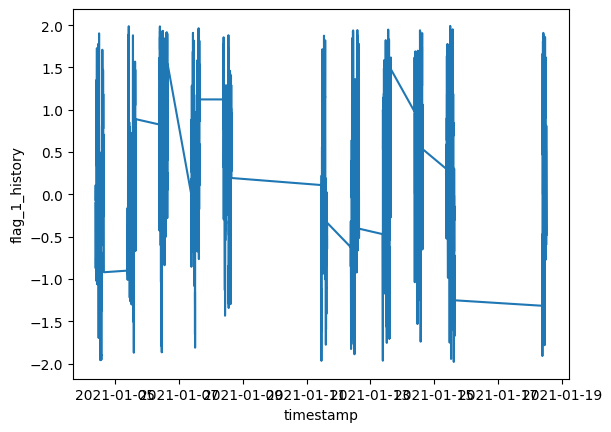

In [150]:
import seaborn as sns
sns.lineplot(pd.DataFrame(copula_backtester.flag_1_history), x='timestamp', y='flag_1_history')

<Axes: xlabel='index', ylabel='flag_2_history'>

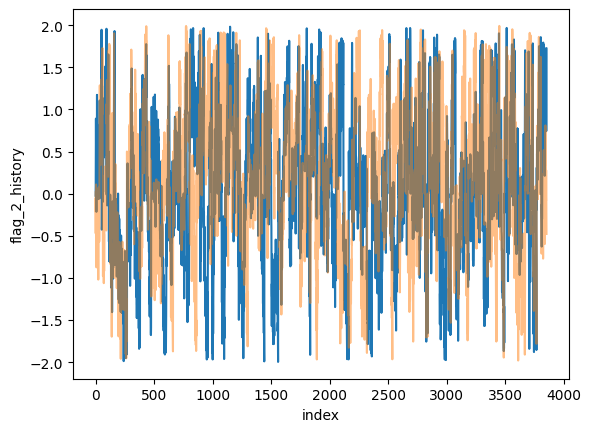

In [154]:
import seaborn as sns
flag1_df = pd.DataFrame(copula_backtester.flag_1_history)
flag2_df = pd.DataFrame(copula_backtester.flag_2_history)
flag_df = pd.merge(flag1_df, flag2_df, on ='timestamp', how='outer')
flag_col = 'flag_2_history'
# flag_df[flag_col] = flag_df[flag_col].diff(1)
sns.lineplot(flag_df.reset_index(), x = 'index', y=flag_col)
sns.lineplot(flag_df.reset_index(), x = 'index', y='flag_1_history', alpha=0.5)

In [111]:
flag1_basis_df = pd.DataFrame(copula_backtester.flag_1_basis_history)
flag2_basis_df = pd.DataFrame(copula_backtester.flag_2_basis_history)
flag_basis_df = pd.merge(flag1_basis_df, flag2_basis_df, on ='timestamp', how='outer')
flag_basis_df#.merge(flag_df, on = 'timestamp')

,timestamp,flag_1_basis_history,flag_2_basis_history
0,2024-01-01 09:15:00,None,None
1,2024-01-01 09:16:00,X,None
2,2024-01-01 09:16:00,X,None
3,2024-01-01 09:16:00,X,None
4,2024-01-01 09:16:00,X,None
5,2024-01-01 09:17:00,X,None
6,2024-01-01 09:18:00,X,None
7,2024-01-01 09:19:00,X,None
8,2024-01-01 09:20:00,X,None
9,2024-01-01 09:21:00,X,None


In [119]:
flag_basis_df.drop_duplicates().merge(flag_df.drop_duplicates(), on = 'timestamp')

,timestamp,flag_1_basis_history,flag_2_basis_history,flag_1_history,flag_2_history
0,2024-01-01 09:15:00,None,None,0.499993,0.500000
1,2024-01-01 09:16:00,X,None,0.745429,0.534645
2,2024-01-01 09:17:00,X,None,0.273488,1.034643
3,2024-01-01 09:18:00,X,None,0.550418,0.726287
4,2024-01-01 09:19:00,X,None,1.050418,1.226284
5,2024-01-01 09:20:00,X,None,0.703386,1.726283
6,2024-01-01 09:21:00,X,None,1.113398,1.472780
7,2024-01-01 09:22:00,X,None,0.758429,1.520014
8,2024-01-01 09:23:00,X,None,0.518757,1.258007
9,2024-01-01 09:24:00,X,None,0.850574,1.194646


In [120]:
copula_backtester.available_capital

np.float64(3008.1160000003874)

In [113]:
flag2_basis_df

,timestamp,flag_2_basis_history
0,2024-01-01 09:15:00,None
1,2024-01-01 09:16:00,None
2,2024-01-01 09:16:00,None
3,2024-01-01 09:17:00,None
4,2024-01-01 09:18:00,None
5,2024-01-01 09:19:00,None
6,2024-01-01 09:20:00,None
7,2024-01-01 09:21:00,None
8,2024-01-01 09:22:00,None
9,2024-01-01 09:23:00,None


In [100]:
pd.set_option('display.max_rows', None)
flag_df#.loc[flag_df[flag_col].abs()>2]

,timestamp,flag_1_history
0,2024-01-01 09:15:00,0.499993
1,2024-01-01 09:16:00,0.745429
2,2024-01-01 09:16:00,0.745429
3,2024-01-01 09:17:00,0.273488
4,2024-01-01 09:18:00,0.550418
5,2024-01-01 09:19:00,1.050418
6,2024-01-01 09:20:00,0.703386
7,2024-01-01 09:21:00,1.113398
8,2024-01-01 09:22:00,0.758429
9,2024-01-01 09:23:00,0.518757


In [88]:
pd.DataFrame(copula_backtester.pnl_history)['pnl'].sum()

np.float64(1806.8999999944645)